# Demo - COTS Dataset

In [7]:
import cv2
import os
import json
import numpy as np
import matplotlib.pyplot as plt

## Cloning the COTS Dataset

In [8]:
# # Packages Install
# !pip install gitpython
# import git
# import shutil
# import os

# # Cloning repository
# repo_url = 'https://github.com/dylanseychell/COTSDataset.git'
# repo_dir = 'COTSDataset'  # Directory to clone the repository into

# # Checking if the repository directory already exists
# if not os.path.exists(repo_dir):
#     # Cloning repository
#     git.Repo.clone_from(repo_url, repo_dir)
#     print("Repository cloned successfully.")
# else:
#     print("Repository already cloned.")

# # Defining paths
# part1_single_objects = os.path.join(repo_dir, "Part 1 - Single Objects")
# part2_multiple_objects = os.path.join(repo_dir, "Part 2 - Multiple Objects")
# part3_complex_background = os.path.join(repo_dir, "Part 3 - Complex Background")

# print("Repository cloned successfully.")

## Importing the mask-to-annotation libraries

In [9]:
import cv2
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import coco
import yolo
import vgg

In [10]:
# Defining paths
repo_dir = project_name = 'COTSDataset' 
part1_single_objects = os.path.join(repo_dir, "Part 1 - Single Objects")
part2_multiple_objects = os.path.join(repo_dir, "Part 2 - Multiple Objects")
part3_complex_background = os.path.join(repo_dir, "Part 3 - Complex Background")


 Annotating image:  ac_3_colour_mask_6_mask.png


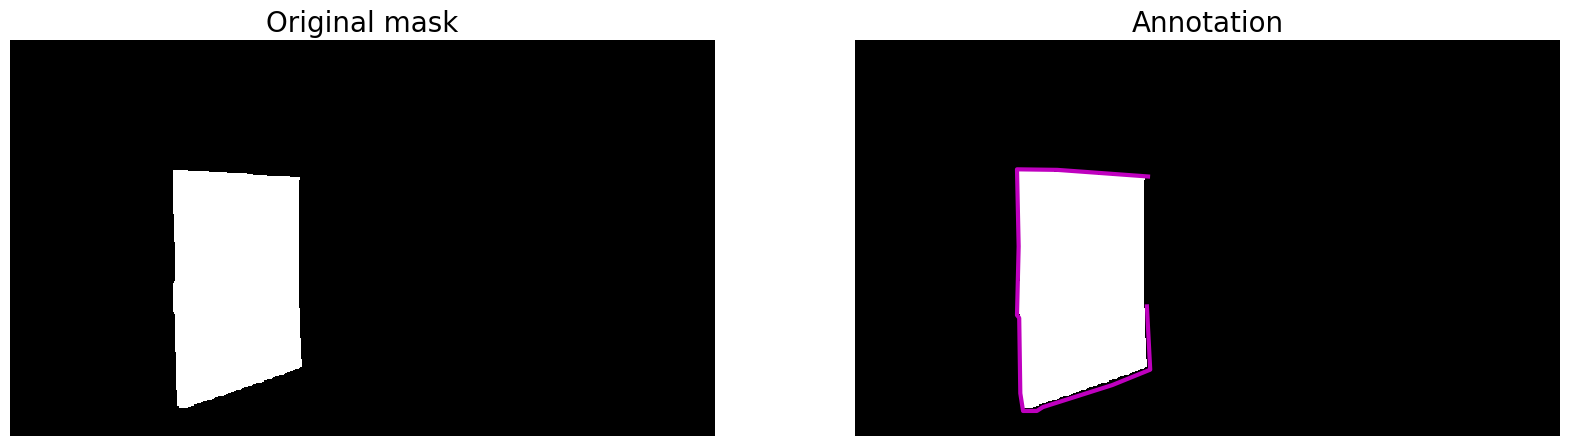

 Succesfully saved image:  ac_3_colour_mask_6_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  ac_3_colour_mask_7_mask.png


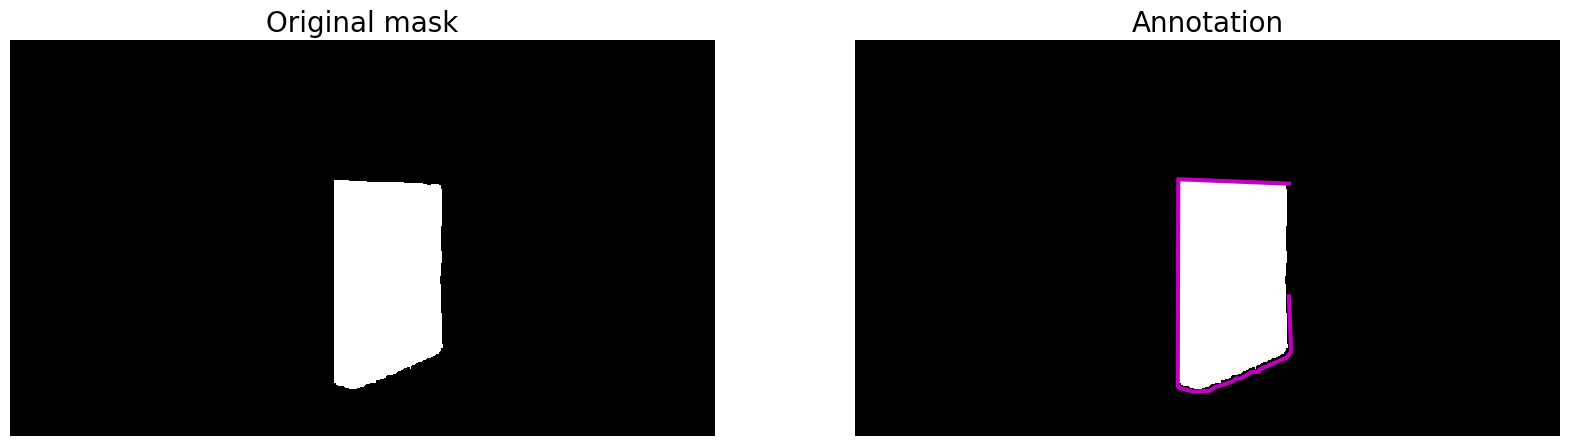

 Succesfully saved image:  ac_3_colour_mask_7_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  ac_3_colour_mask_8_mask.png


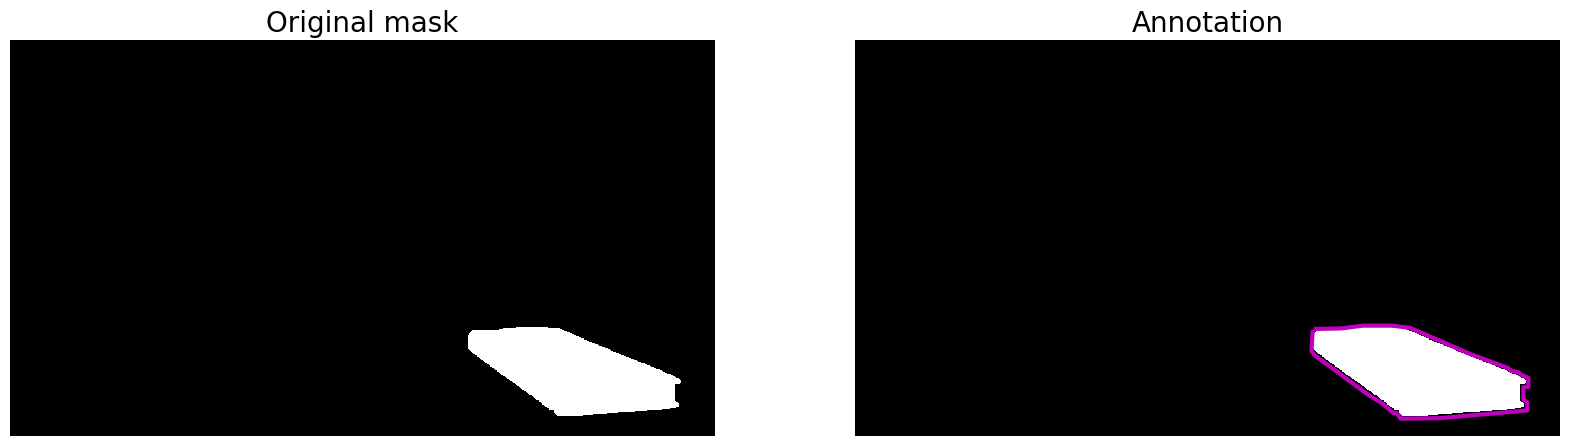

 Succesfully saved image:  ac_3_colour_mask_8_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  ac_oc_3_colour_mask_4_mask.png


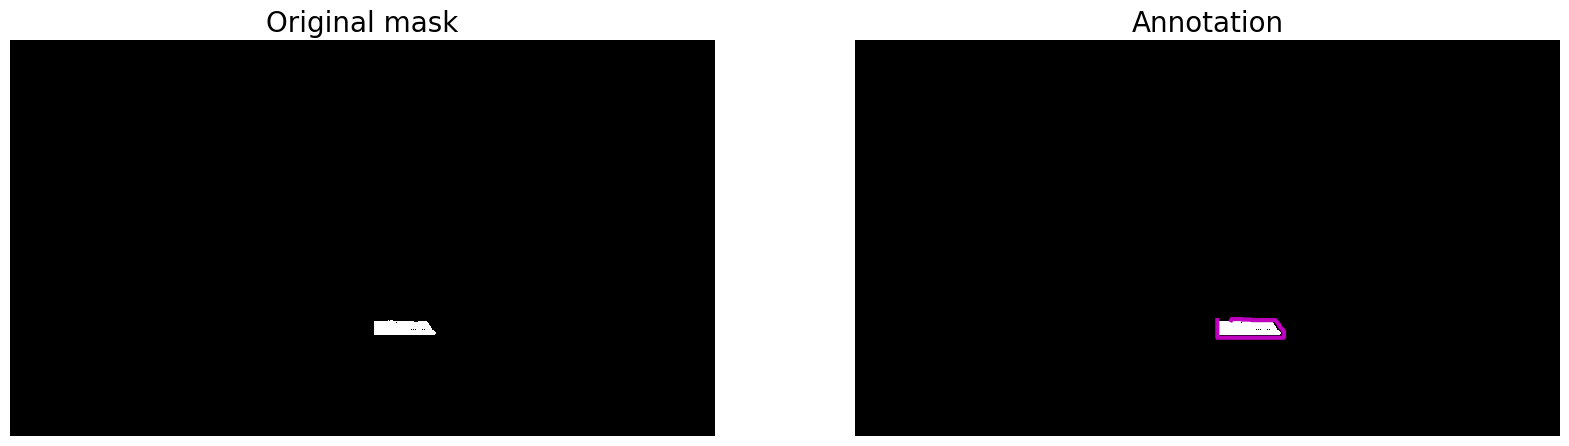

 Succesfully saved image:  ac_oc_3_colour_mask_4_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  ac_oc_3_colour_mask_5_mask.png


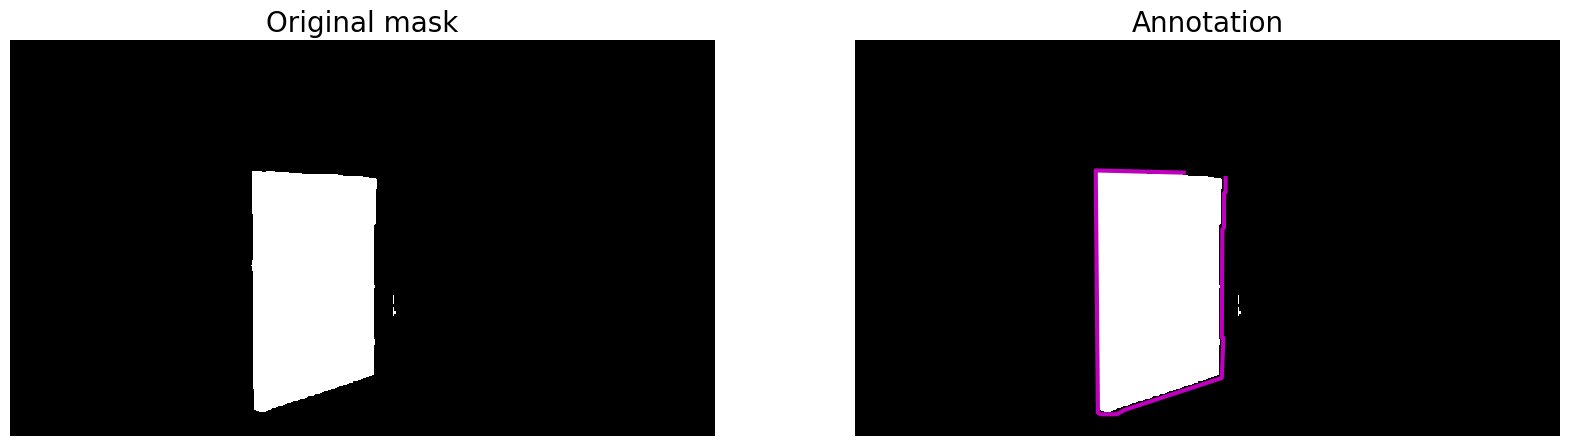

 Succesfully saved image:  ac_oc_3_colour_mask_5_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  ac_oc_3_colour_mask_7_mask.png


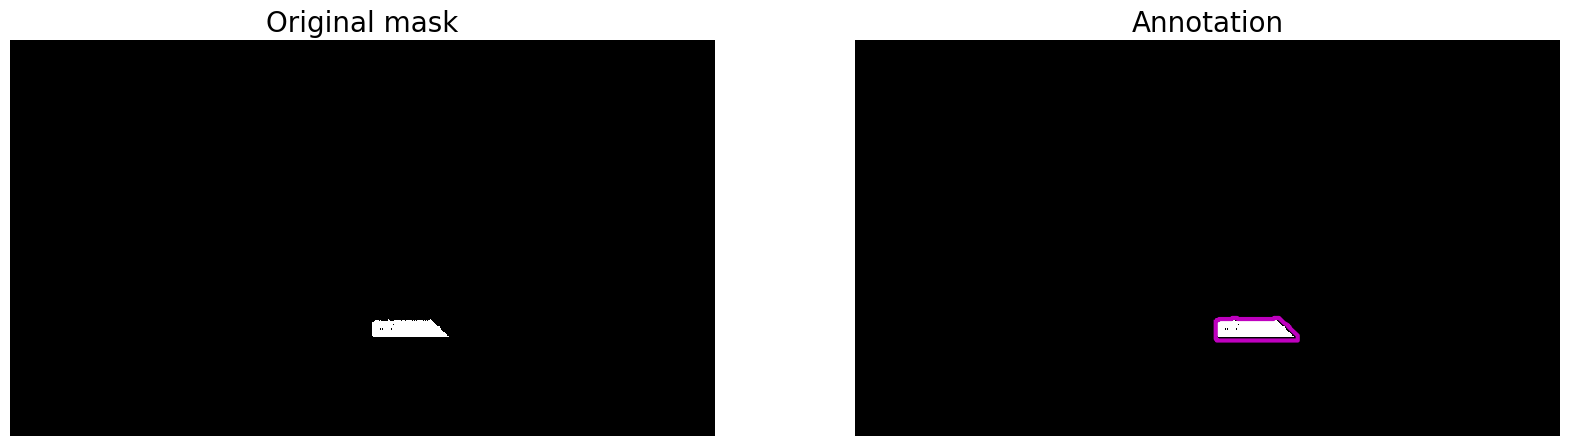

 Succesfully saved image:  ac_oc_3_colour_mask_7_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  ac_oc_3_colour_mask_8_mask.png


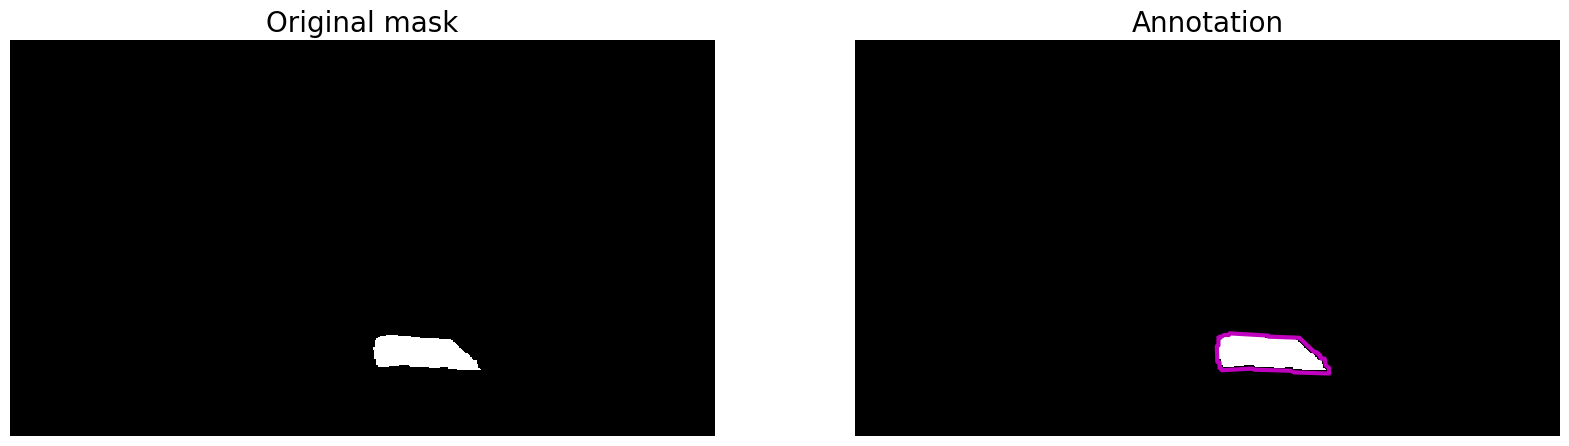

 Succesfully saved image:  ac_oc_3_colour_mask_8_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  food_3_colour_mask_1_mask.png


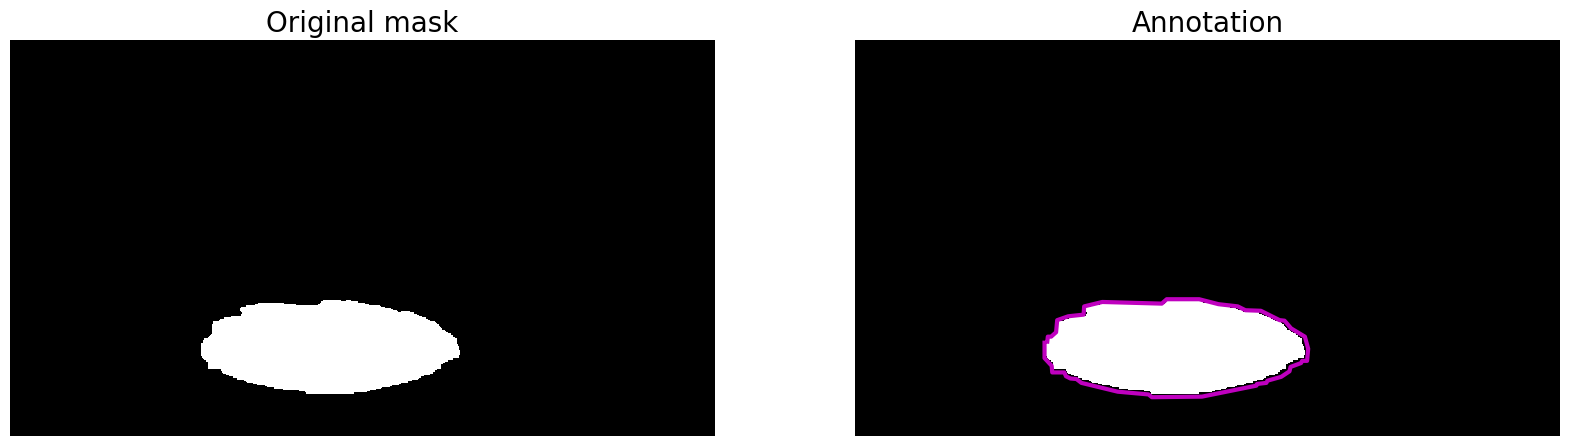

 Succesfully saved image:  food_3_colour_mask_1_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  food_3_colour_mask_2_mask.png


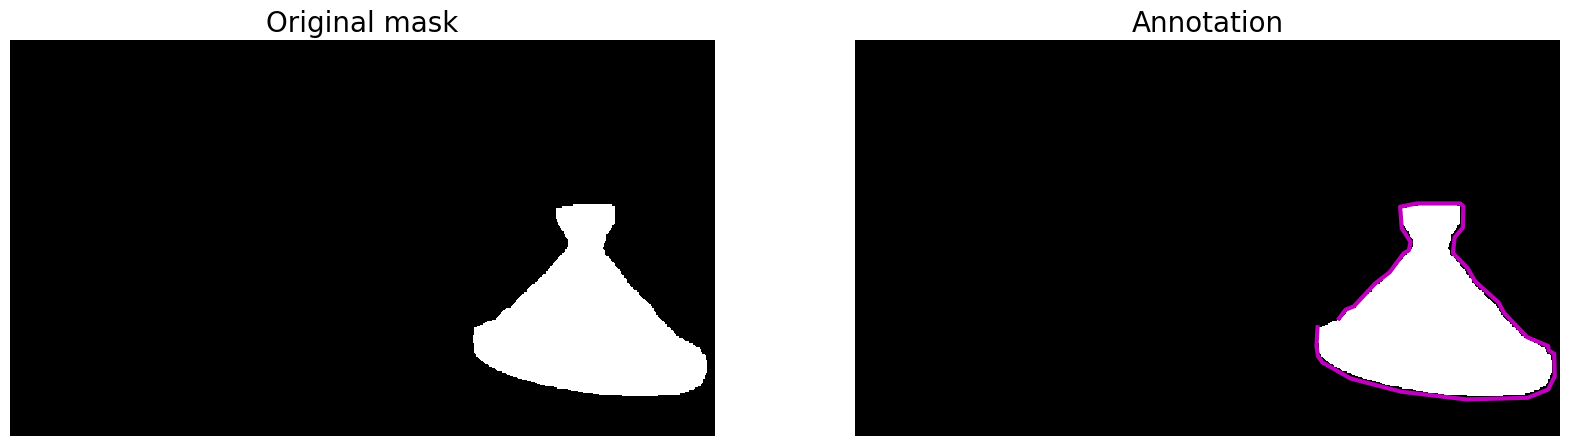

 Succesfully saved image:  food_3_colour_mask_2_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  food_3_colour_mask_5_mask.png


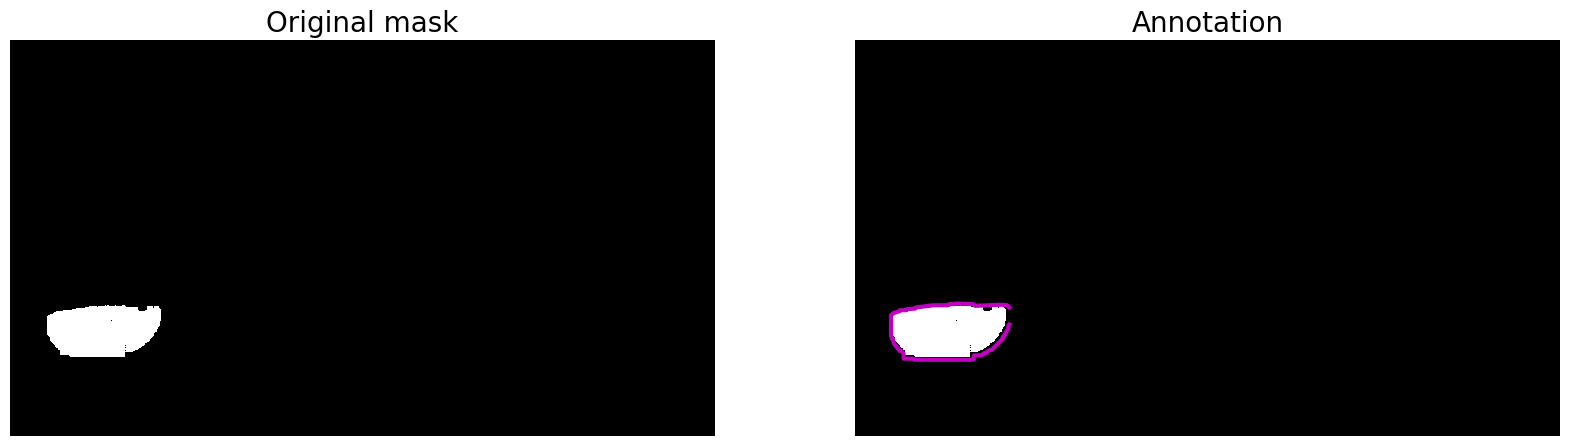

 Succesfully saved image:  food_3_colour_mask_5_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  food_oc_3_colour_mask_3_mask.png


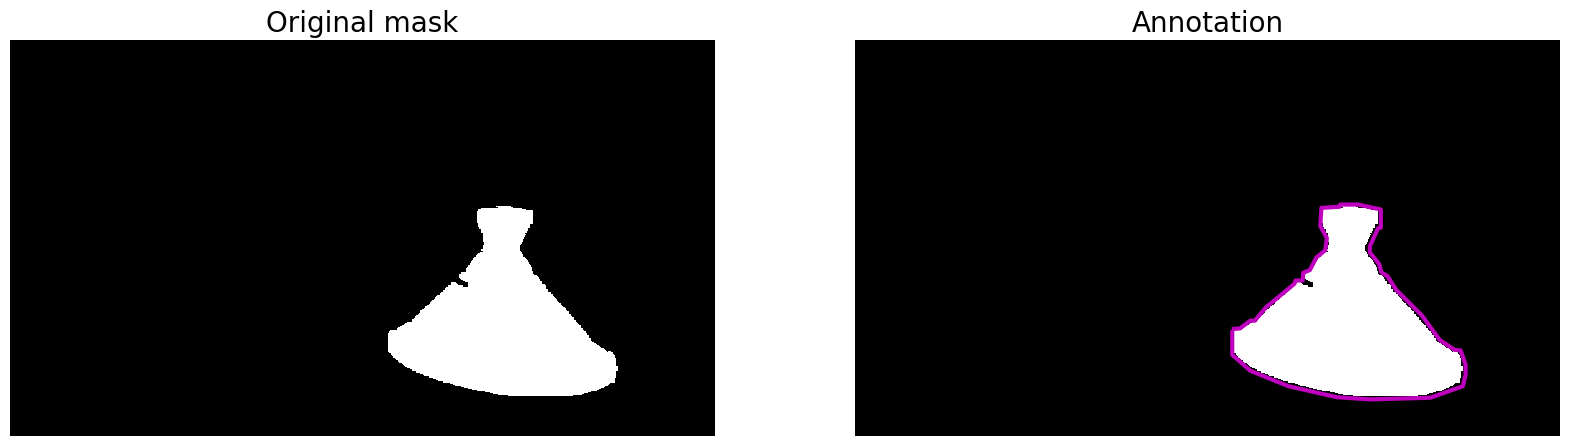

 Succesfully saved image:  food_oc_3_colour_mask_3_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  food_oc_3_colour_mask_4_mask.png


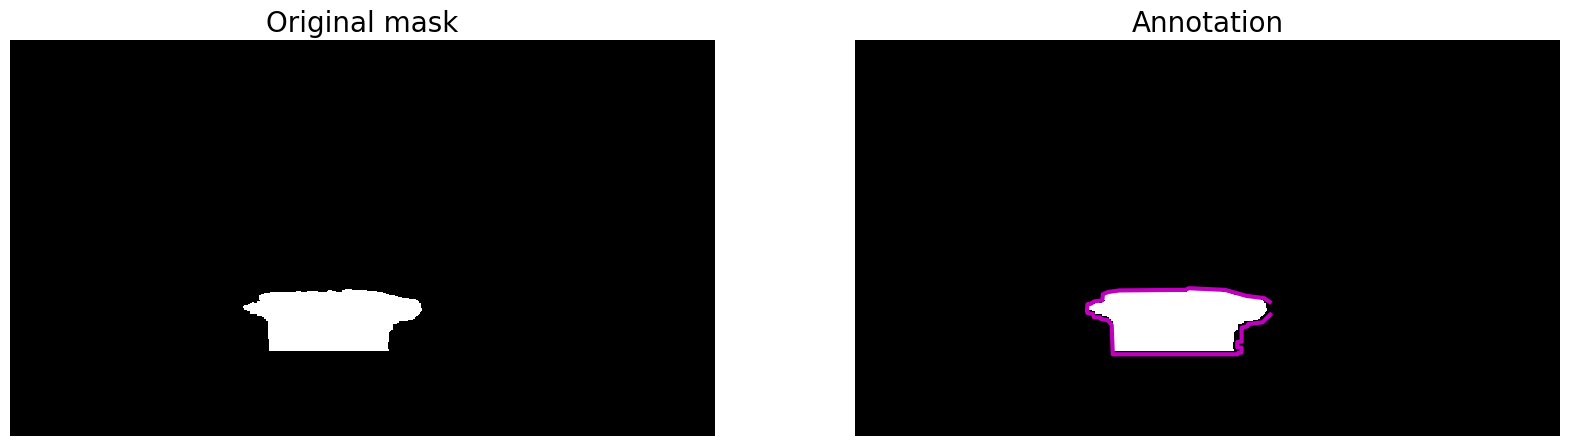

 Succesfully saved image:  food_oc_3_colour_mask_4_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  food_oc_3_colour_mask_5_mask.png


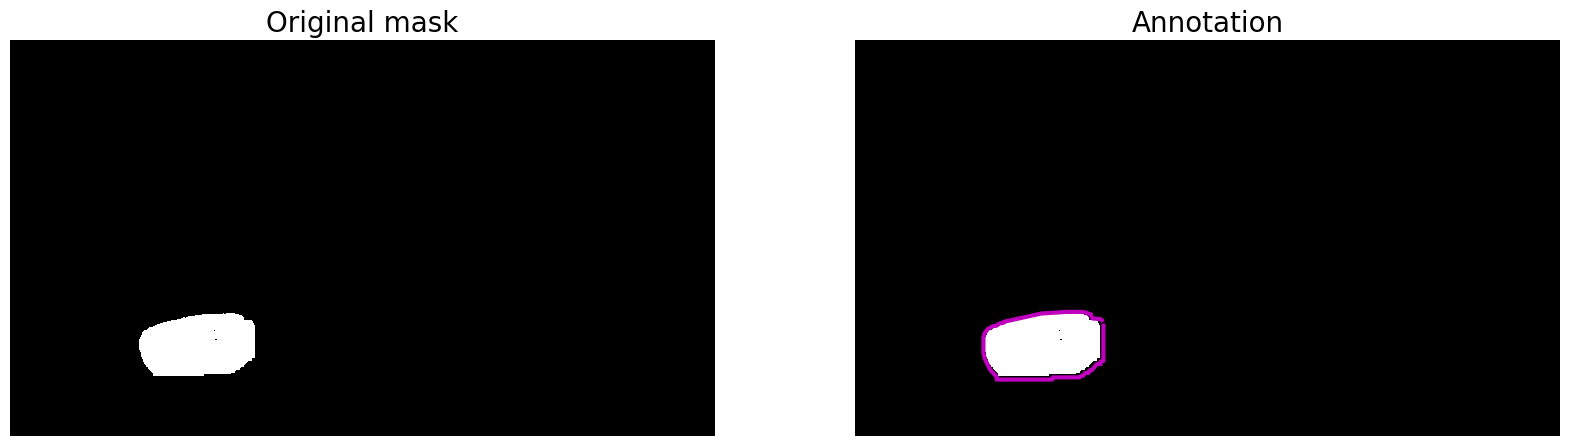

 Succesfully saved image:  food_oc_3_colour_mask_5_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  footware_no_3_colour_mask_1_mask.png


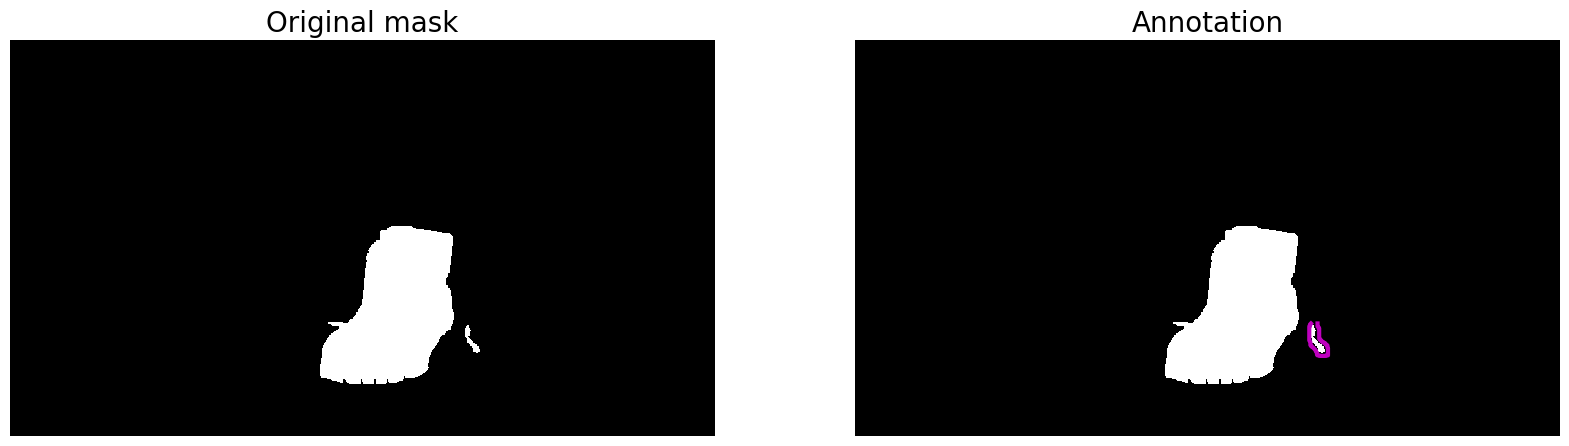

 Succesfully saved image:  footware_no_3_colour_mask_1_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  footware_no_3_colour_mask_2_mask.png


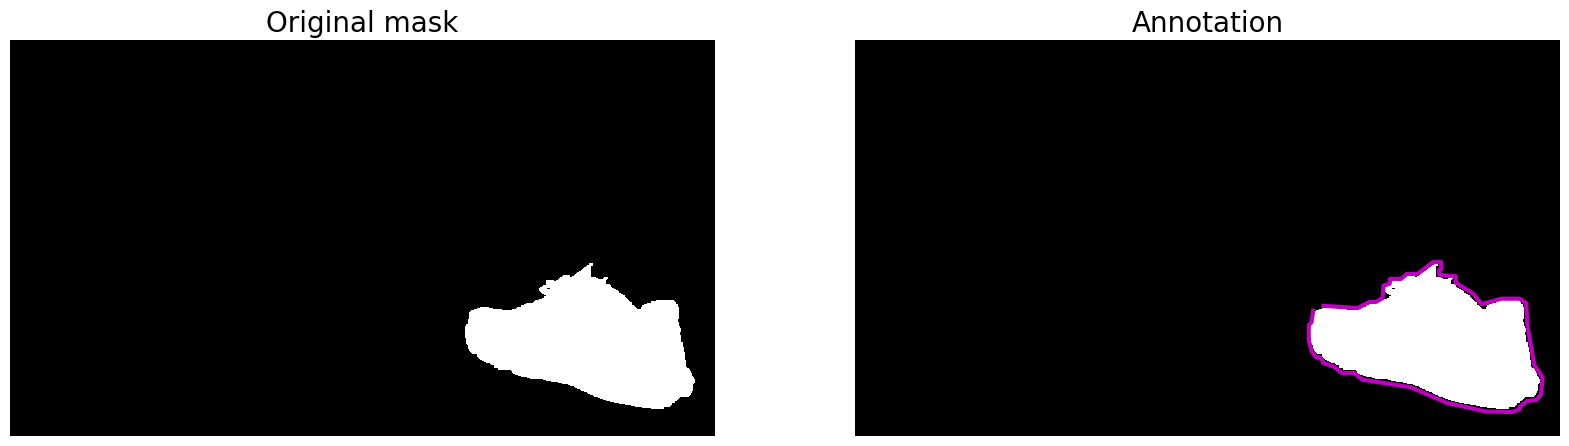

 Succesfully saved image:  footware_no_3_colour_mask_2_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  footware_no_3_colour_mask_3_mask.png


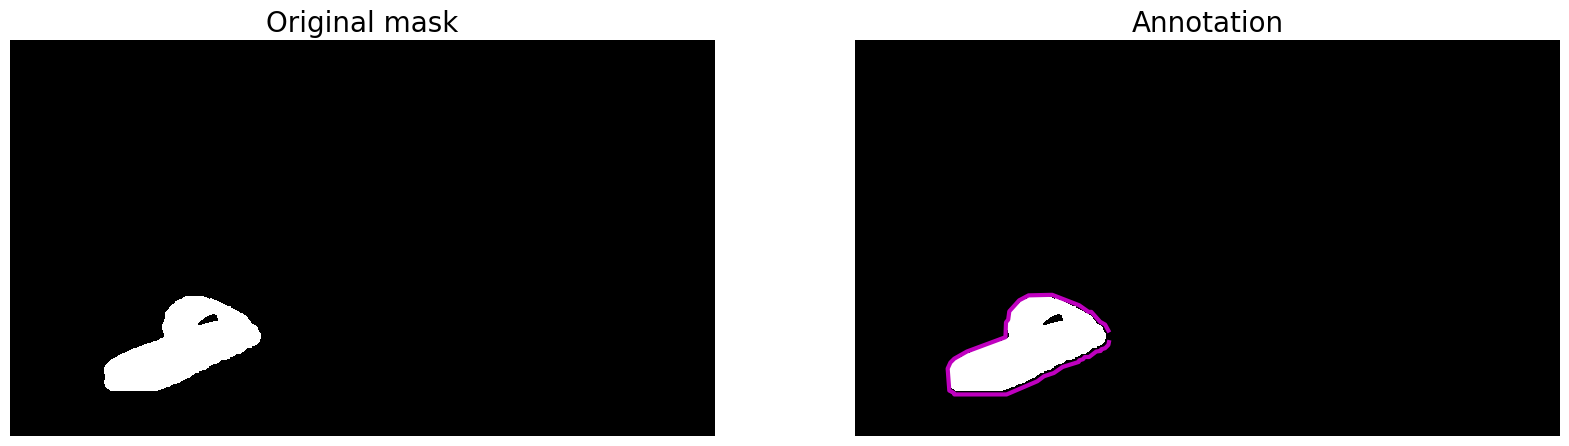

 Succesfully saved image:  footware_no_3_colour_mask_3_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  footwear_oc_3_colour_mask_0_mask.png


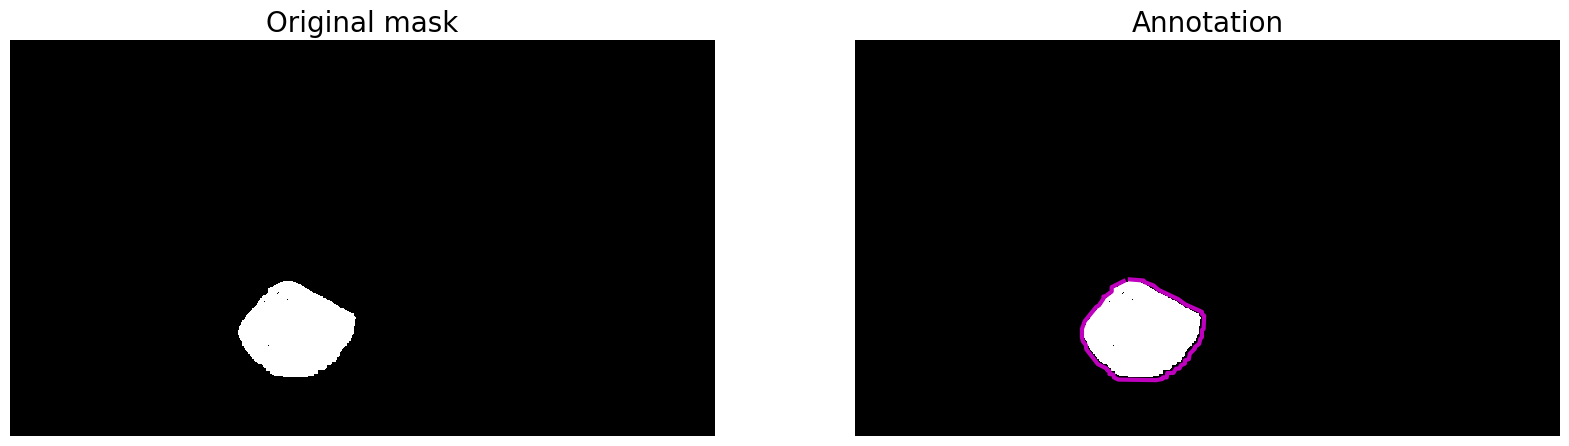

 Succesfully saved image:  footwear_oc_3_colour_mask_0_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  footwear_oc_3_colour_mask_4_mask.png


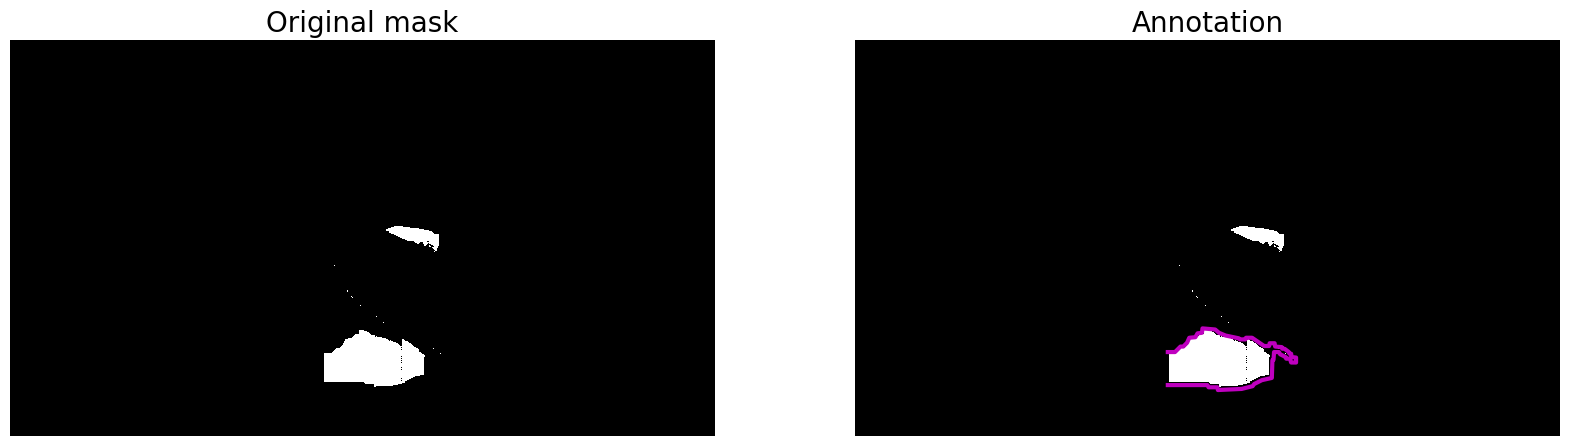

 Succesfully saved image:  footwear_oc_3_colour_mask_4_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  footwear_oc_3_colour_mask_5_mask.png


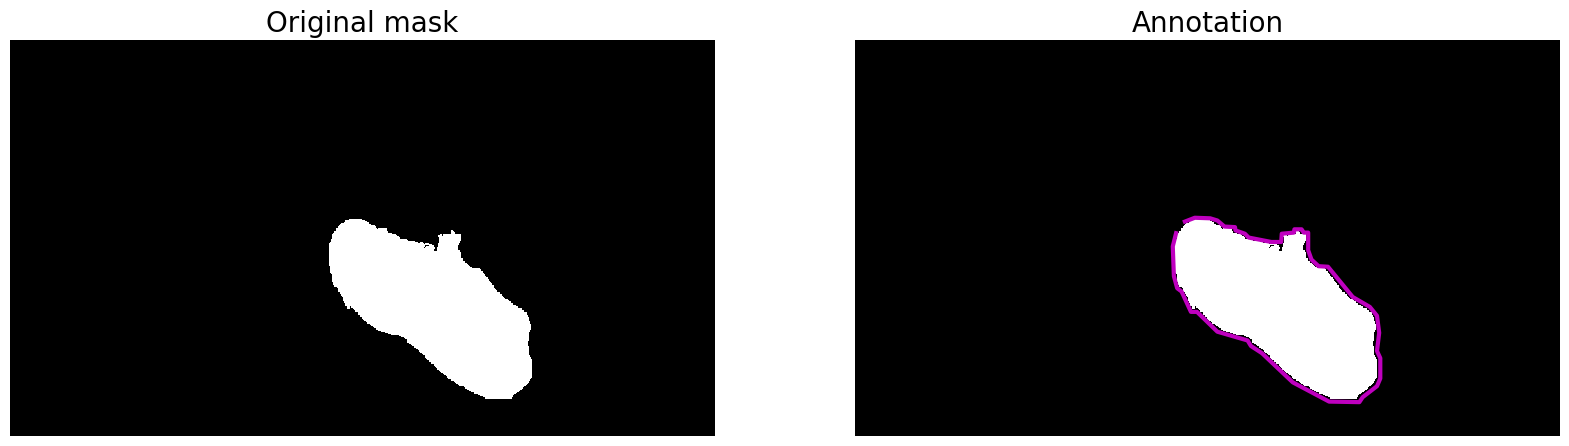

 Succesfully saved image:  footwear_oc_3_colour_mask_5_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  headgear_no_3_colour_mask_0_mask.png


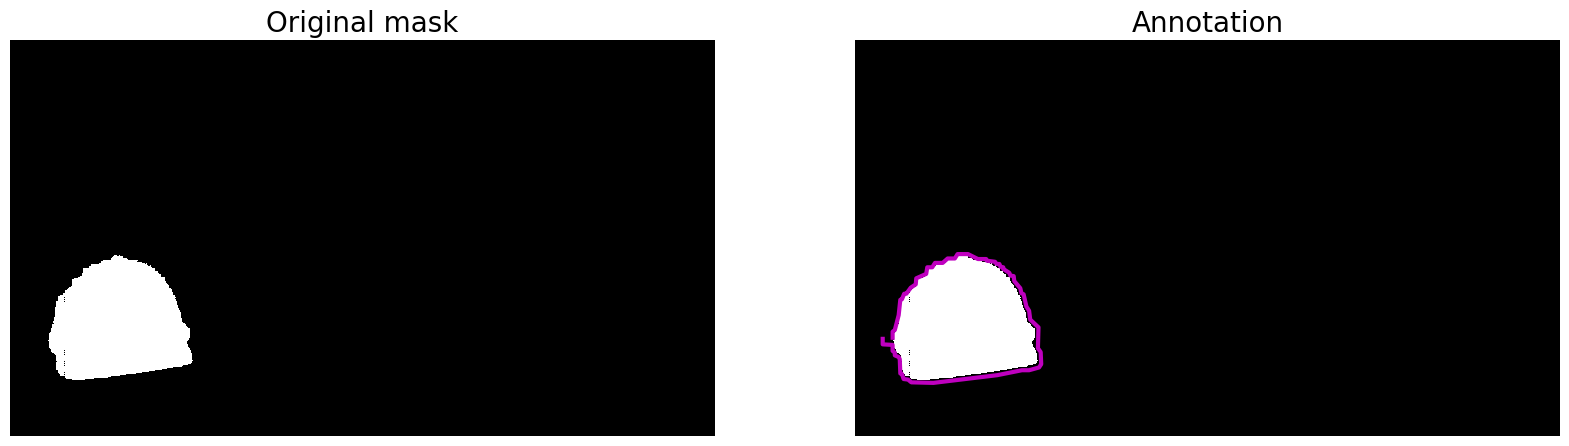

 Succesfully saved image:  headgear_no_3_colour_mask_0_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  headgear_no_3_colour_mask_1_mask.png


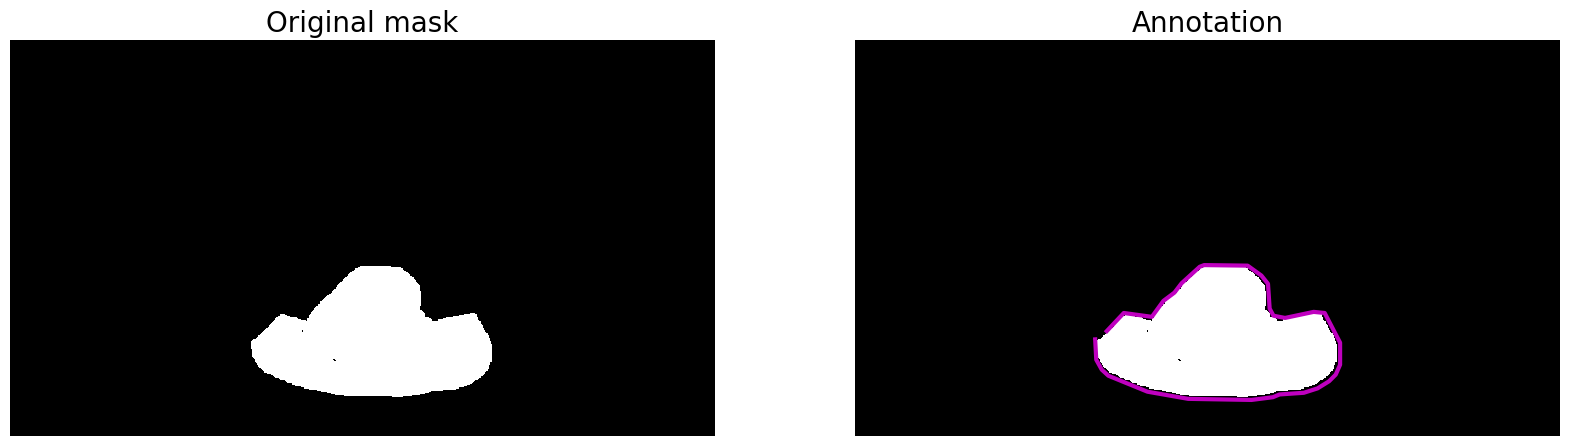

 Succesfully saved image:  headgear_no_3_colour_mask_1_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  headgear_no_3_colour_mask_3_mask.png


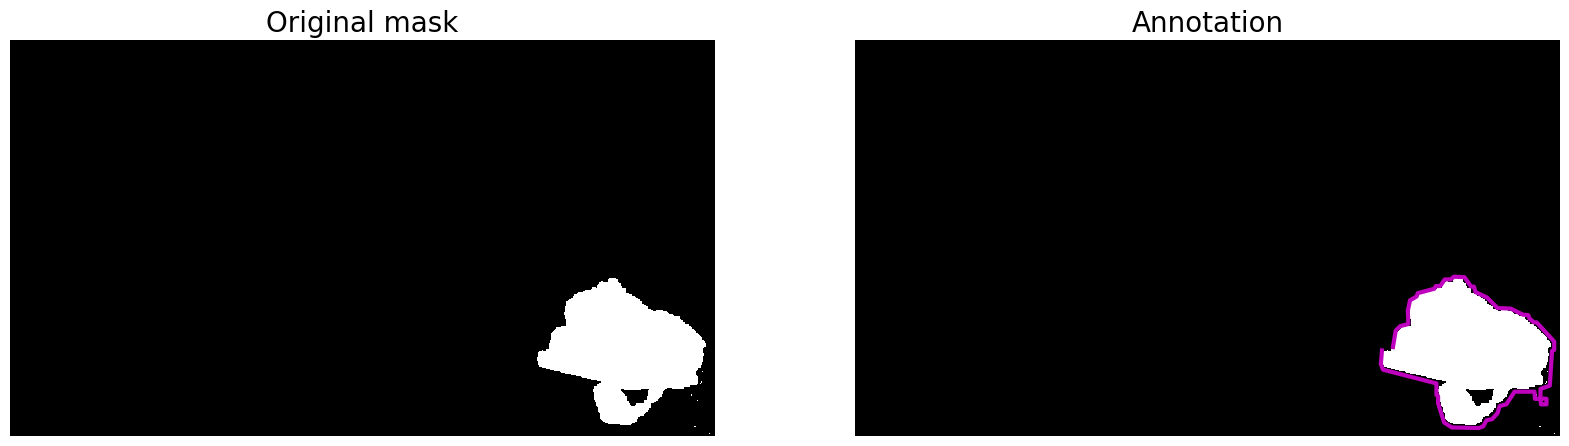

 Succesfully saved image:  headgear_no_3_colour_mask_3_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  headgear_oc_3_colour_mask_1_mask.png


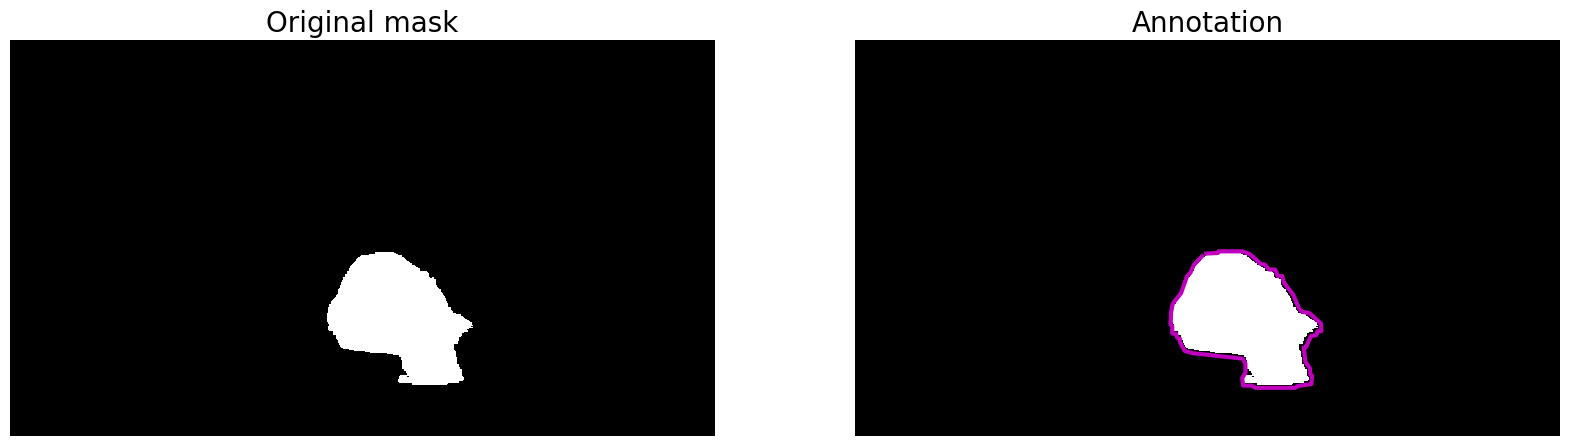

 Succesfully saved image:  headgear_oc_3_colour_mask_1_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  headgear_oc_3_colour_mask_2_mask.png


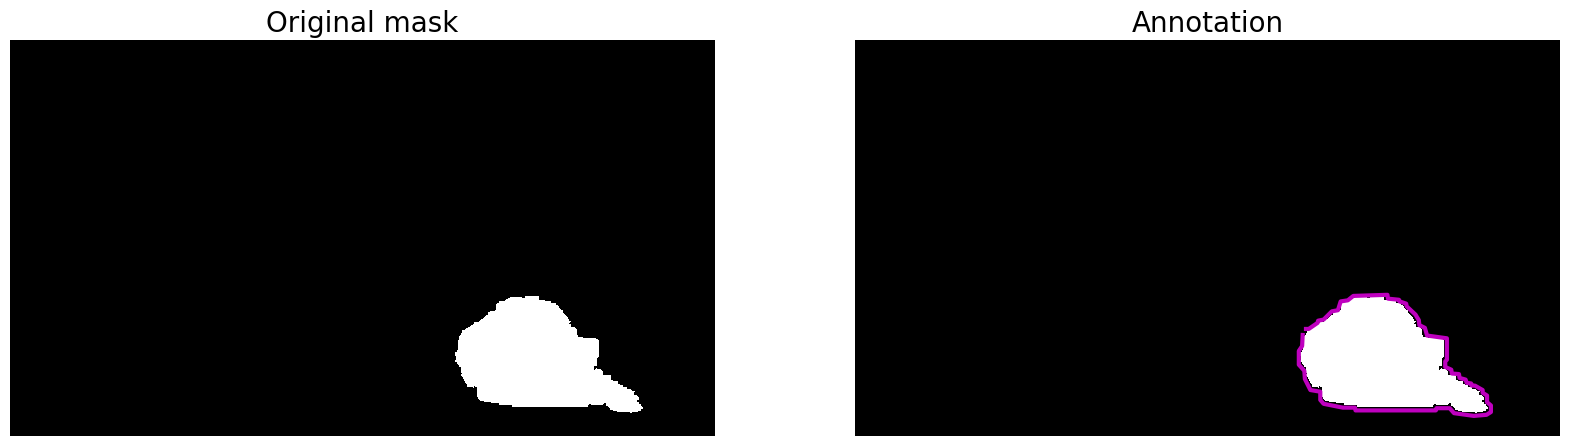

 Succesfully saved image:  headgear_oc_3_colour_mask_2_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  headgear_oc_3_colour_mask_3_mask.png


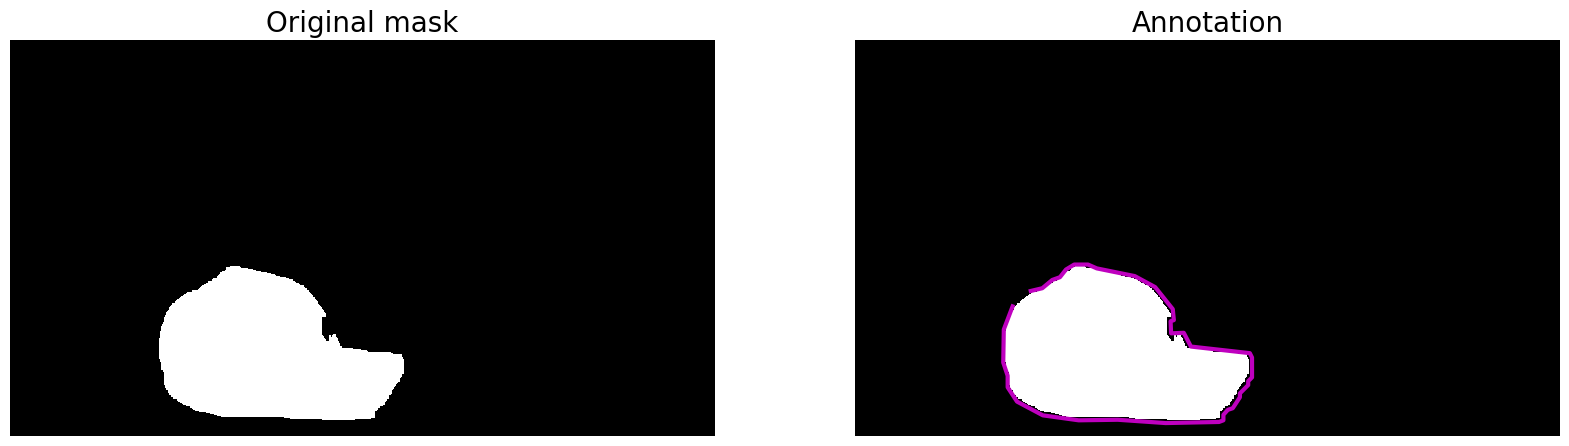

 Succesfully saved image:  headgear_oc_3_colour_mask_3_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  lpbooks_no_3_colour_mask_0_mask.png


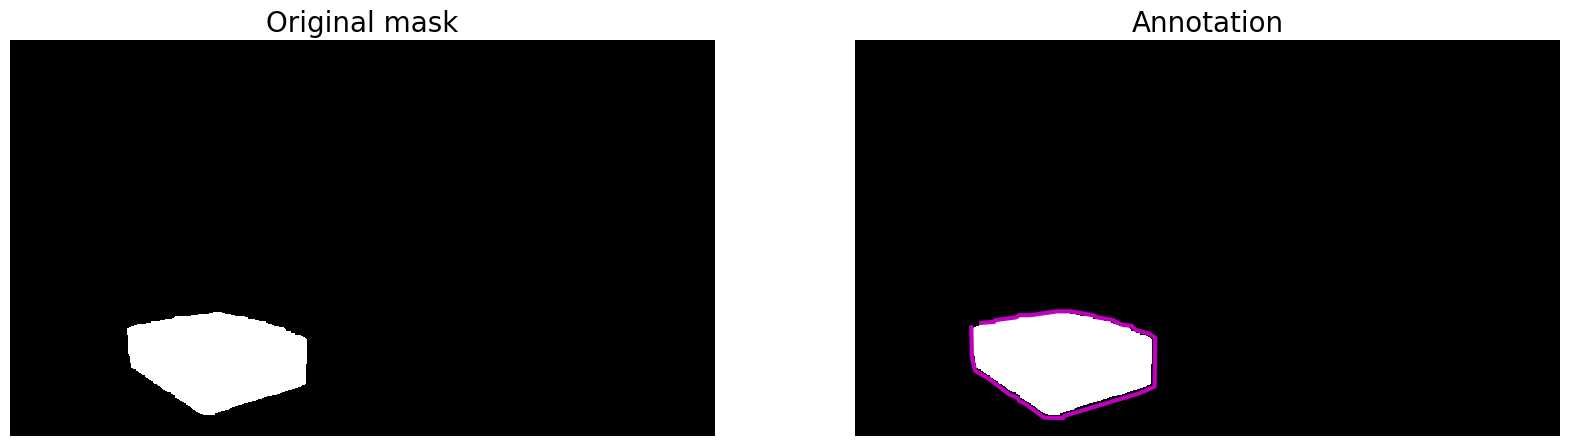

 Succesfully saved image:  lpbooks_no_3_colour_mask_0_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  lpbooks_no_3_colour_mask_1_mask.png


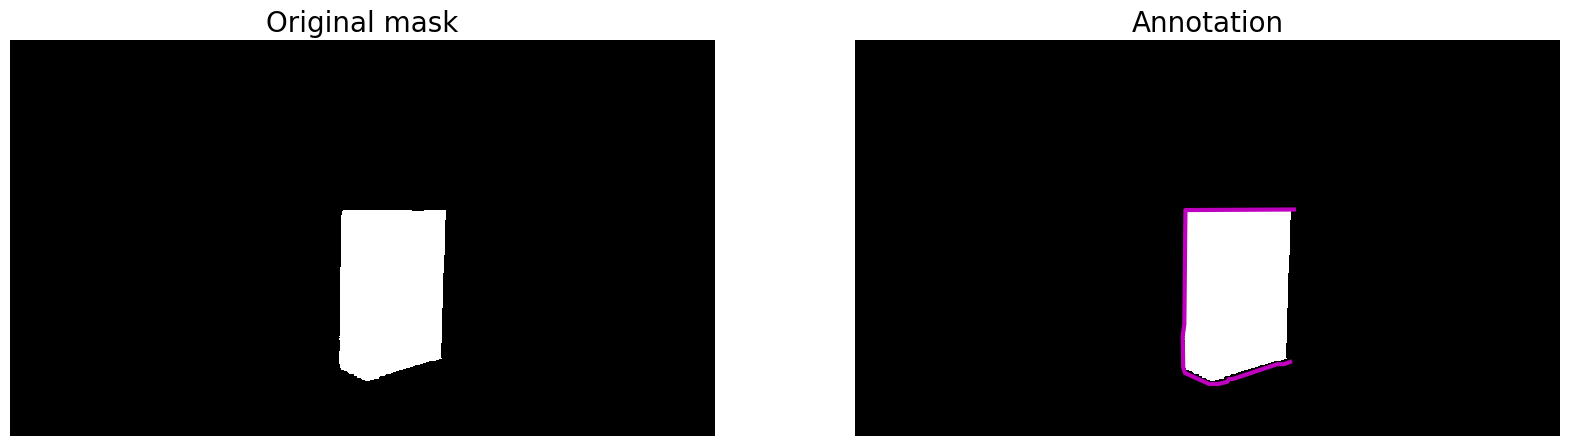

 Succesfully saved image:  lpbooks_no_3_colour_mask_1_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  lpbooks_no_3_colour_mask_2_mask.png


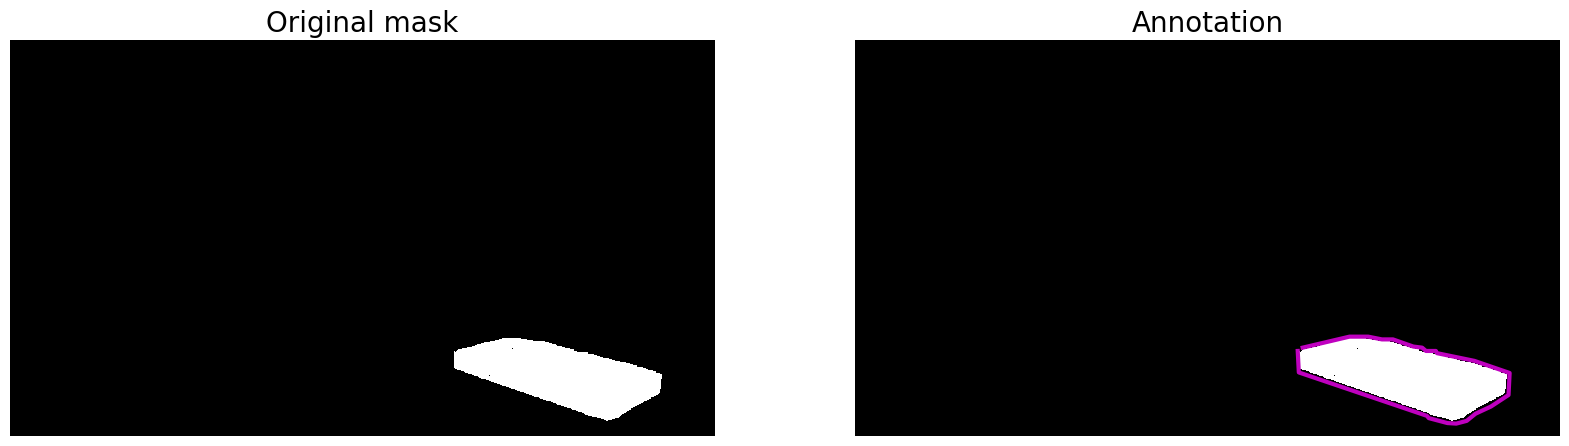

 Succesfully saved image:  lpbooks_no_3_colour_mask_2_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  lpbooks_oc_3_colour_mask_3_mask.png


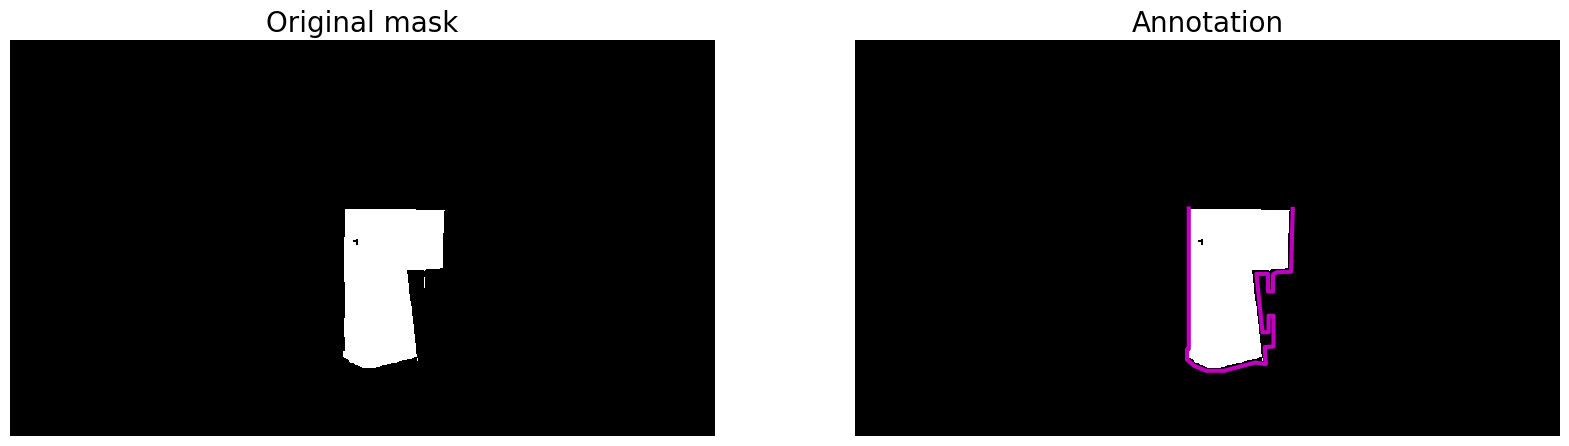

 Succesfully saved image:  lpbooks_oc_3_colour_mask_3_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  lpbooks_oc_3_colour_mask_4_mask.png


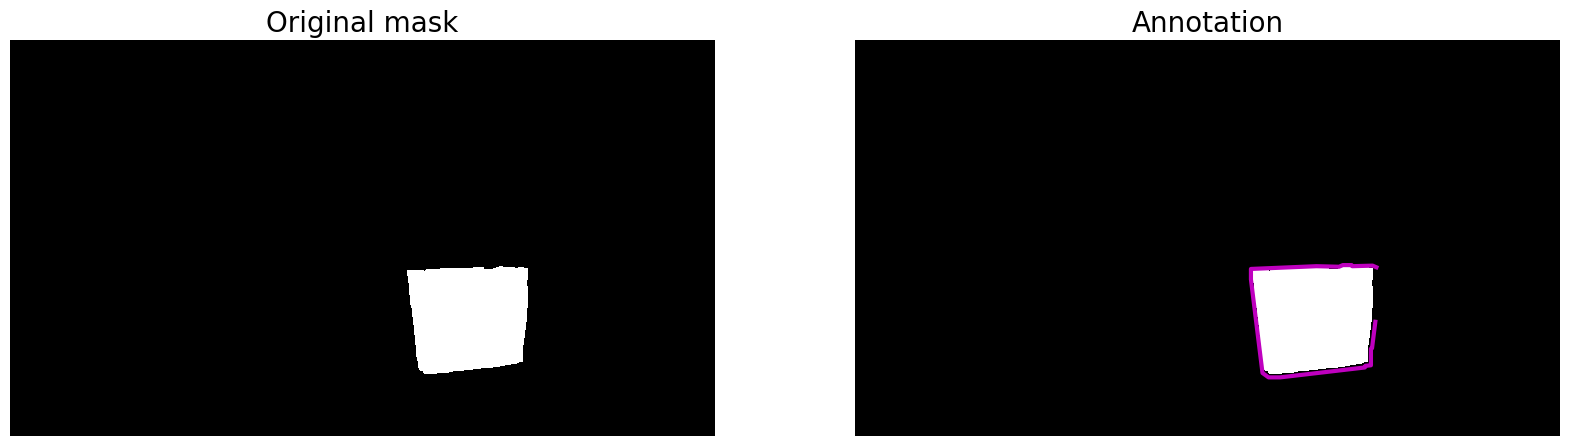

 Succesfully saved image:  lpbooks_oc_3_colour_mask_4_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  lpbooks_oc_3_colour_mask_5_mask.png


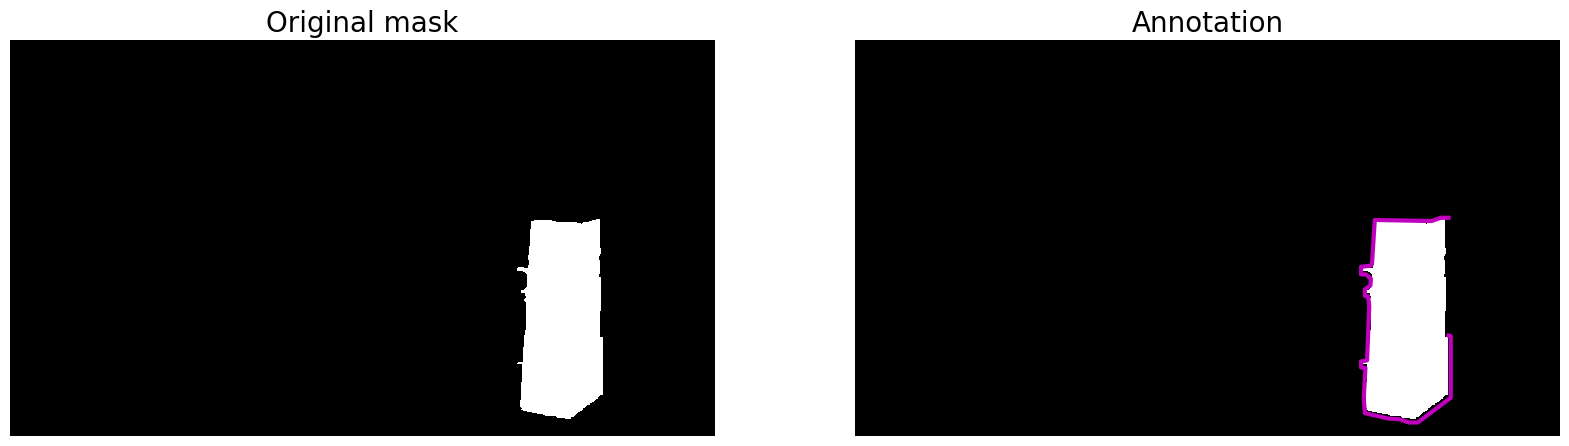

 Succesfully saved image:  lpbooks_oc_3_colour_mask_5_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  3_colour_mask_0_mask.png


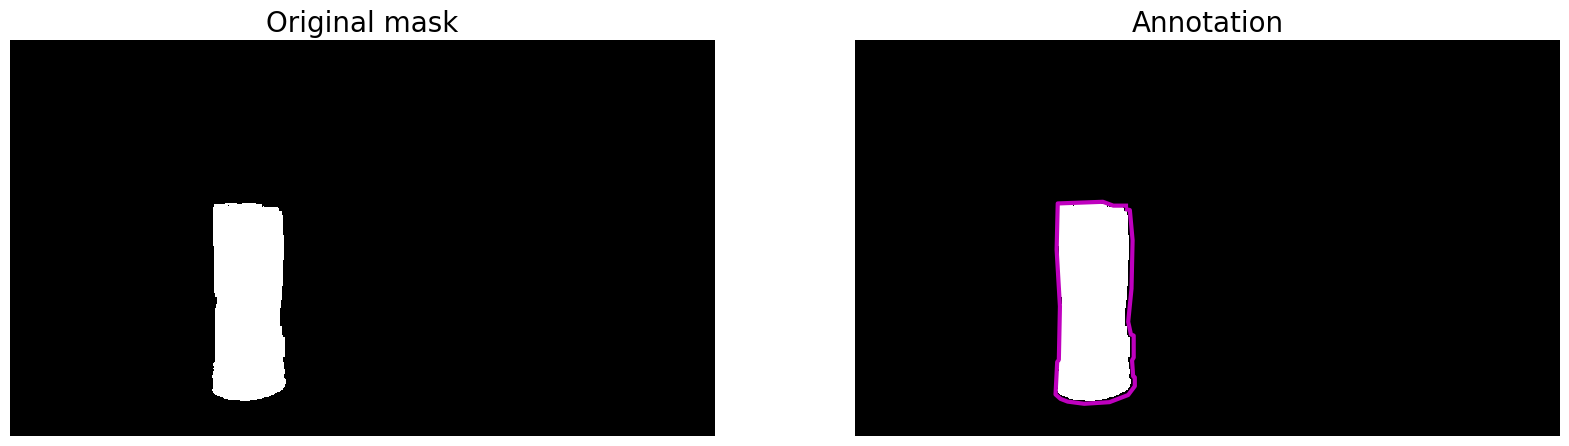

 Succesfully saved image:  3_colour_mask_0_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  3_colour_mask_1_mask_mask.png


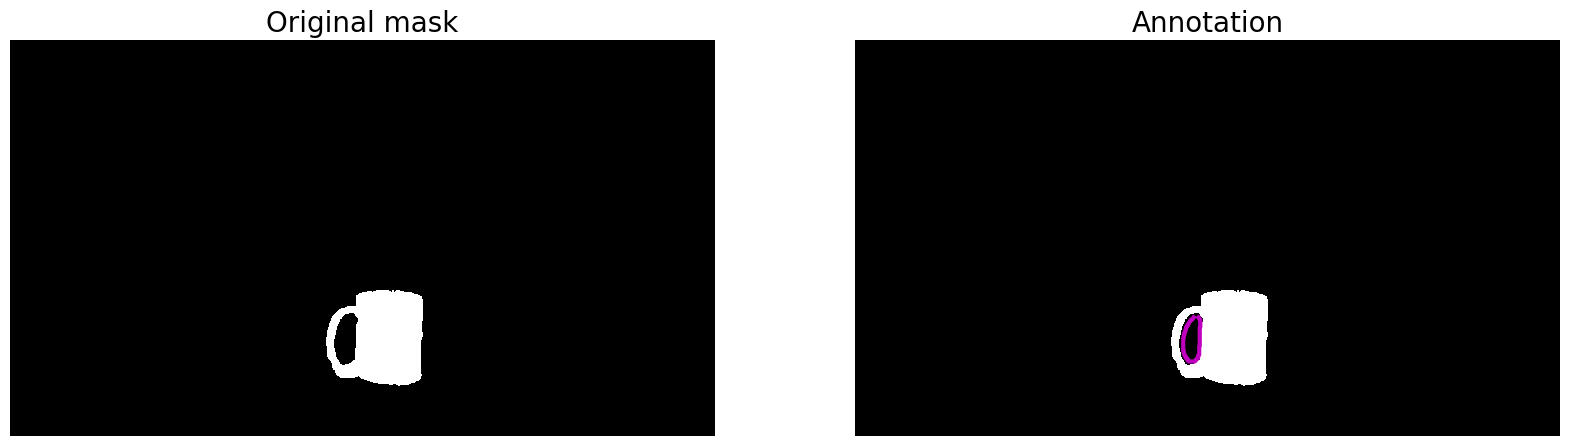

 Succesfully saved image:  3_colour_mask_1_mask_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  3_colour_mask_2_mask.png


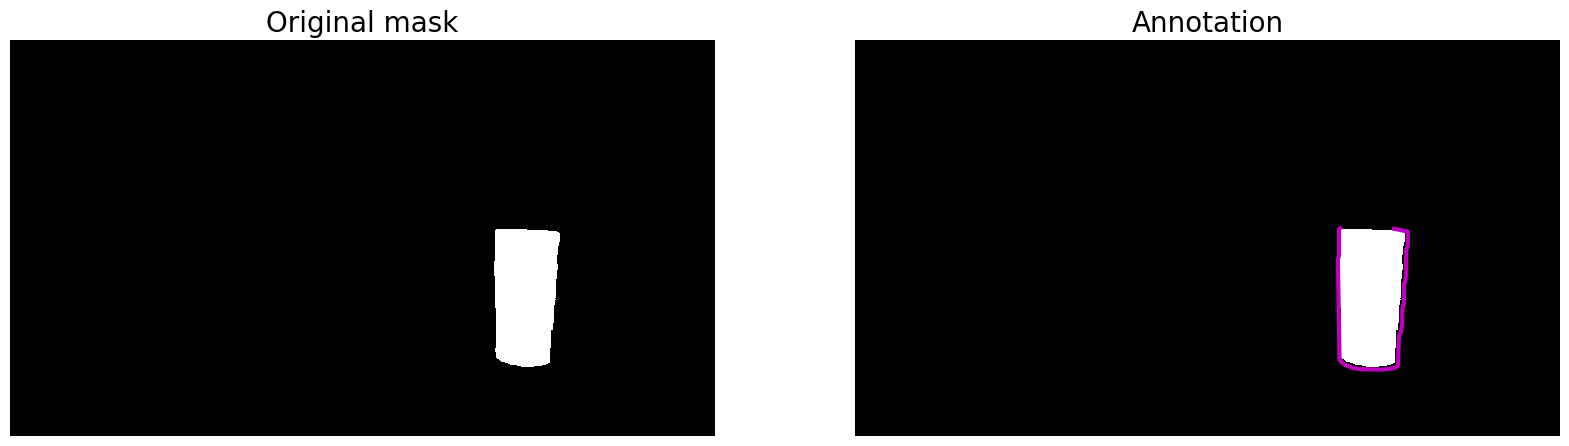

 Succesfully saved image:  3_colour_mask_2_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  mugs_oc_3_colour_mask_0_mask.png


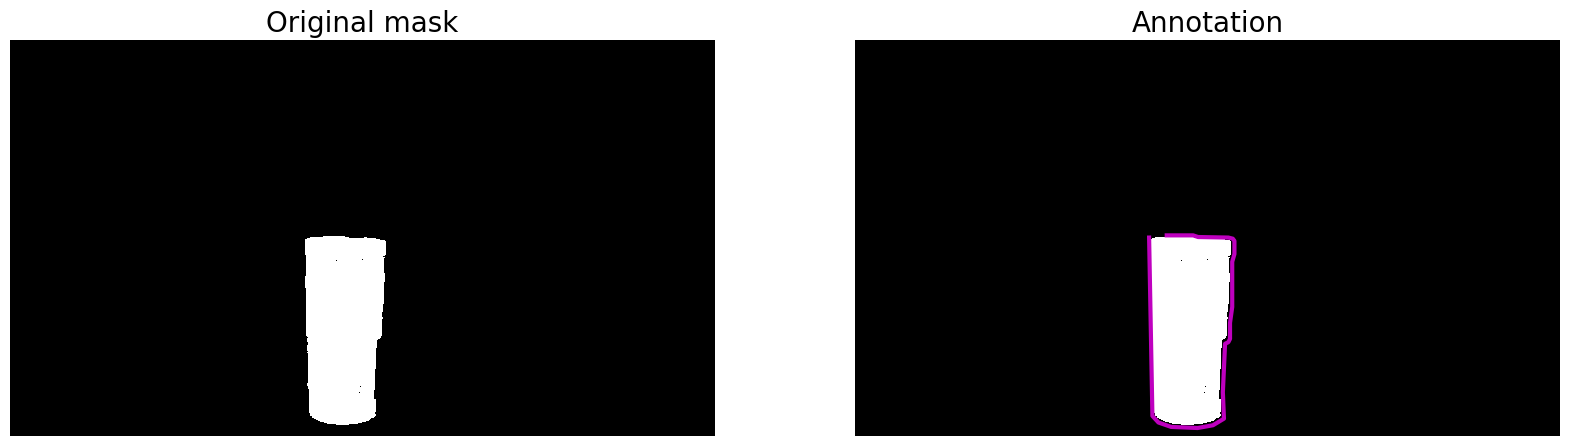

 Succesfully saved image:  mugs_oc_3_colour_mask_0_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  mugs_oc_3_colour_mask_1_mask.png


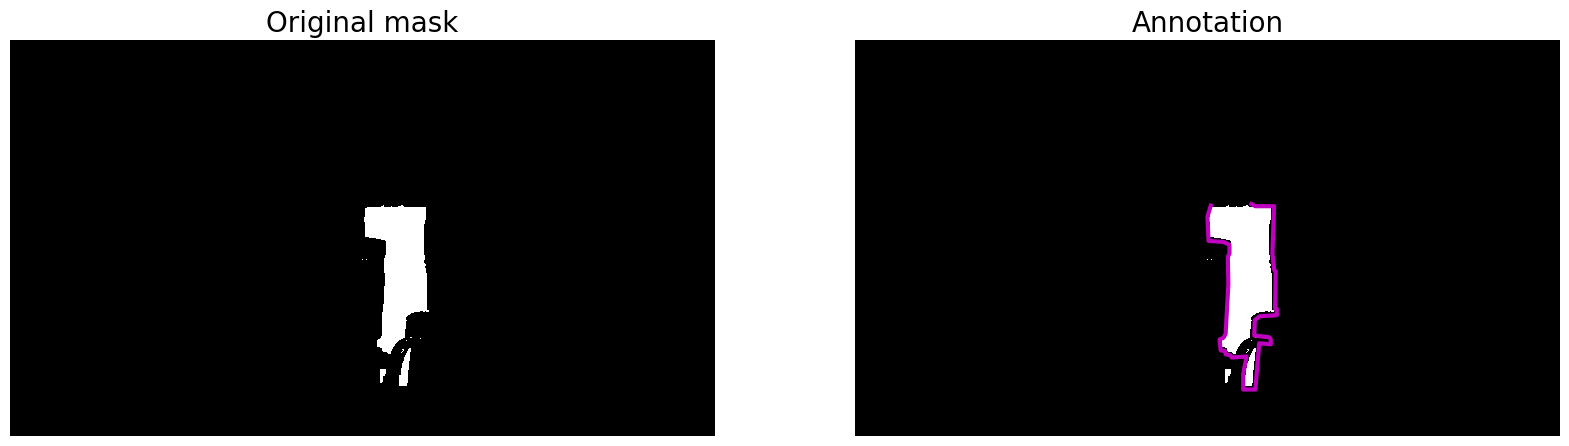

 Succesfully saved image:  mugs_oc_3_colour_mask_1_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  mugs_oc_3_colour_mask_2_mask.png


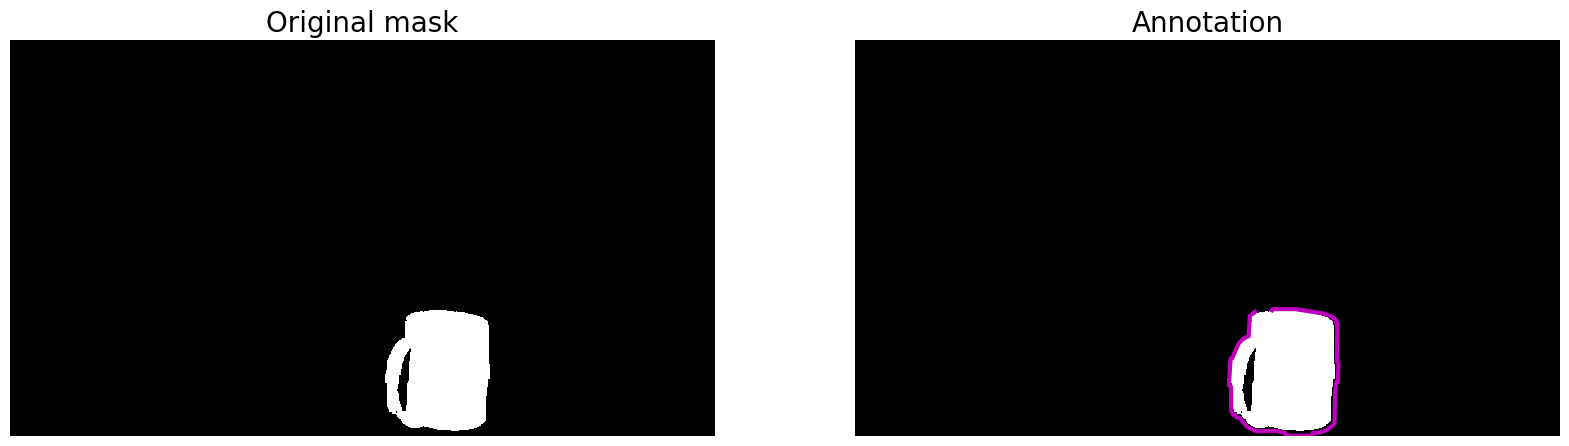

 Succesfully saved image:  mugs_oc_3_colour_mask_2_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  mugs_oc2_3_colour_mask_0_mask.png


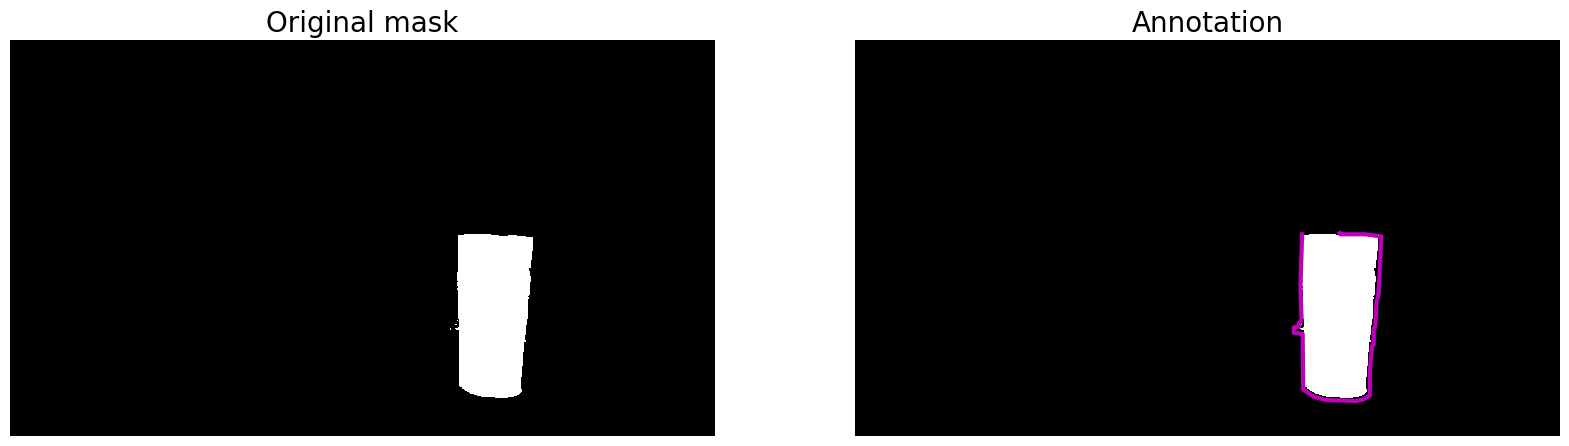

 Succesfully saved image:  mugs_oc2_3_colour_mask_0_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  mugs_oc2_3_colour_mask_1_mask.png


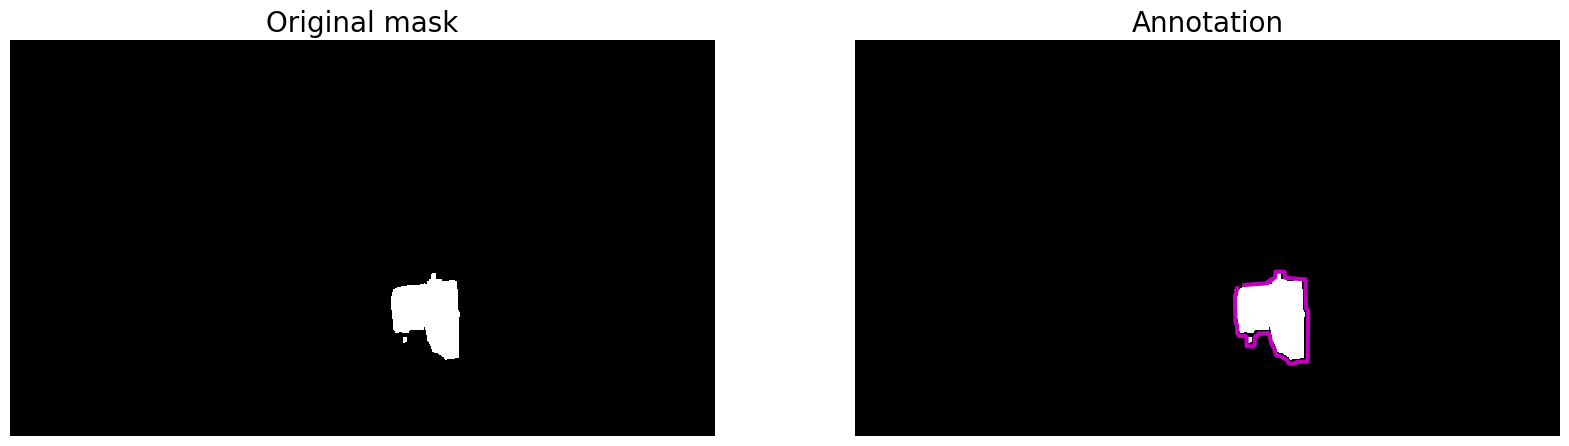

 Succesfully saved image:  mugs_oc2_3_colour_mask_1_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  mugs_oc2_3_colour_mask_2_mask.png


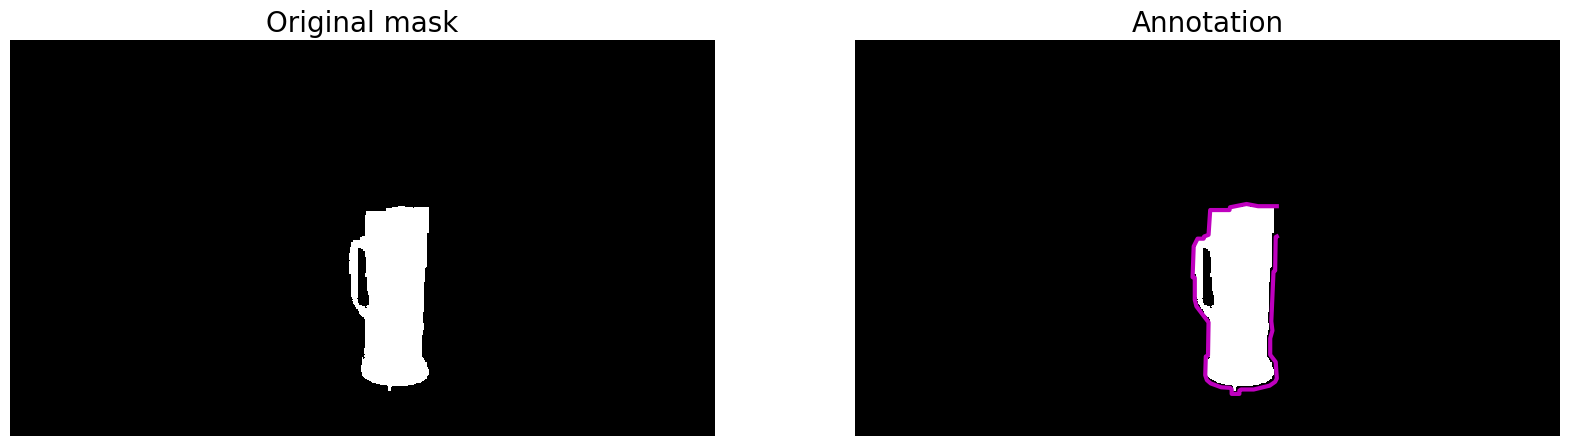

 Succesfully saved image:  mugs_oc2_3_colour_mask_2_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  reading_no_2_colour_mask_0_mask.png


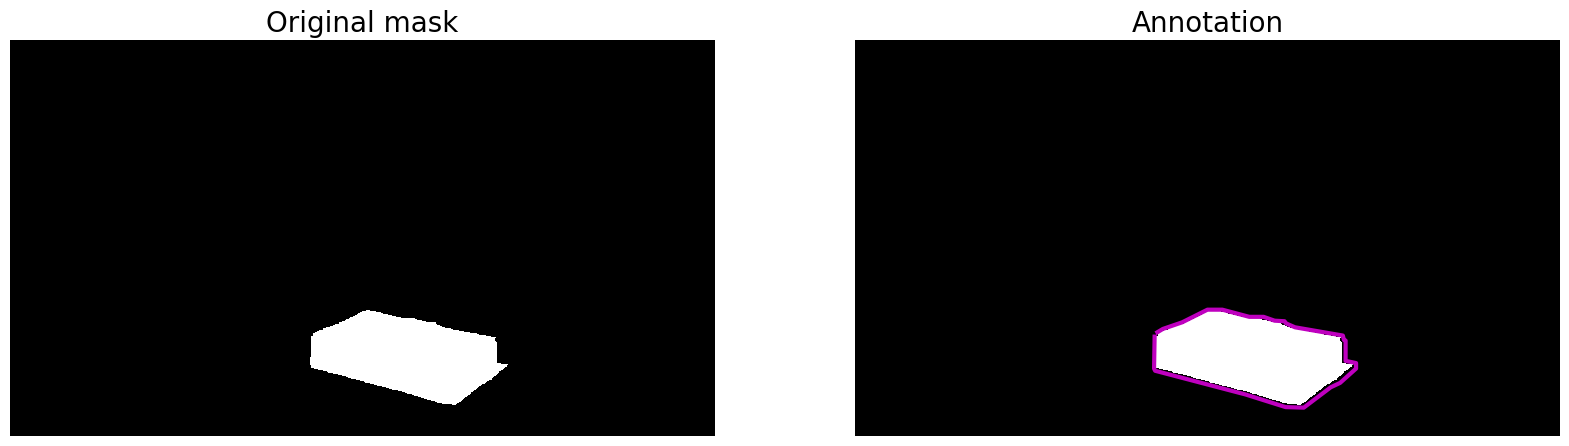

 Succesfully saved image:  reading_no_2_colour_mask_0_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  reading_no_2_colour_mask_1_mask.png


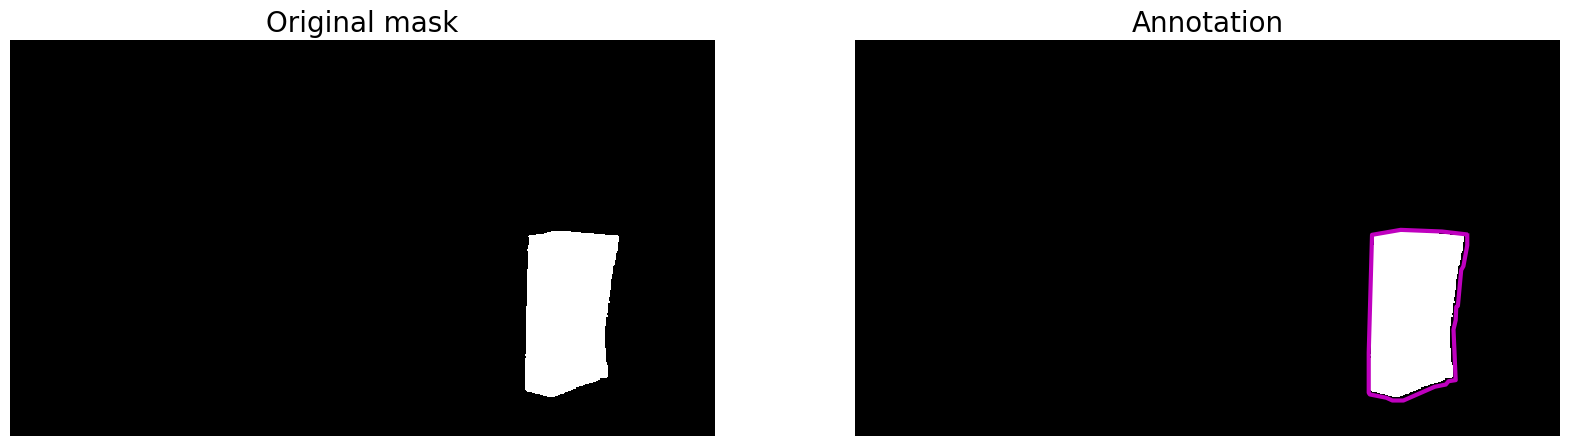

 Succesfully saved image:  reading_no_2_colour_mask_1_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  reading_oc_2_colour_mask_2_mask.png


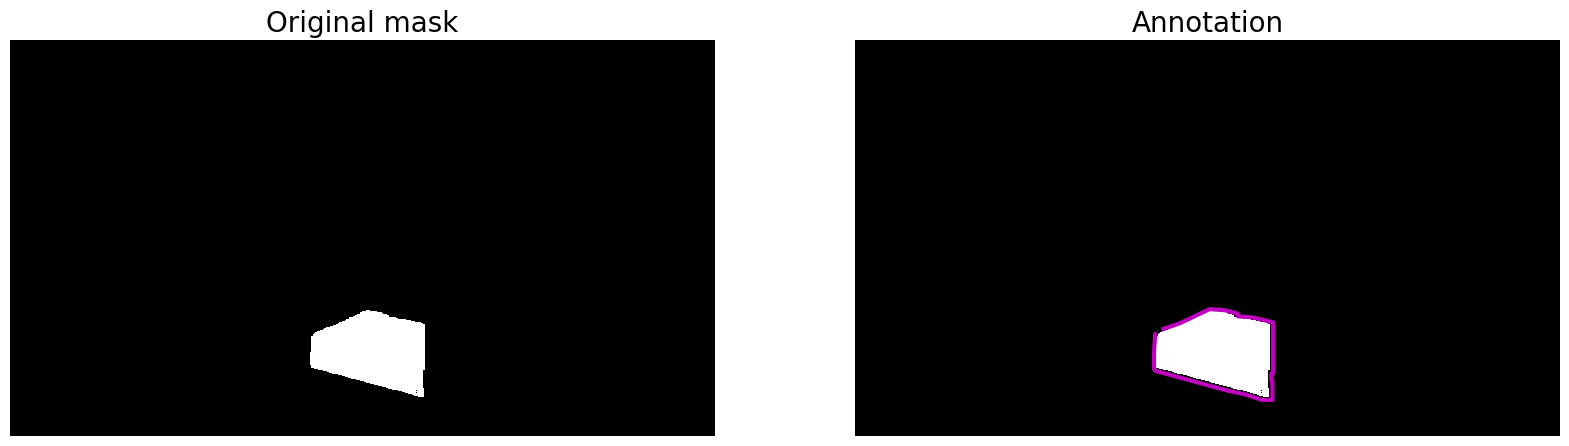

 Succesfully saved image:  reading_oc_2_colour_mask_2_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  reading_oc_2_colour_mask_3_mask.png


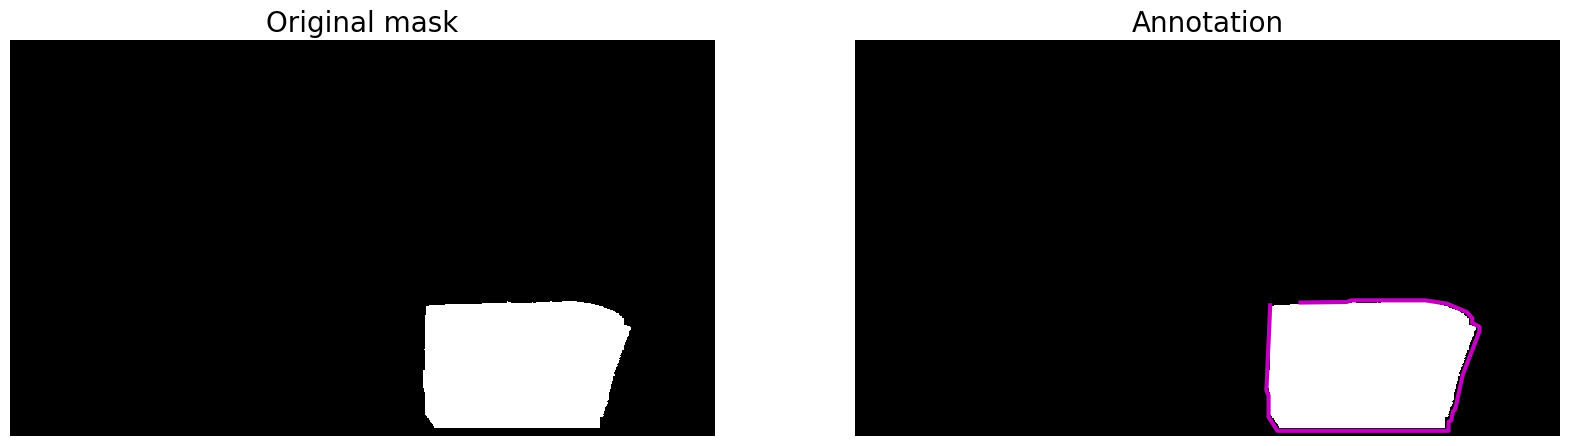

 Succesfully saved image:  reading_oc_2_colour_mask_3_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  shooters_no_3_colour_mask_1_mask.png


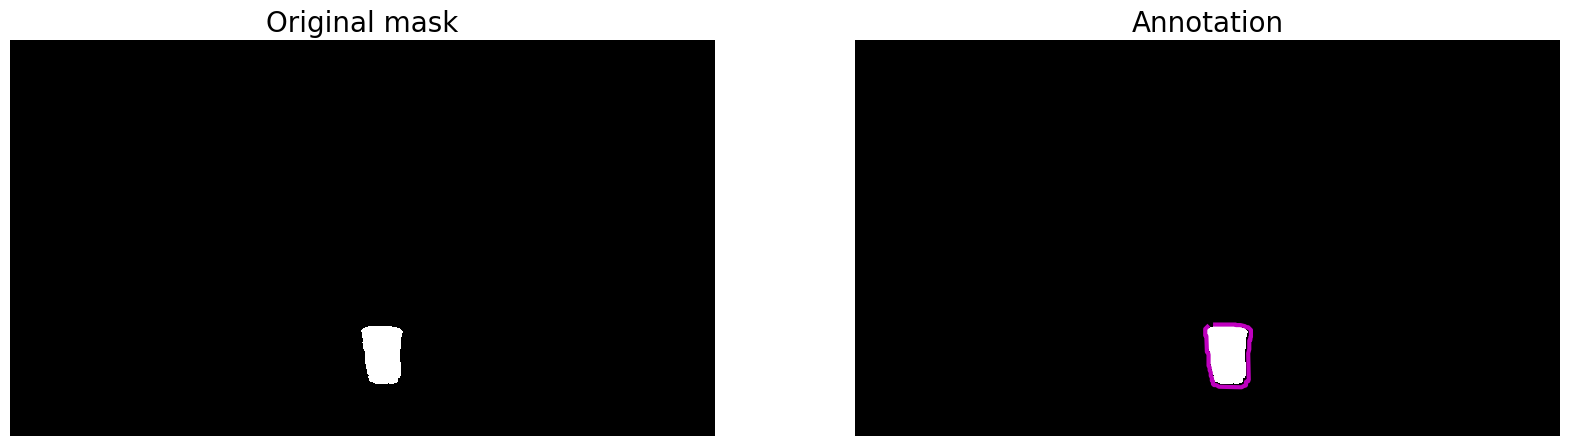

 Succesfully saved image:  shooters_no_3_colour_mask_1_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  shooters_no_3_colour_mask_2_mask.png


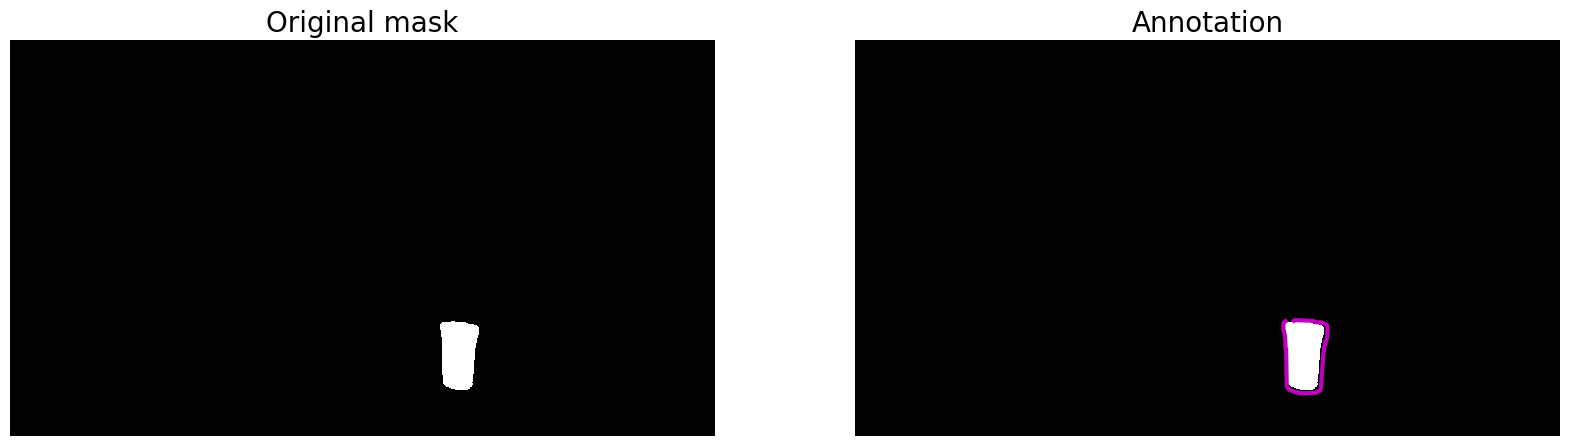

 Succesfully saved image:  shooters_no_3_colour_mask_2_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  shooters_no_3_colour_mask_3_mask.png


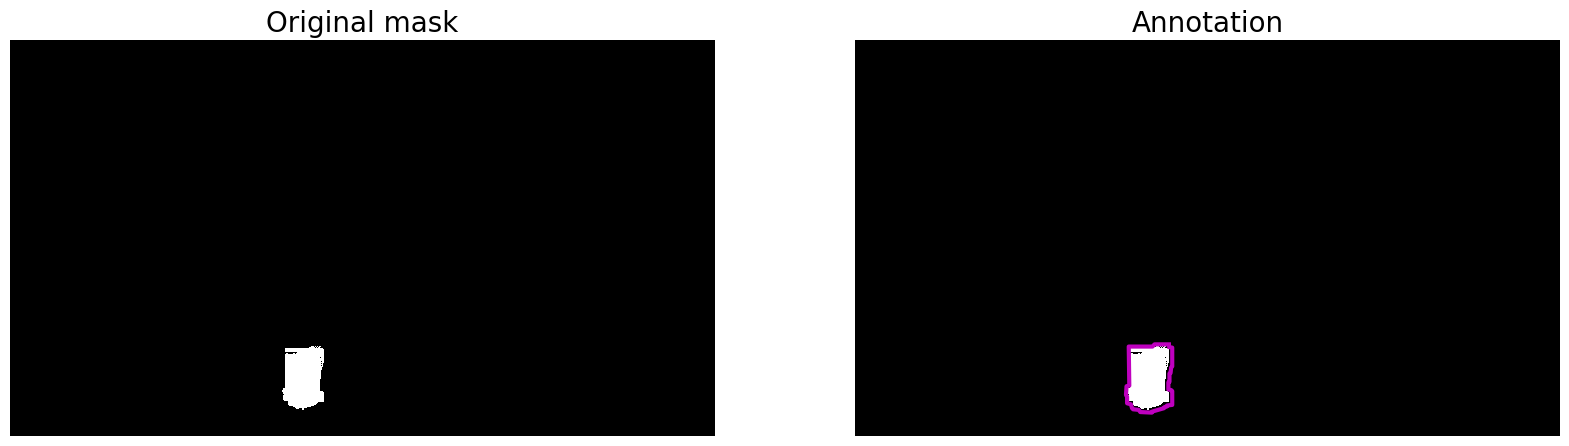

 Succesfully saved image:  shooters_no_3_colour_mask_3_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  shooters_oc_3_colour_mask_0_mask.png


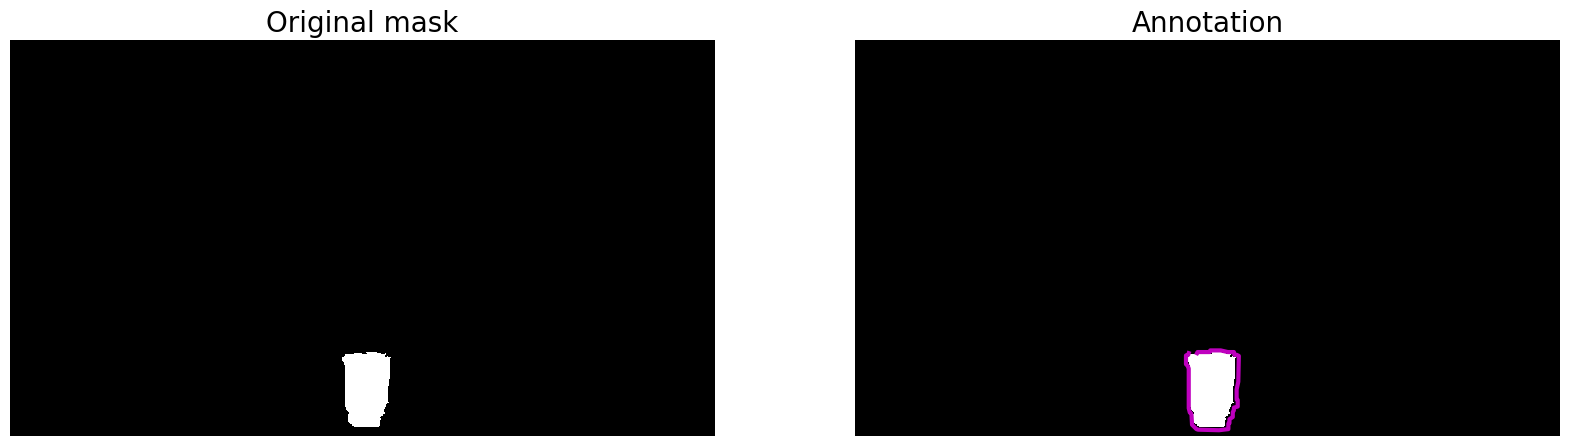

 Succesfully saved image:  shooters_oc_3_colour_mask_0_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  shooters_oc_3_colour_mask_1_mask.png


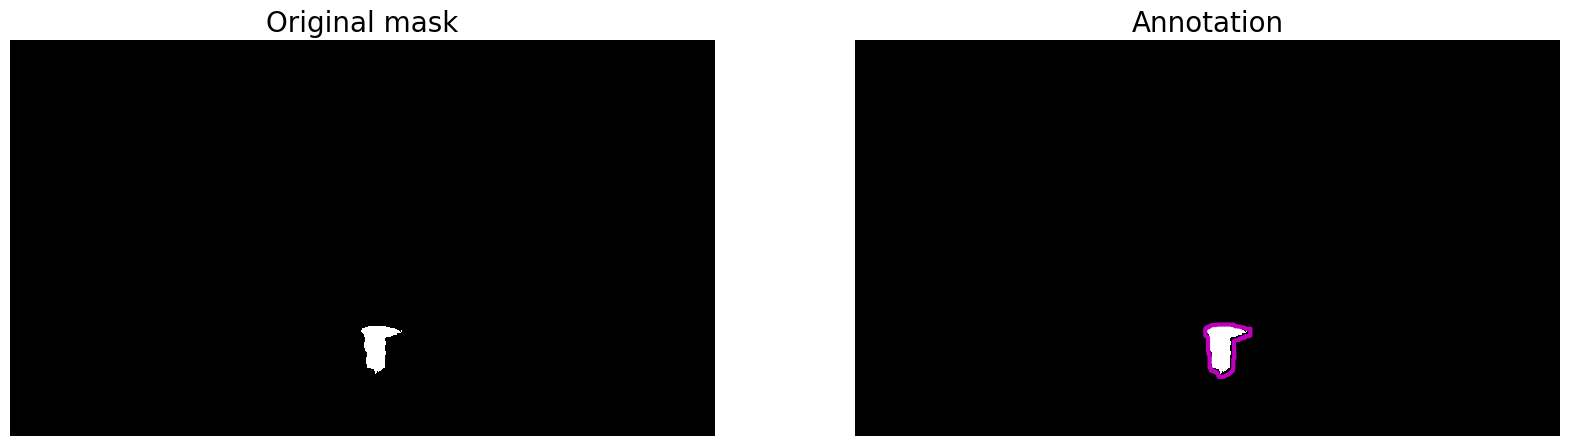

 Succesfully saved image:  shooters_oc_3_colour_mask_1_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  shooters_oc_3_colour_mask_2_mask.png


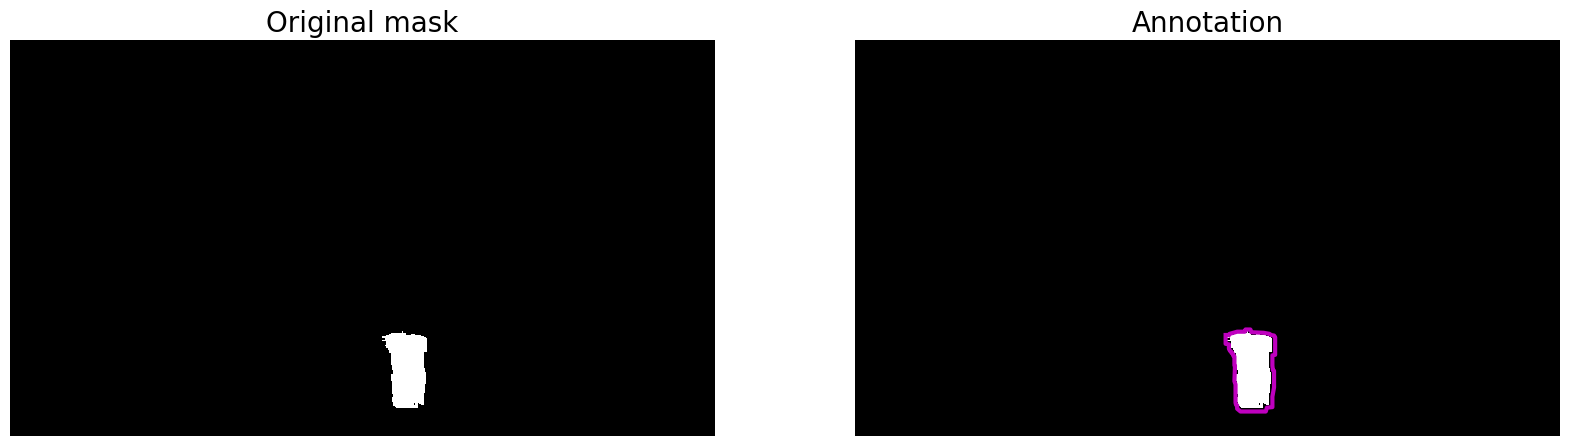

 Succesfully saved image:  shooters_oc_3_colour_mask_2_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  souvenirs_no_3_colour_mask_1_mask.png


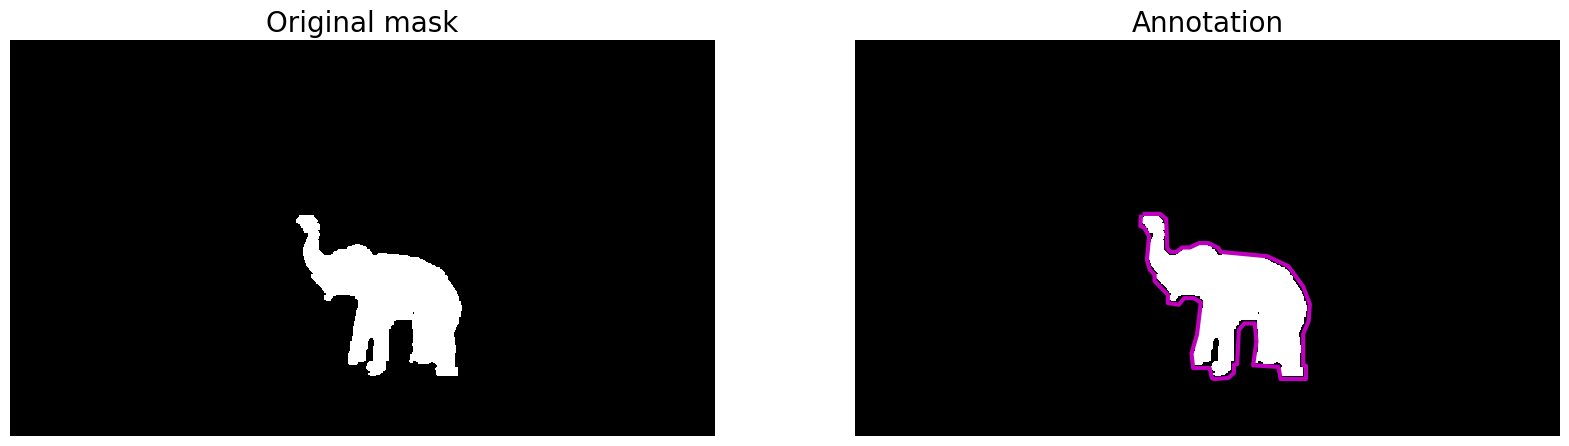

 Succesfully saved image:  souvenirs_no_3_colour_mask_1_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  souvenirs_no_3_colour_mask_2_mask.png


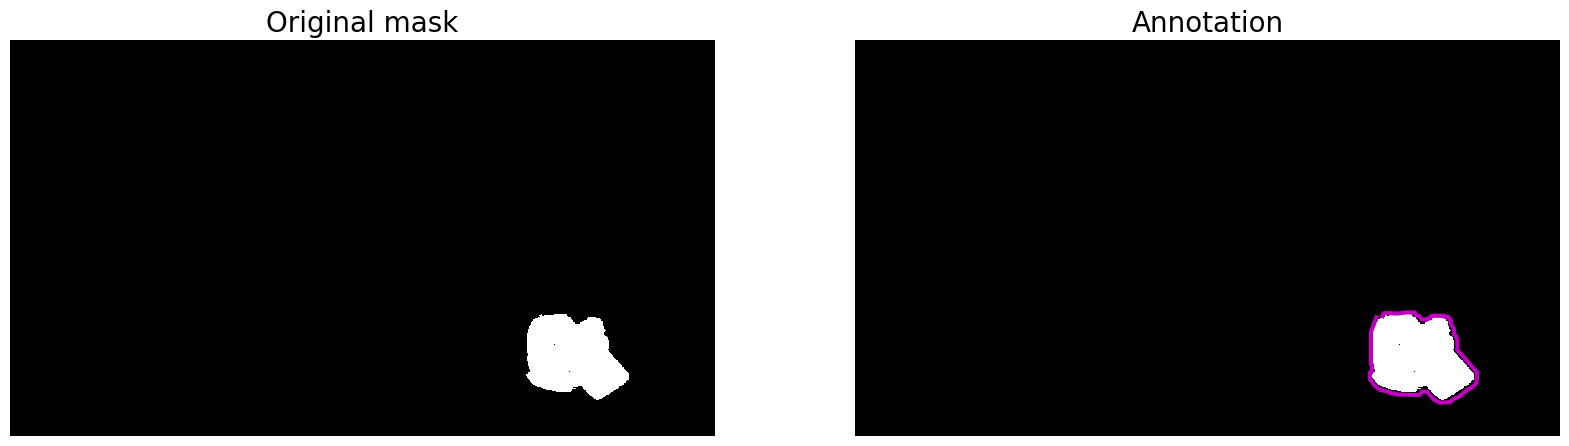

 Succesfully saved image:  souvenirs_no_3_colour_mask_2_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  souvenirs_no_3_colour_mask_3_mask.png


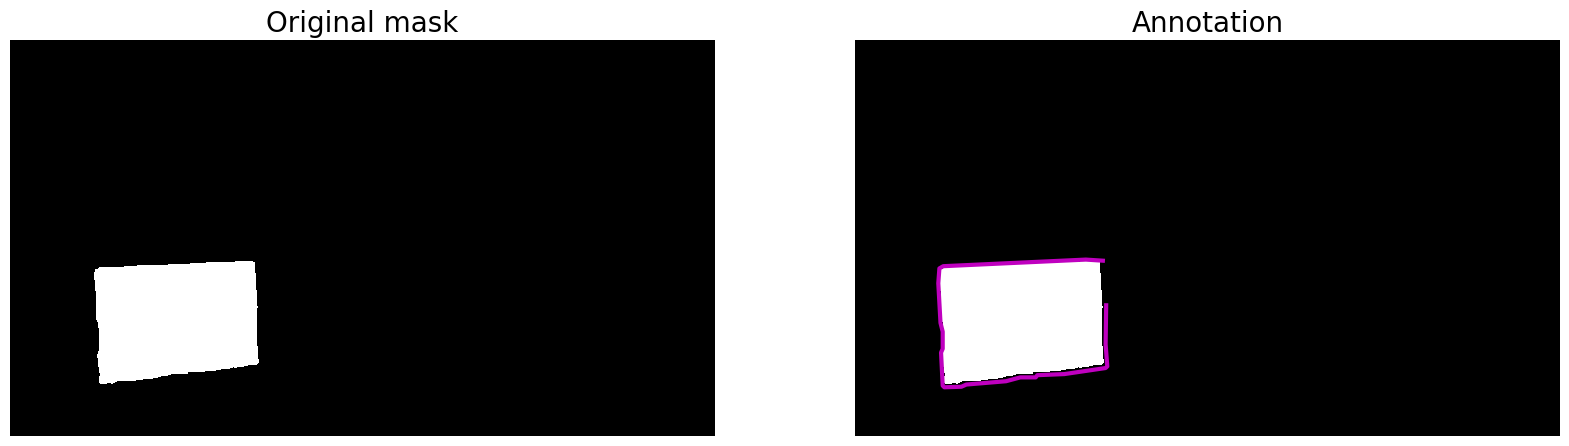

 Succesfully saved image:  souvenirs_no_3_colour_mask_3_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  souveniers_oc_3_colour_mask_0_mask.png


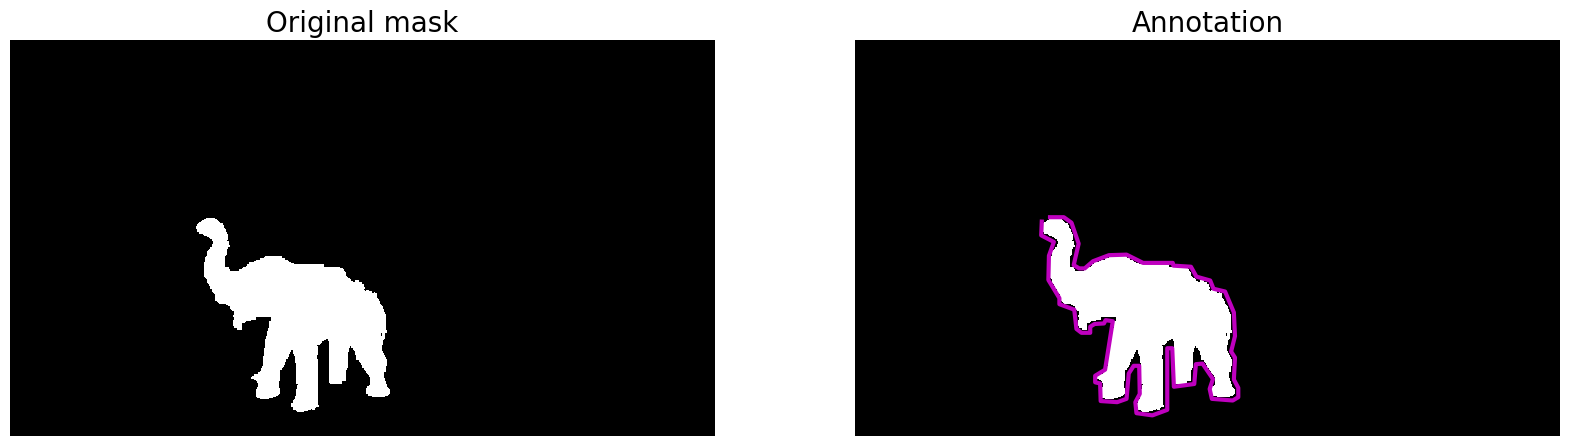

 Succesfully saved image:  souveniers_oc_3_colour_mask_0_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  souveniers_oc_3_colour_mask_1_mask.png


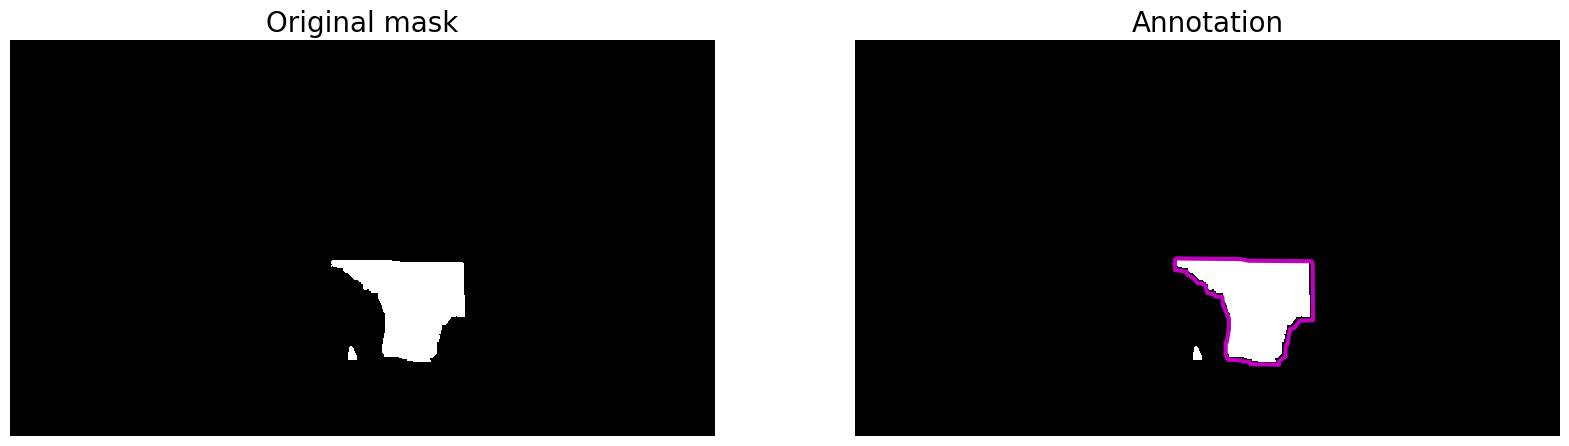

 Succesfully saved image:  souveniers_oc_3_colour_mask_1_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  souveniers_oc_3_colour_mask_2_mask.png


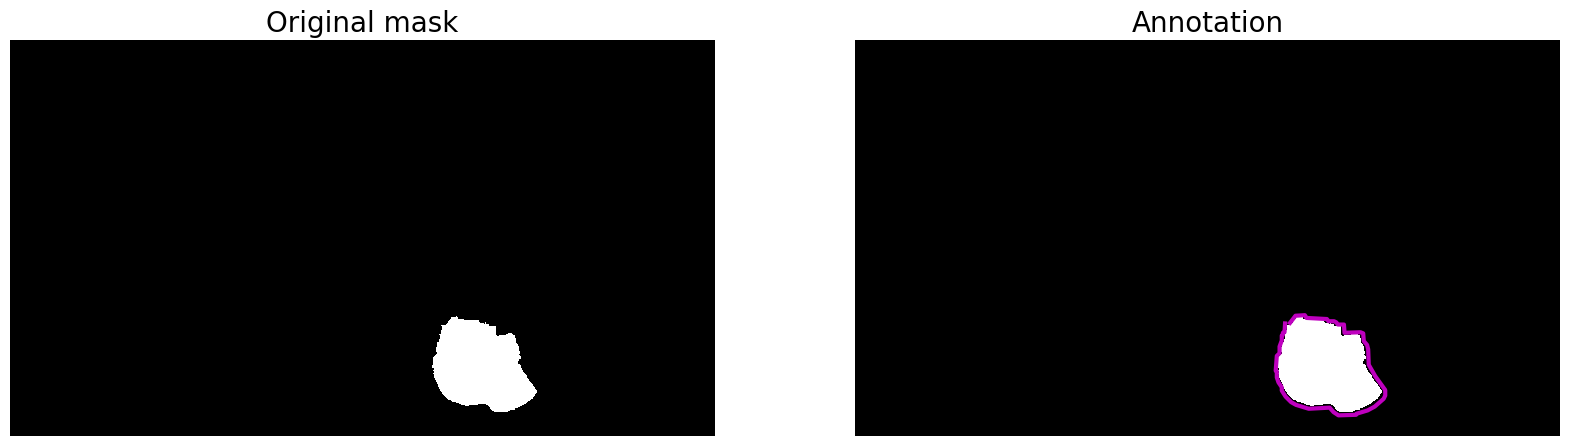

 Succesfully saved image:  souveniers_oc_3_colour_mask_2_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  statues_no_3_colour_mask_0_mask.png


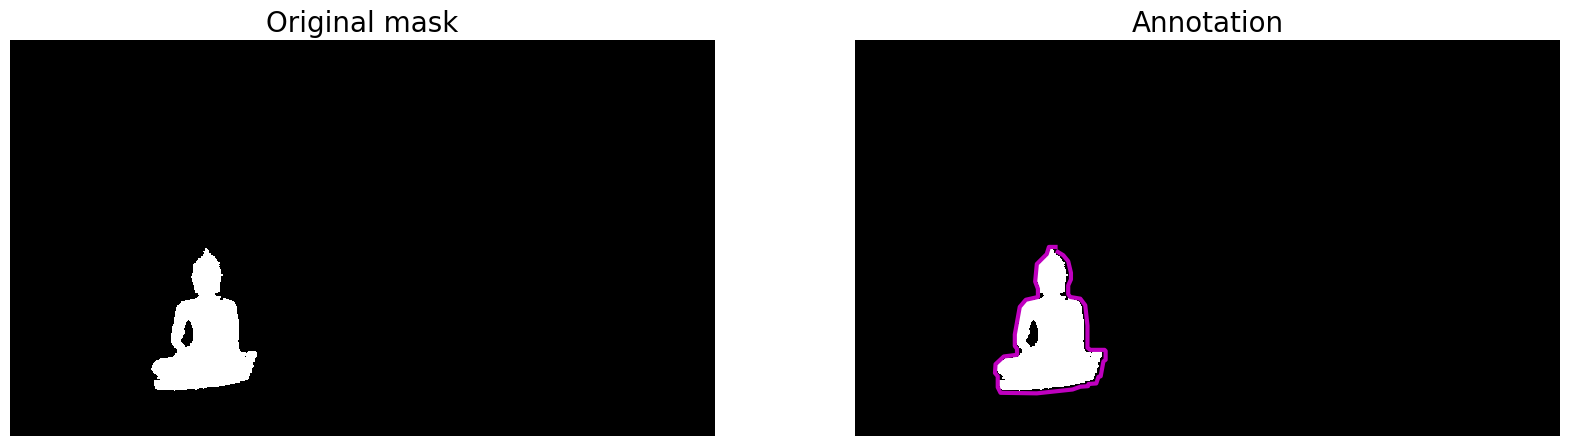

 Succesfully saved image:  statues_no_3_colour_mask_0_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  statues_no_3_colour_mask_1_mask.png


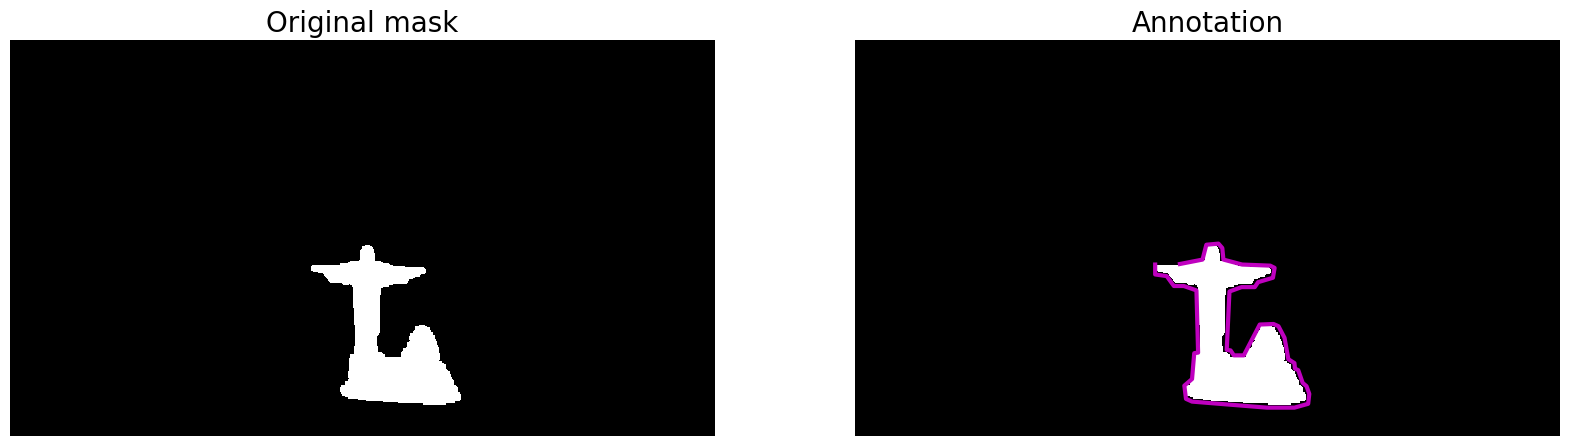

 Succesfully saved image:  statues_no_3_colour_mask_1_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  statues_no_3_colour_mask_2_mask.png


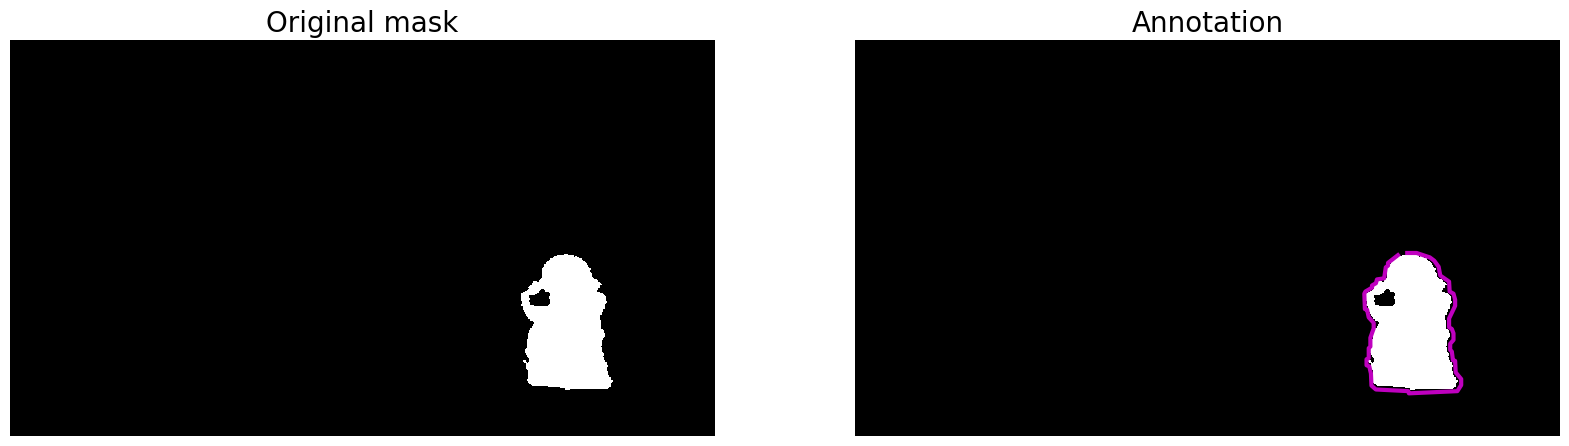

 Succesfully saved image:  statues_no_3_colour_mask_2_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  statues_oc_3_colour_mask_0_mask.png


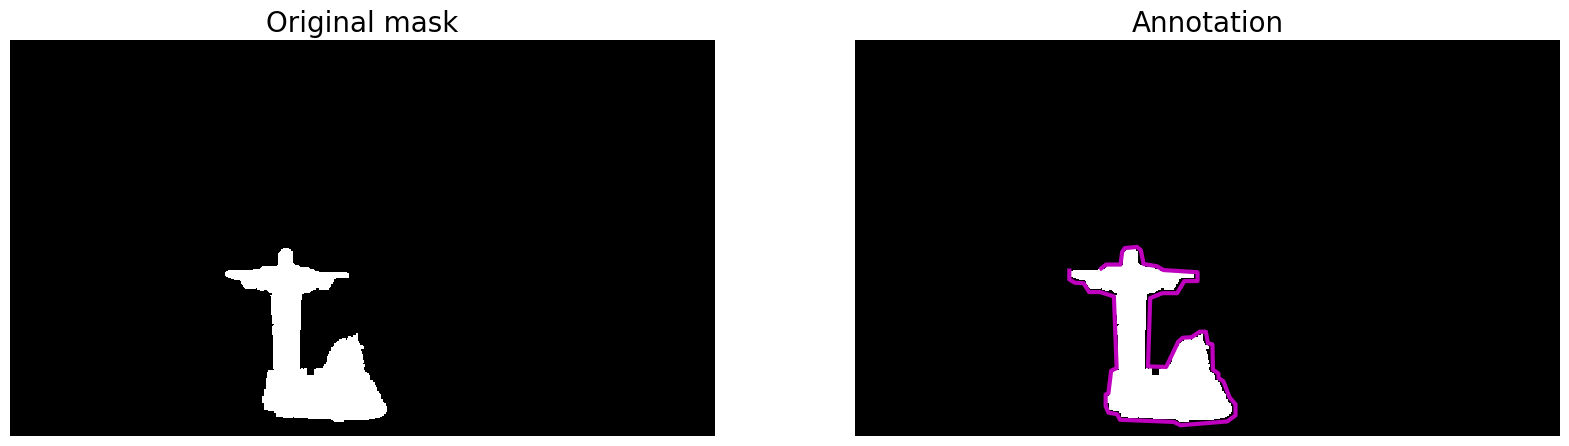

 Succesfully saved image:  statues_oc_3_colour_mask_0_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  statues_oc_3_colour_mask_4_mask.png


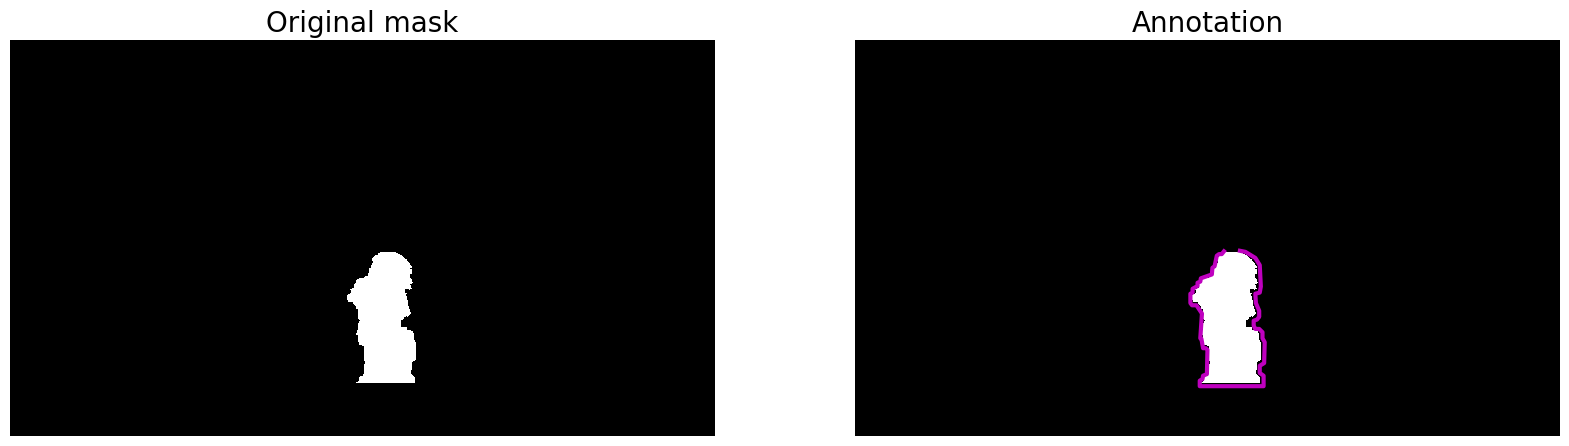

 Succesfully saved image:  statues_oc_3_colour_mask_4_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  statues_oc_3_colour_mask_5_mask.png


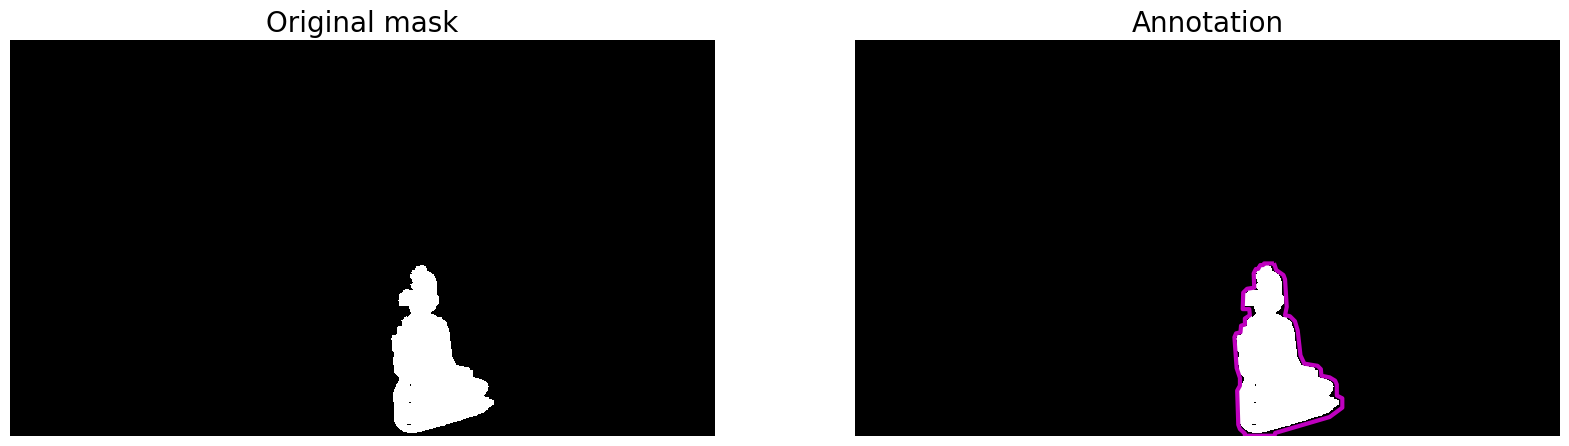

 Succesfully saved image:  statues_oc_3_colour_mask_5_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  tech_no_3_colour_mask_1_mask.png


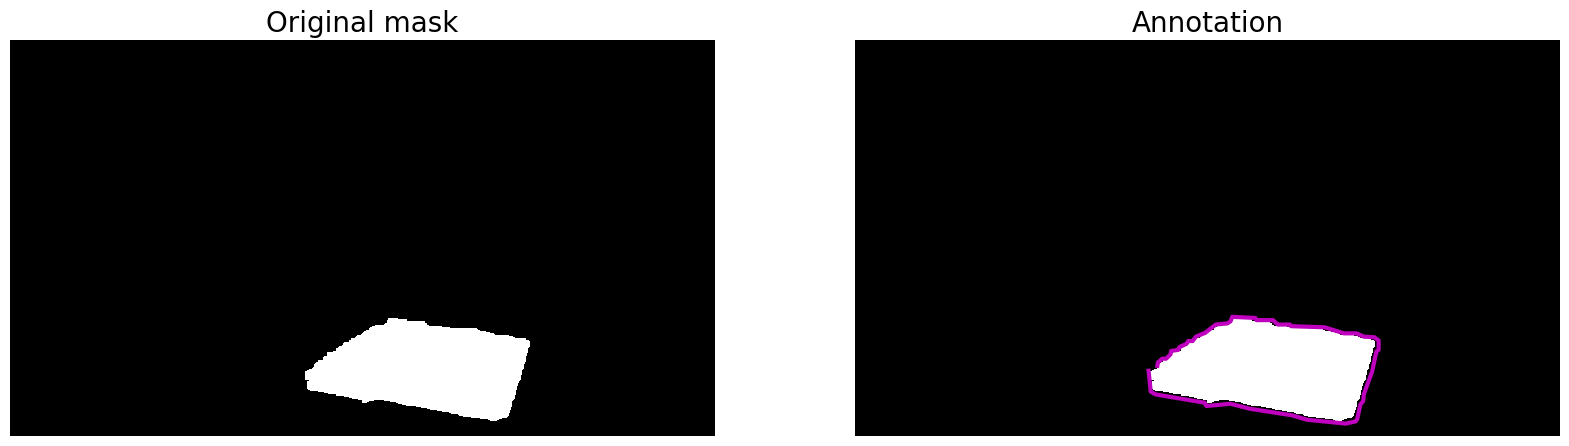

 Succesfully saved image:  tech_no_3_colour_mask_1_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  tech_no_3_colour_mask_2_mask.png


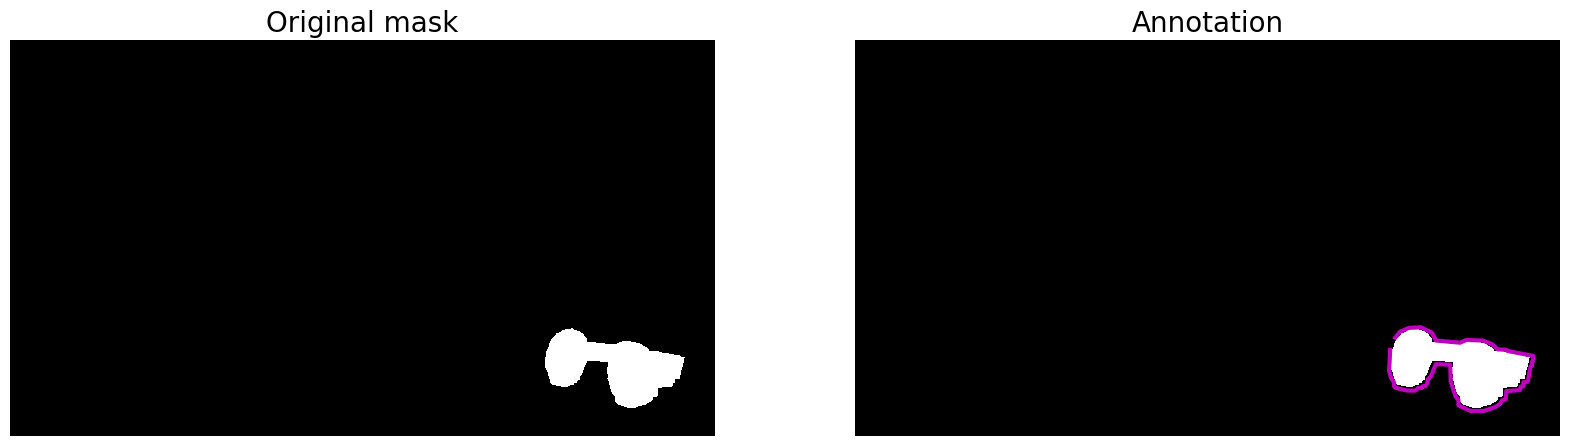

 Succesfully saved image:  tech_no_3_colour_mask_2_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  tech_no_3_colour_mask_3_mask.png


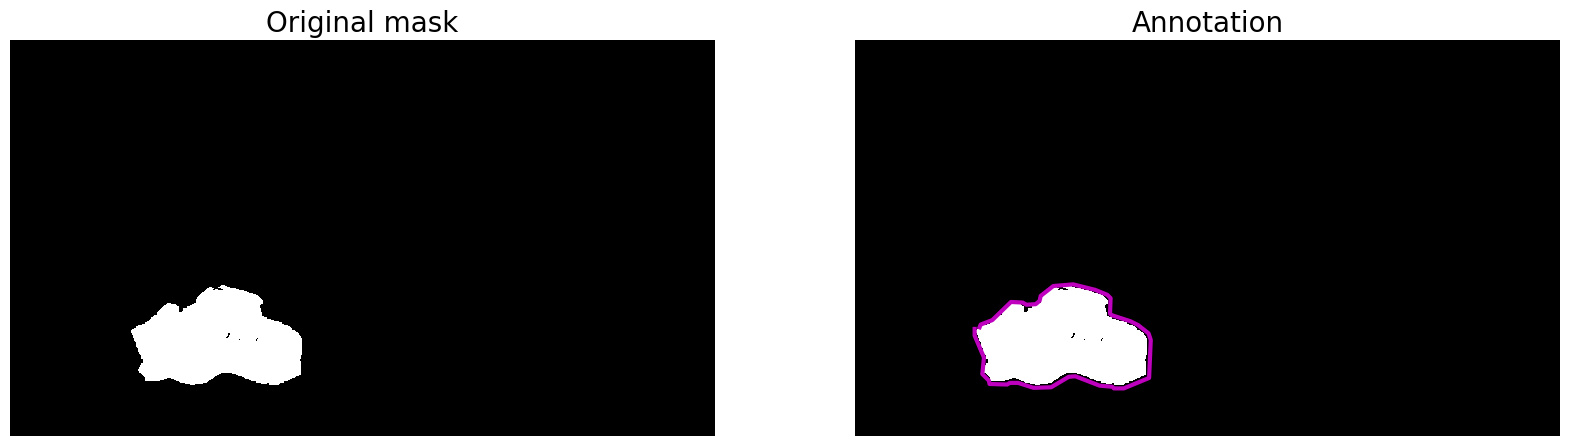

 Succesfully saved image:  tech_no_3_colour_mask_3_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  tech_oc_3_colour_mask_0_mask.png


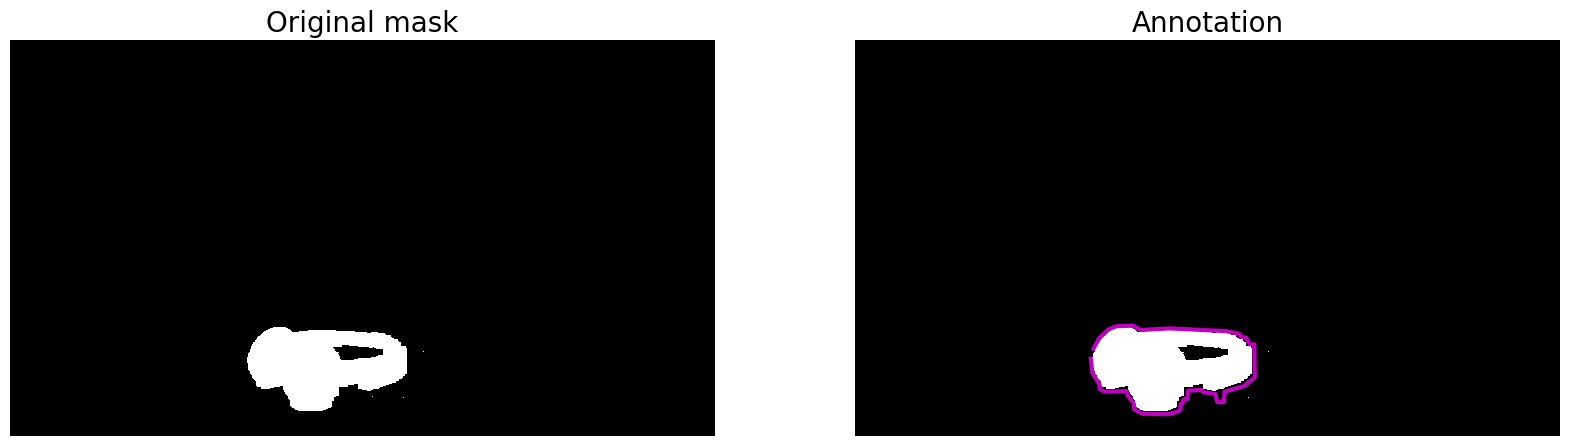

 Succesfully saved image:  tech_oc_3_colour_mask_0_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  tech_oc_3_colour_mask_1_mask.png


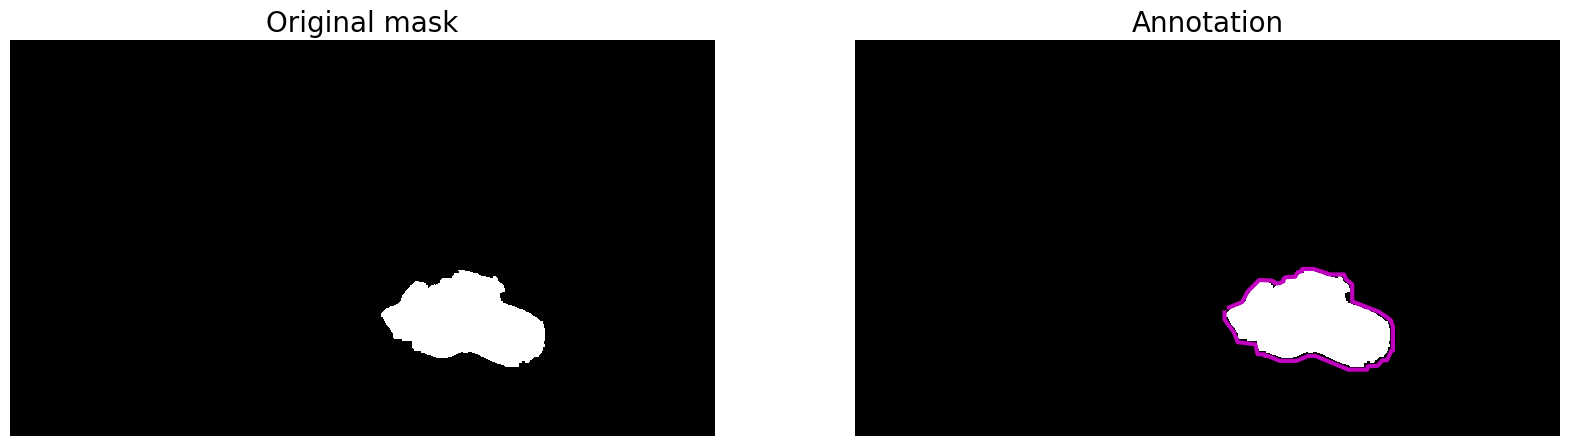

 Succesfully saved image:  tech_oc_3_colour_mask_1_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  tech_oc_3_colour_mask_2_mask.png


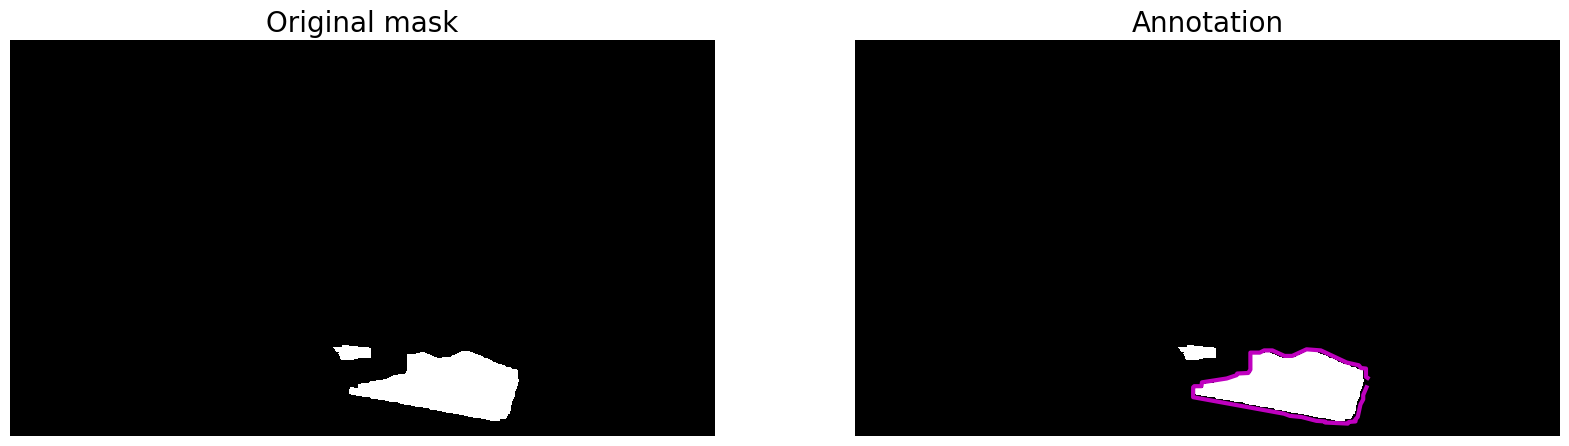

 Succesfully saved image:  tech_oc_3_colour_mask_2_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  vr_no_3_colour_mask_3_mask.png


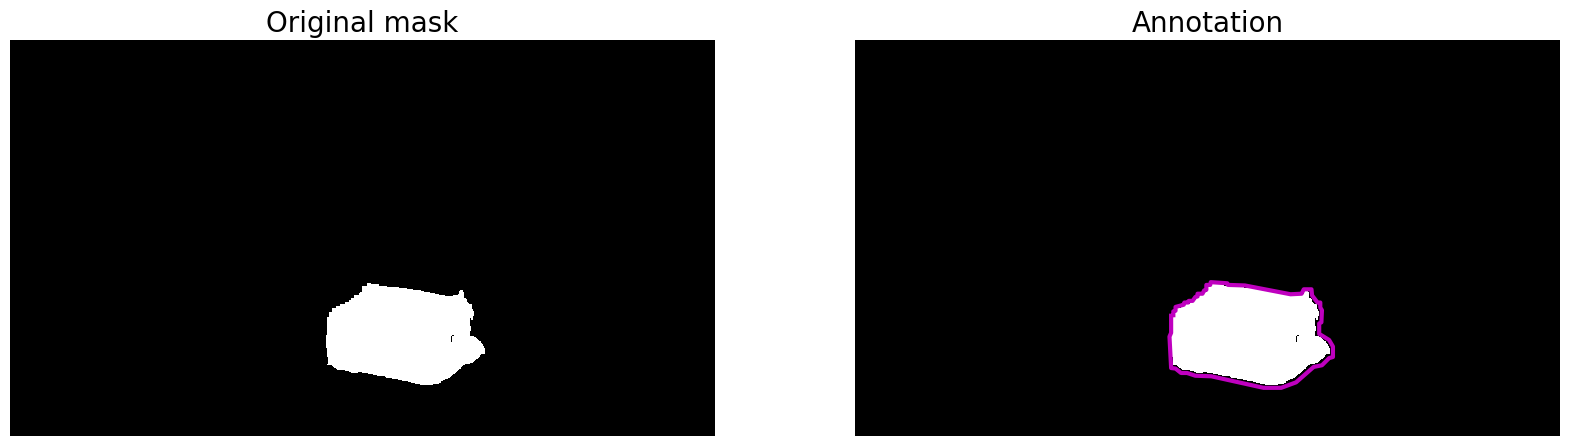

 Succesfully saved image:  vr_no_3_colour_mask_3_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  vr_no_3_colour_mask_4_mask.png


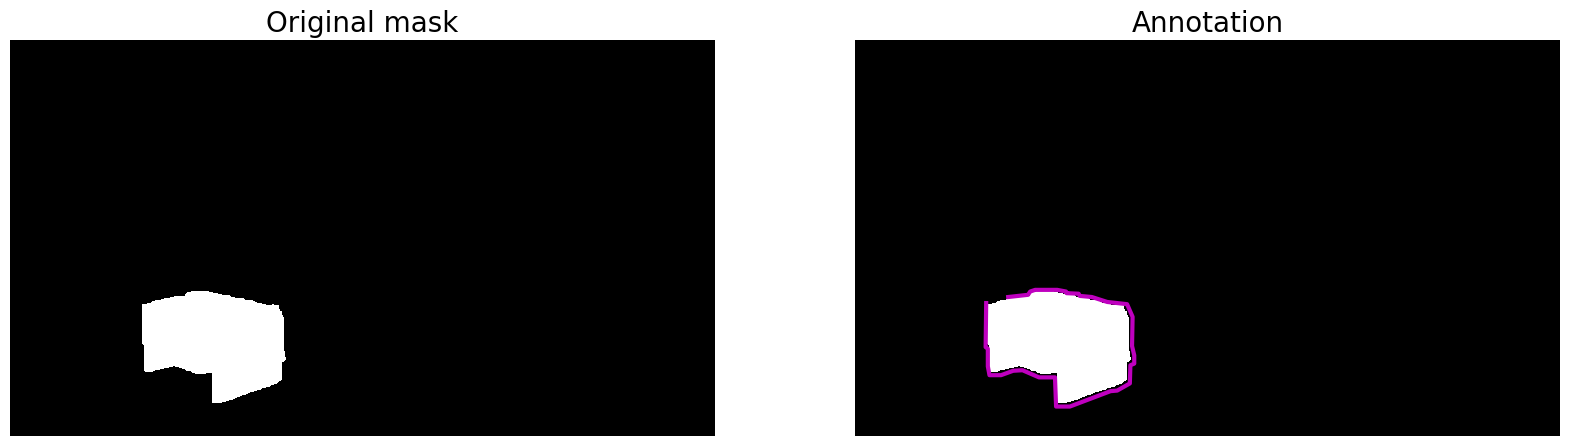

 Succesfully saved image:  vr_no_3_colour_mask_4_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  vr_no_3_colour_mask_5_mask.png


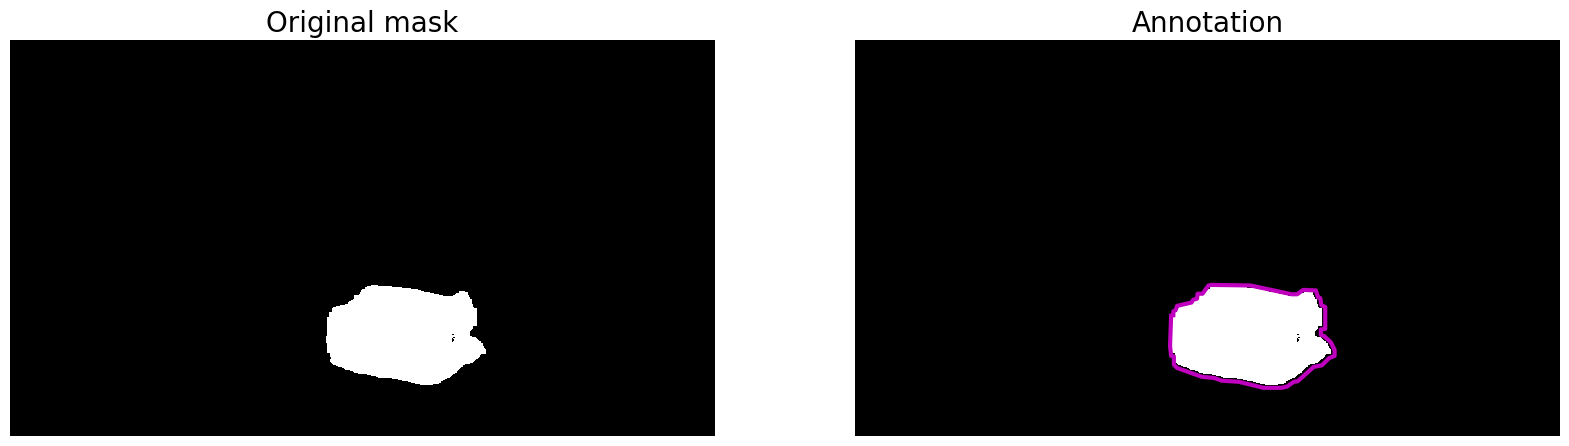

 Succesfully saved image:  vr_no_3_colour_mask_5_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  vr_oc_3_colour_mask_2_mask.png


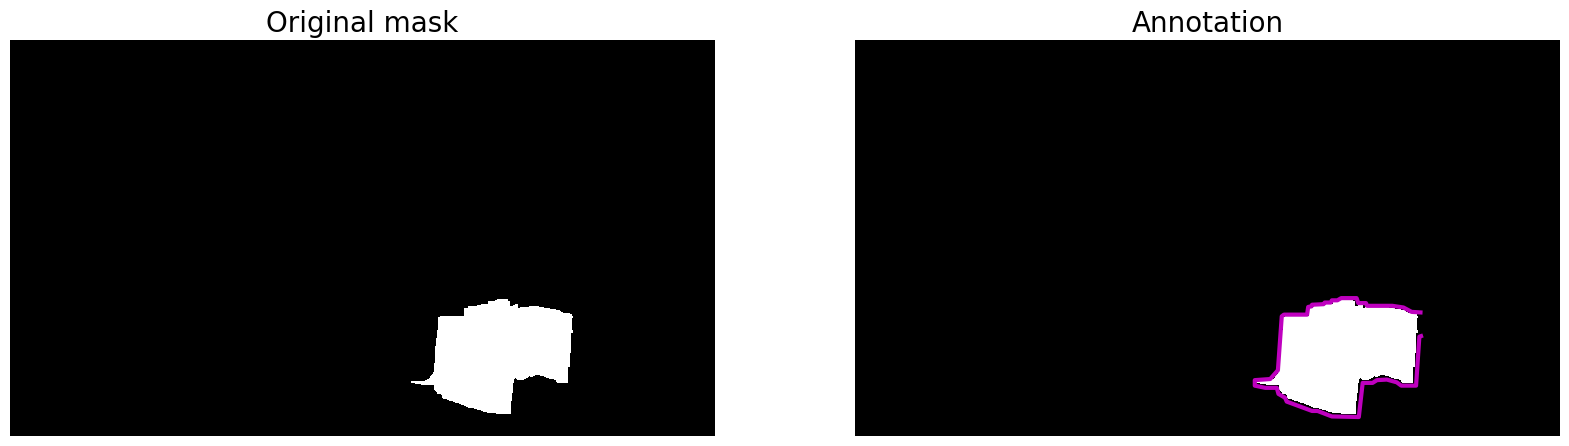

 Succesfully saved image:  vr_oc_3_colour_mask_2_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  vr_oc_3_colour_mask_3_mask.png


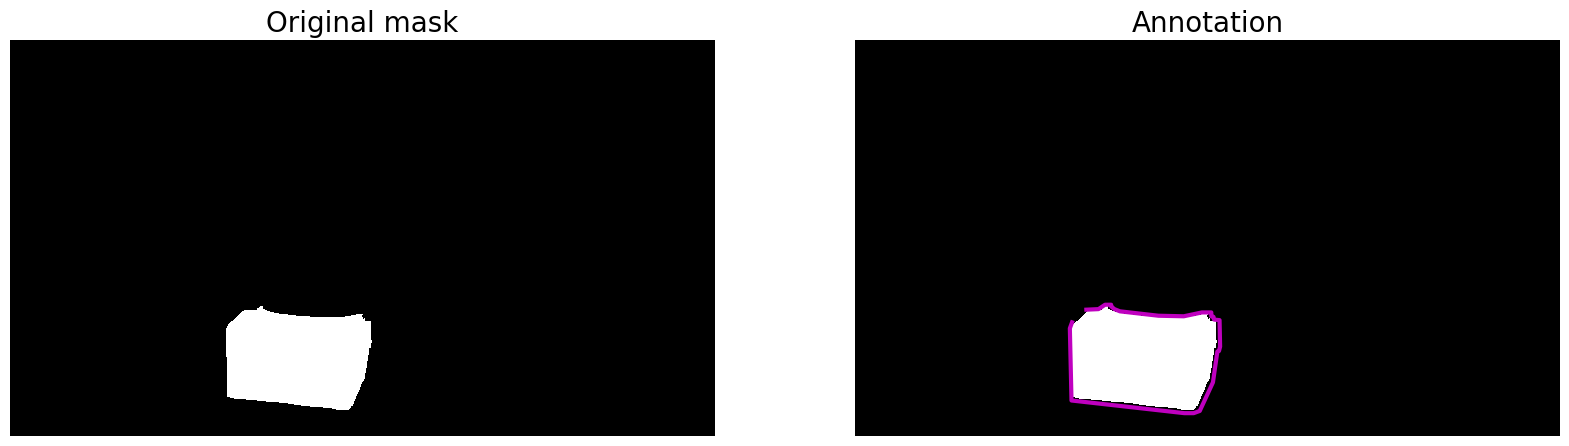

 Succesfully saved image:  vr_oc_3_colour_mask_3_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  vr_oc_3_colour_mask_4_mask.png


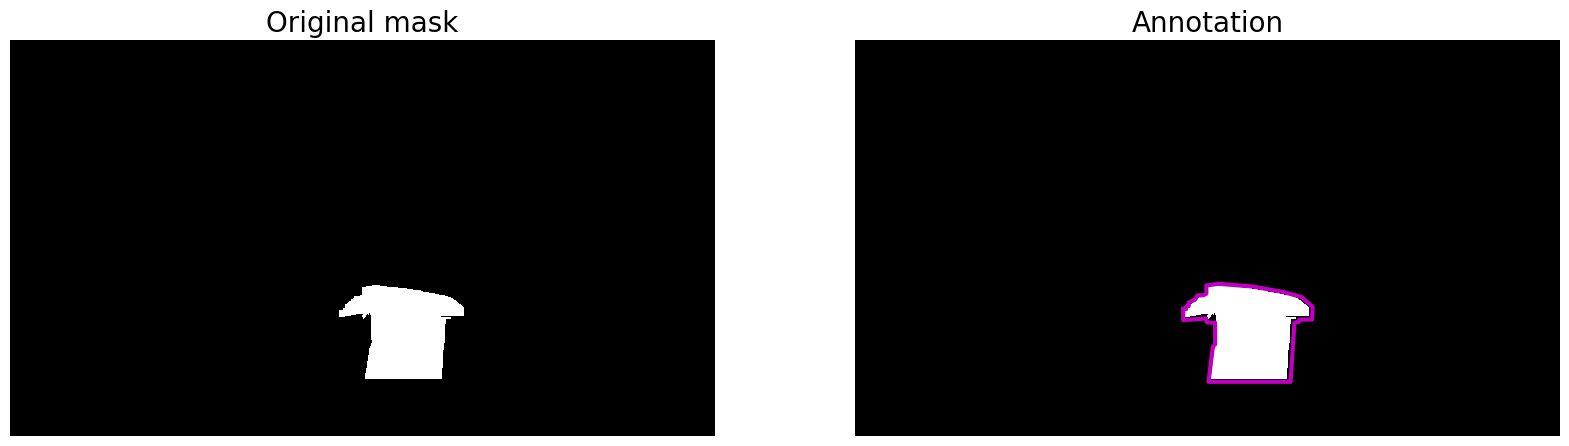

 Succesfully saved image:  vr_oc_3_colour_mask_4_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  wash_no_3_colour_mask_3_mask.png


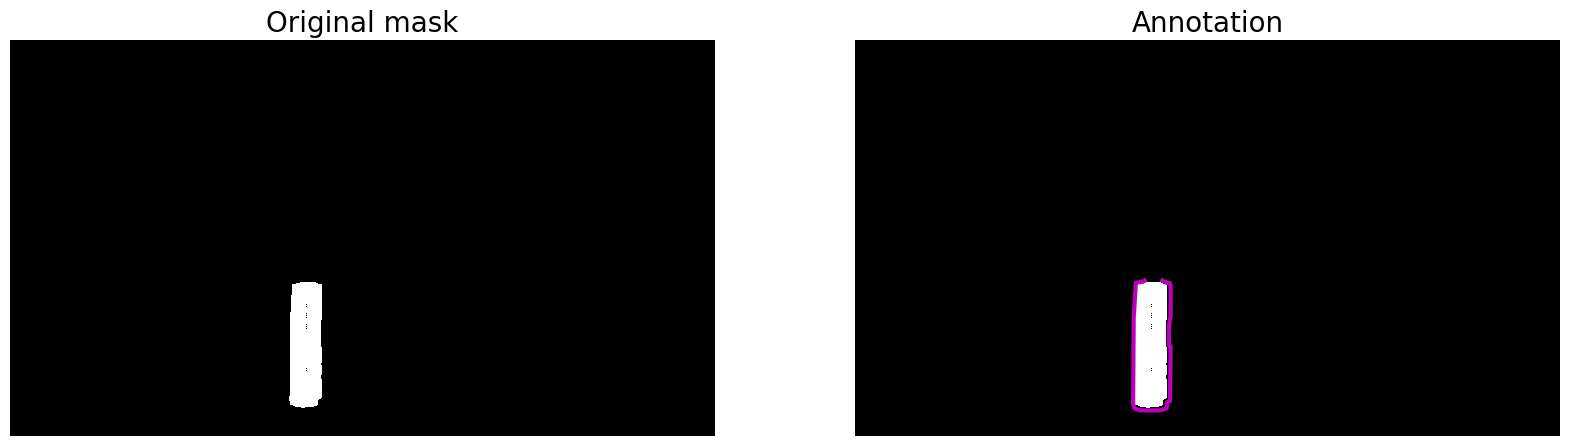

 Succesfully saved image:  wash_no_3_colour_mask_3_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  wash_no_3_colour_mask_4_mask.png


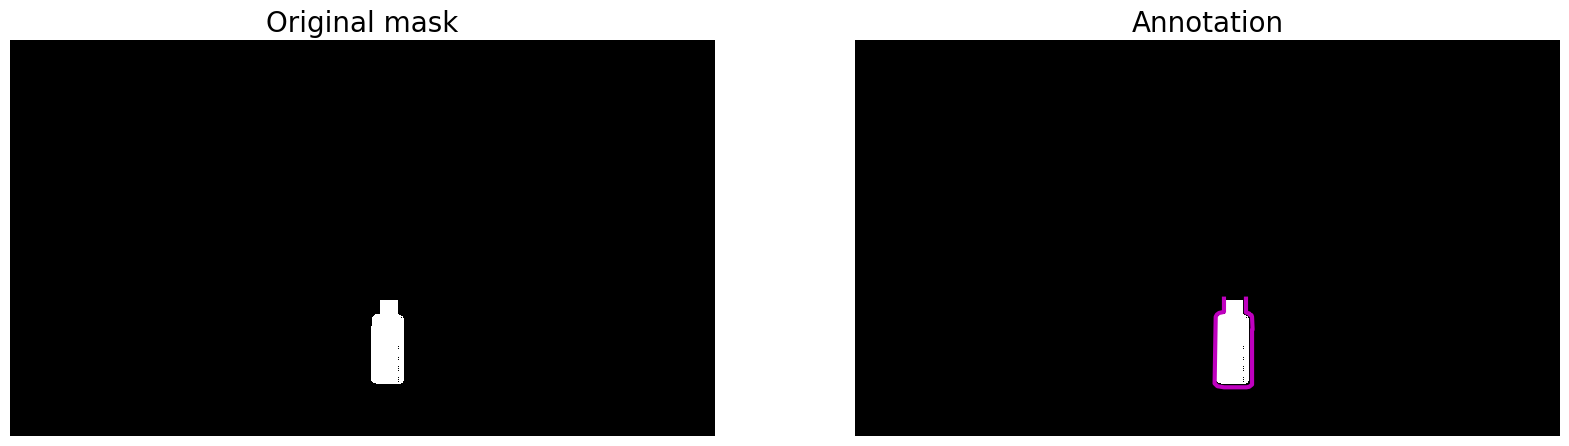

 Succesfully saved image:  wash_no_3_colour_mask_4_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  wash_no_3_colour_mask_5_mask.png


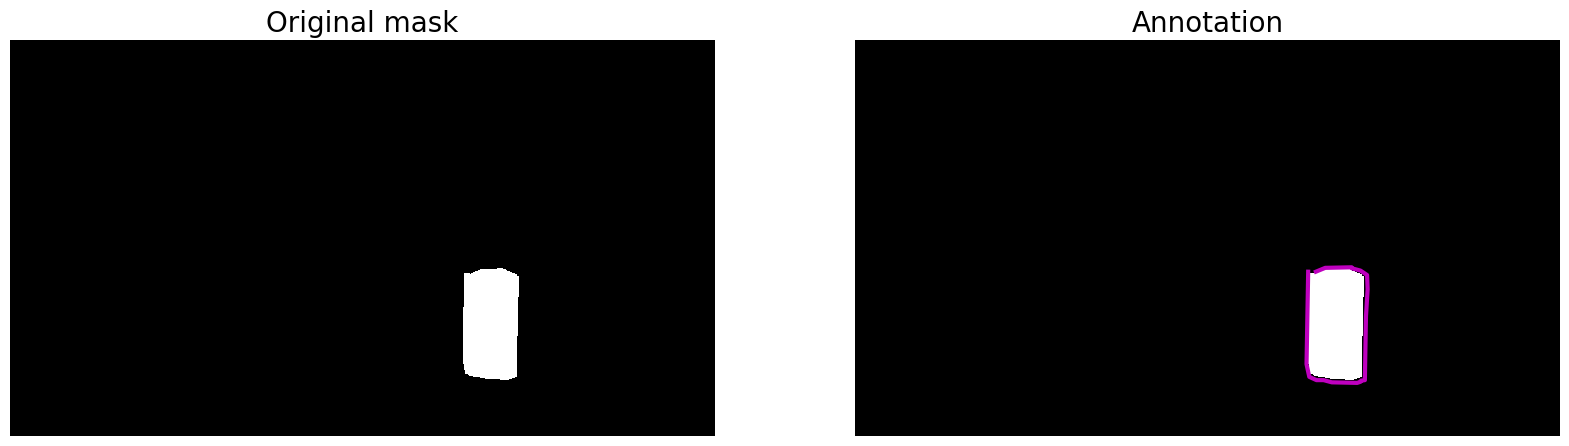

 Succesfully saved image:  wash_no_3_colour_mask_5_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  wash_oc_3_colour_mask_0_mask.png


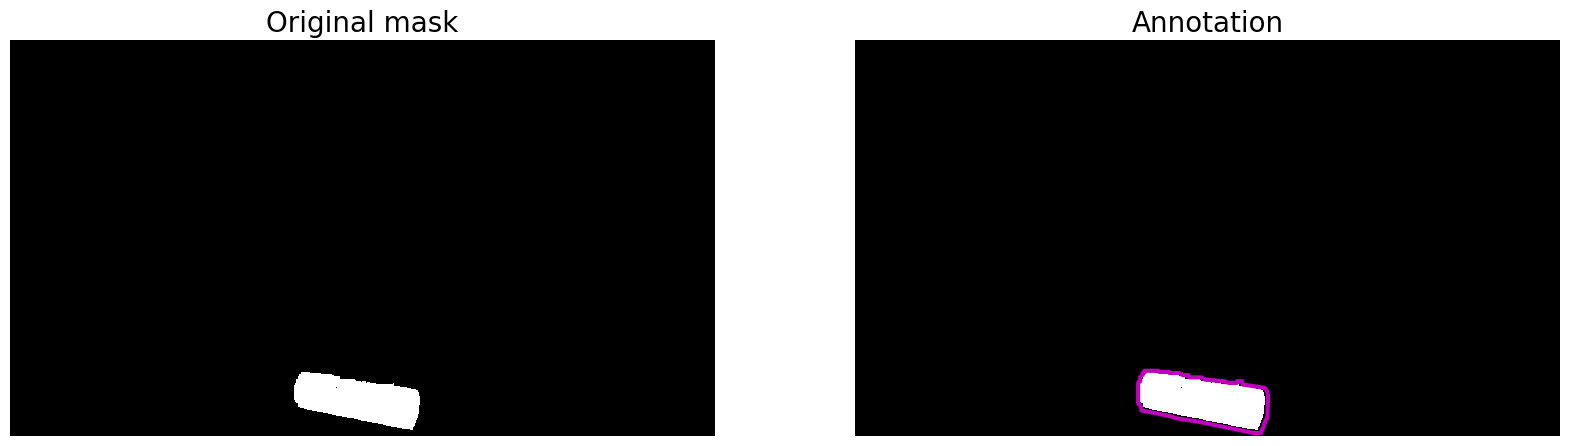

 Succesfully saved image:  wash_oc_3_colour_mask_0_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  wash_oc_3_colour_mask_1_mask.png


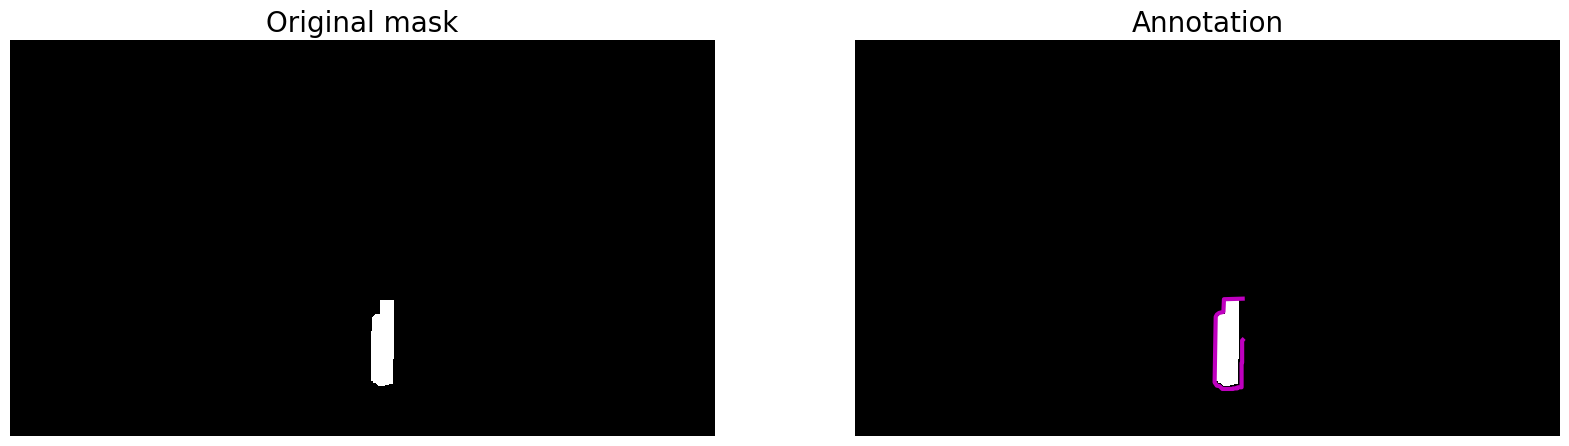

 Succesfully saved image:  wash_oc_3_colour_mask_1_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  wash_oc_3_colour_mask_2_mask.png


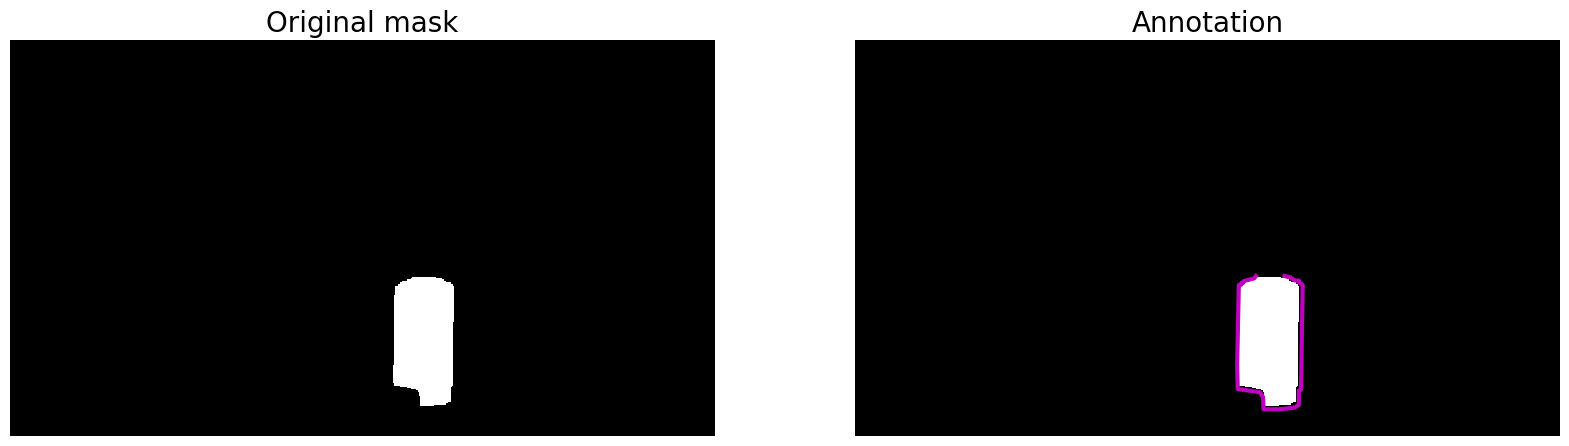

 Succesfully saved image:  wash_oc_3_colour_mask_2_mask.png 


------------------------------------------------------------------------------------------------------------------------


In [11]:
coco_output_dir="COCO_annotations"
coco_color='m'

image_id=0
for image_paths in os.listdir(part2_multiple_objects):
    mask_paths = os.path.join(part2_multiple_objects,image_paths, "masks")
    category=image_paths
    for mask_name in os.listdir(mask_paths):
        image = cv2.imread(os.path.join(mask_paths,mask_name))
        coco.annotate((image_id,mask_name,image,project_name,category,coco_output_dir), do_display=True, do_save=True, annotation_color=coco_color)
        image_id+=1

In [12]:
yolo_output_dir = "YOLO_annotations"
yolo_color = (0, 255, 0)

image_id = 0
for image_paths in os.listdir(part2_multiple_objects):
    mask_paths = os.path.join(part2_multiple_objects, image_paths, "masks")
    category = image_paths
    for mask_name in os.listdir(mask_paths):
        image = cv2.imread(os.path.join(mask_paths, mask_name))
        yolo.annotate((image_id, mask_name, image, project_name, category, yolo_output_dir),
                      do_display=False, do_save=False, annotation_color=yolo_color)
        image_id += 1



 Annotating image:  ac_3_colour_mask_6_mask.png
------------------------------------------------------------------------------------------------------------------------

 Annotating image:  ac_3_colour_mask_7_mask.png
------------------------------------------------------------------------------------------------------------------------

 Annotating image:  ac_3_colour_mask_8_mask.png
------------------------------------------------------------------------------------------------------------------------

 Annotating image:  ac_oc_3_colour_mask_4_mask.png
------------------------------------------------------------------------------------------------------------------------

 Annotating image:  ac_oc_3_colour_mask_5_mask.png
------------------------------------------------------------------------------------------------------------------------

 Annotating image:  ac_oc_3_colour_mask_7_mask.png
--------------------------------------------------------------------------------------------


 Annotating image:  ac_3_colour_mask_6_mask.png


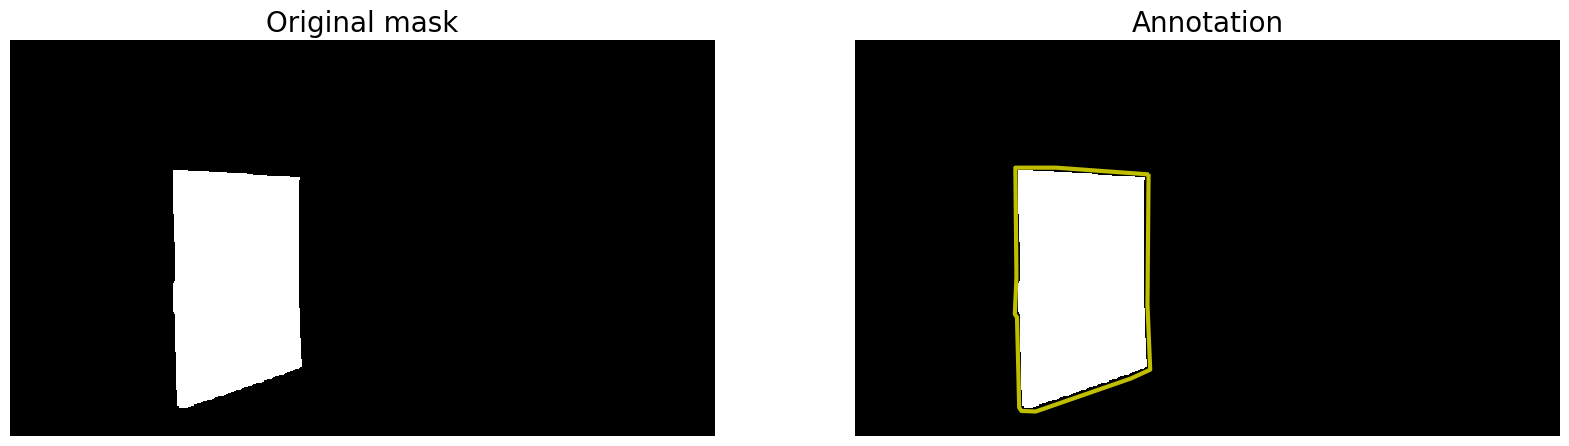

 Succesfully saved image:  ac_3_colour_mask_6_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  ac_3_colour_mask_7_mask.png


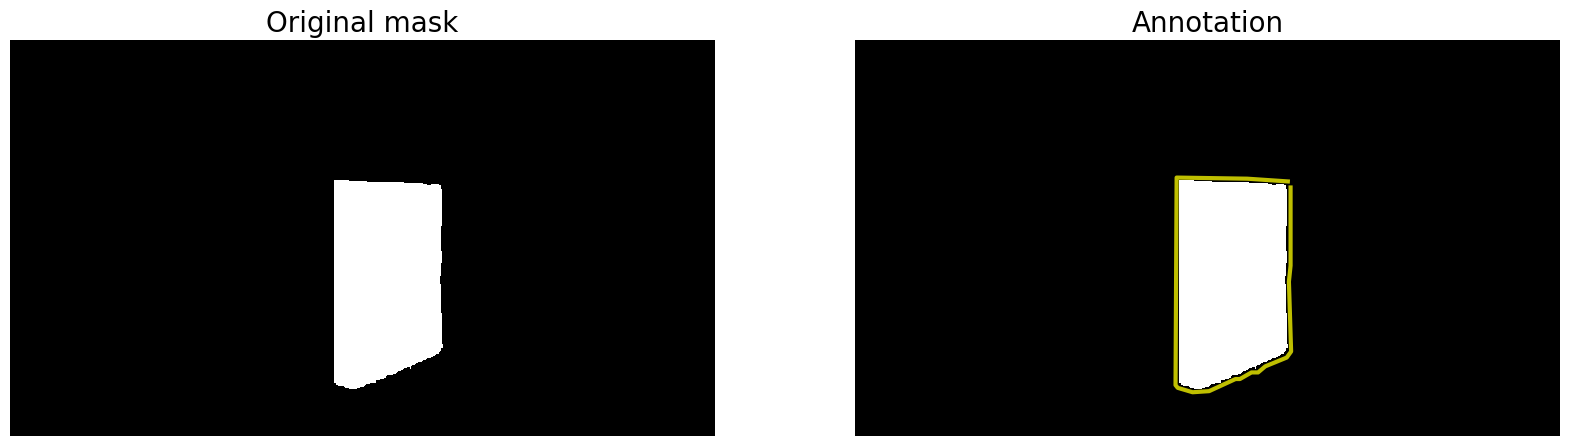

 Succesfully saved image:  ac_3_colour_mask_7_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  ac_3_colour_mask_8_mask.png


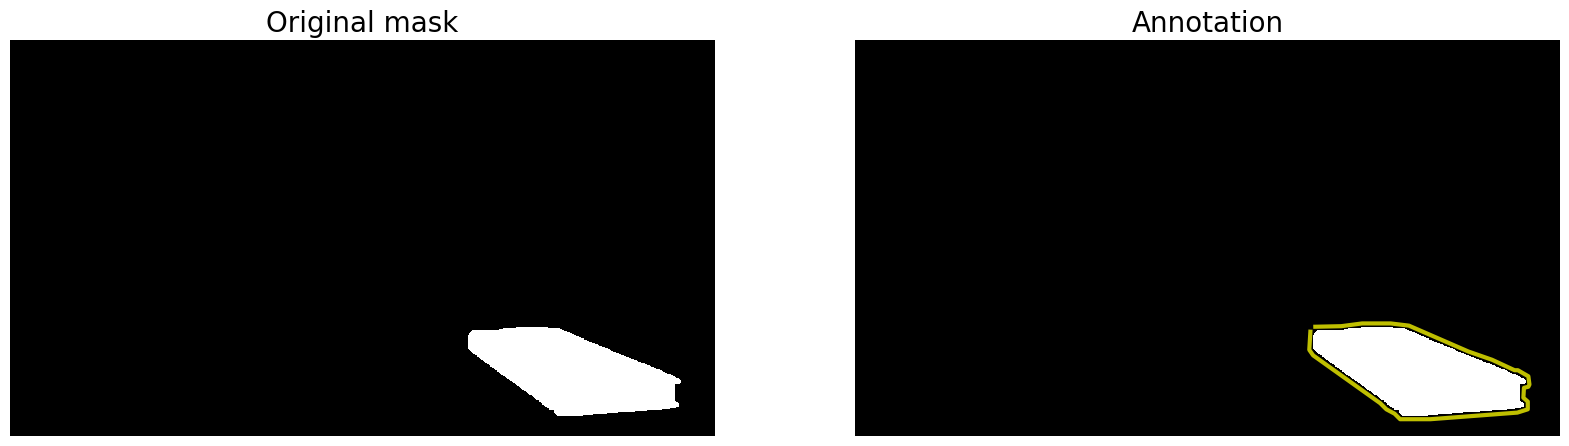

 Succesfully saved image:  ac_3_colour_mask_8_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  ac_oc_3_colour_mask_4_mask.png


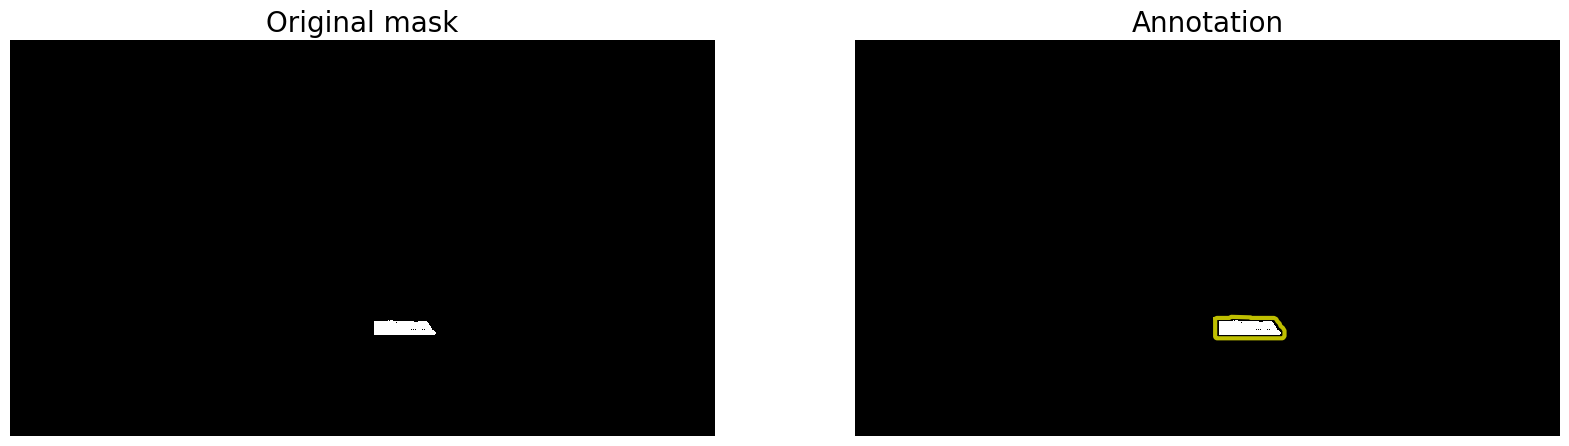

 Succesfully saved image:  ac_oc_3_colour_mask_4_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  ac_oc_3_colour_mask_5_mask.png


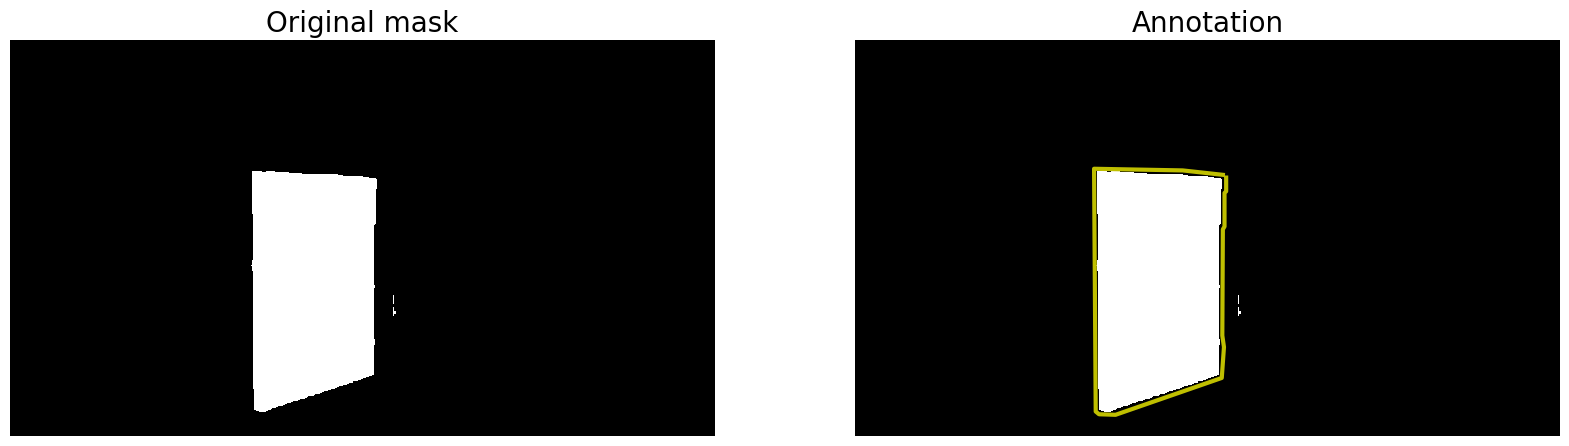

 Succesfully saved image:  ac_oc_3_colour_mask_5_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  ac_oc_3_colour_mask_7_mask.png


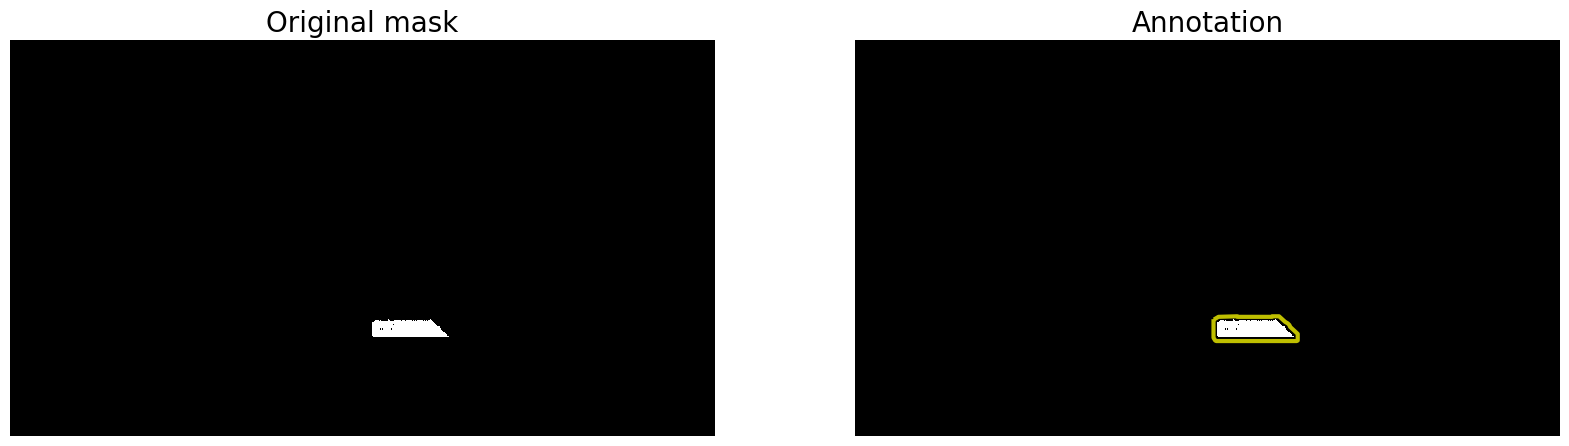

 Succesfully saved image:  ac_oc_3_colour_mask_7_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  ac_oc_3_colour_mask_8_mask.png


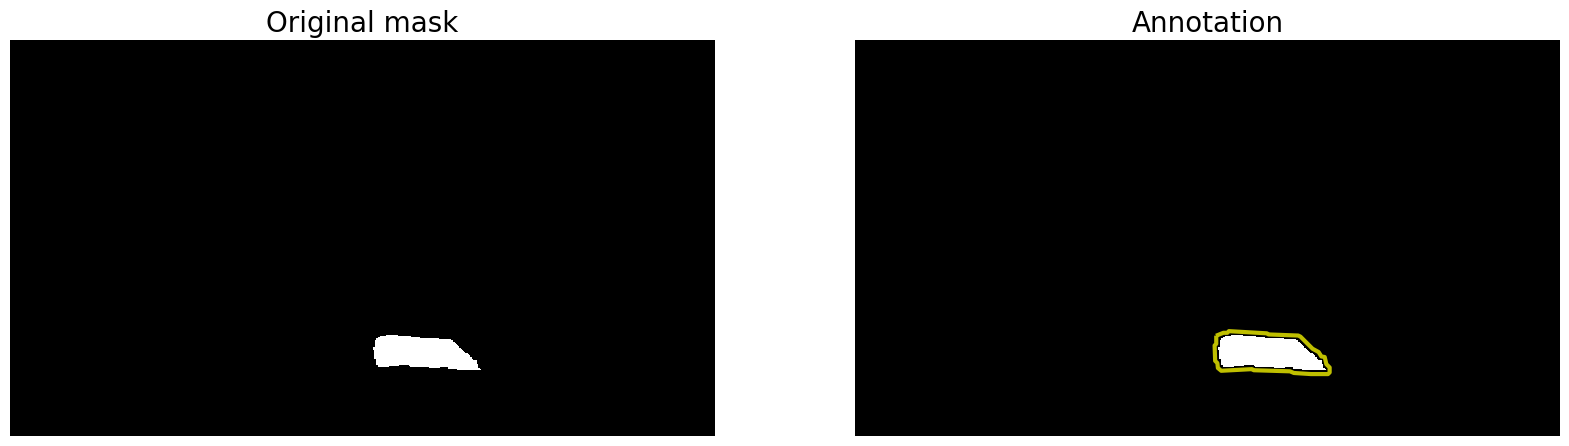

 Succesfully saved image:  ac_oc_3_colour_mask_8_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  food_3_colour_mask_1_mask.png


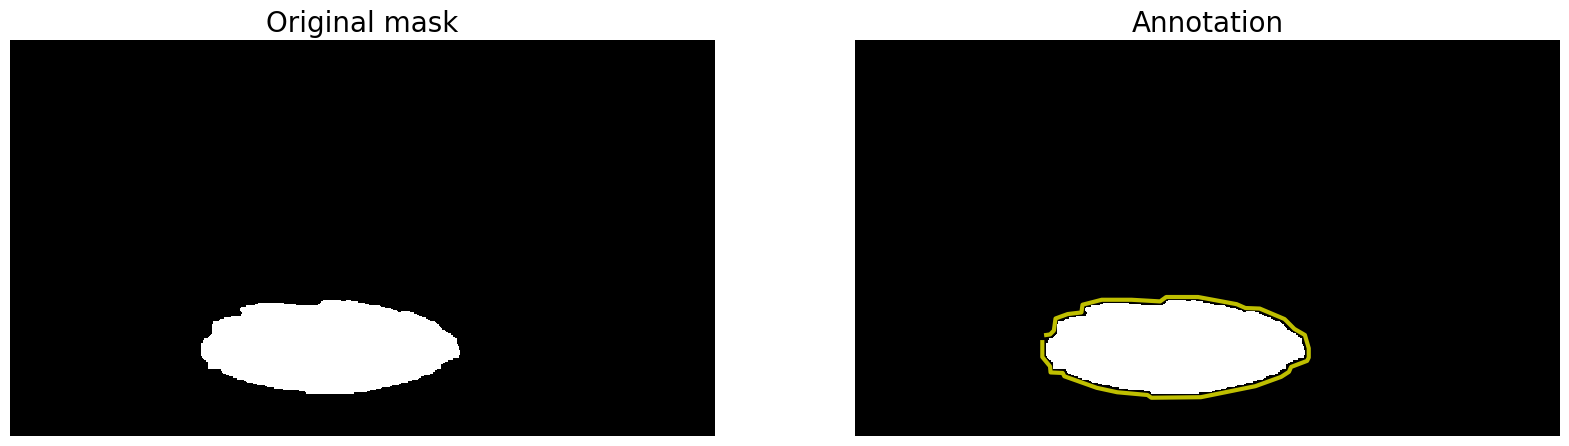

 Succesfully saved image:  food_3_colour_mask_1_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  food_3_colour_mask_2_mask.png


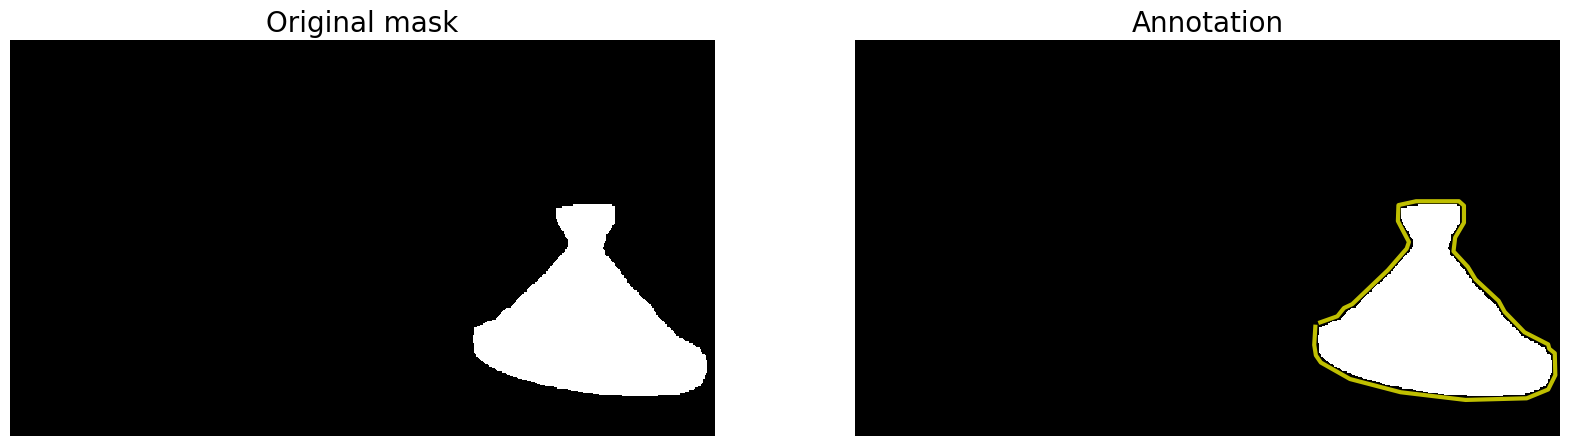

 Succesfully saved image:  food_3_colour_mask_2_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  food_3_colour_mask_5_mask.png


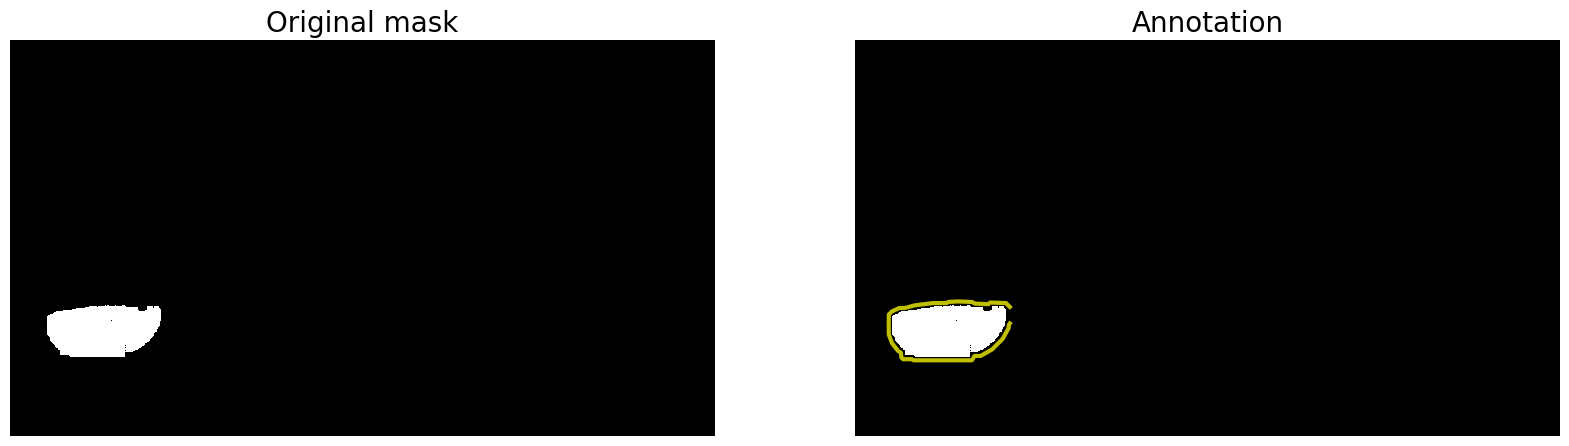

 Succesfully saved image:  food_3_colour_mask_5_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  food_oc_3_colour_mask_3_mask.png


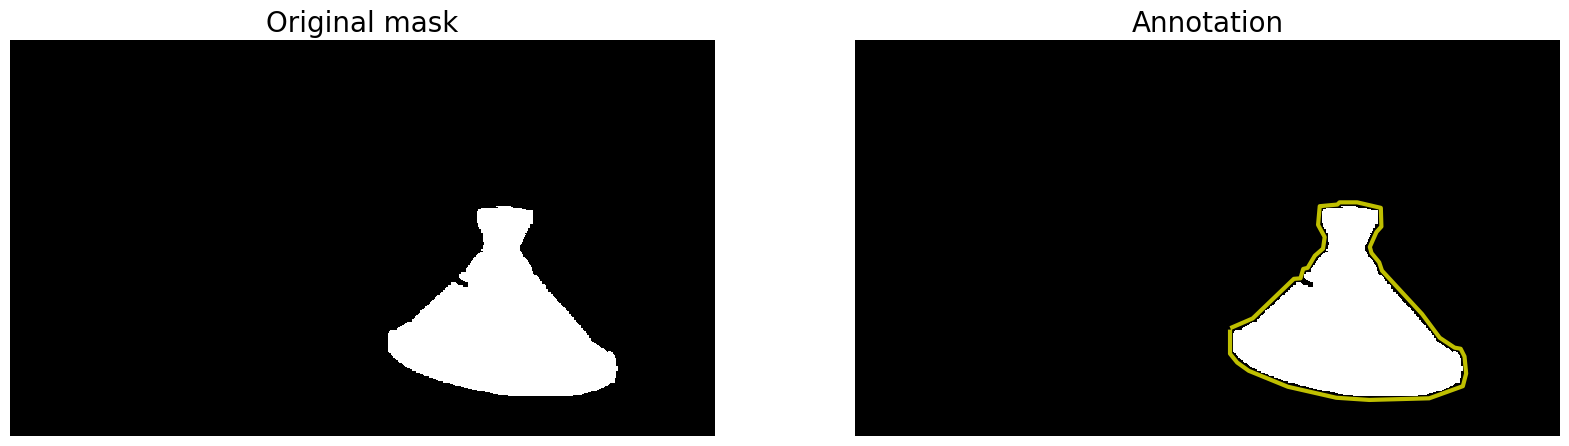

 Succesfully saved image:  food_oc_3_colour_mask_3_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  food_oc_3_colour_mask_4_mask.png


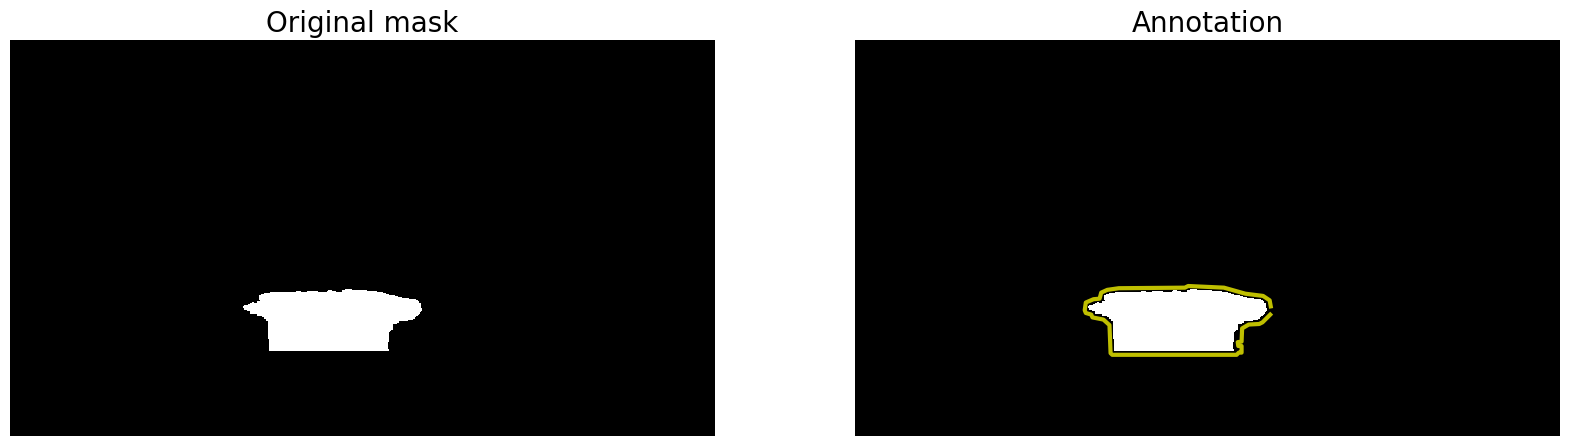

 Succesfully saved image:  food_oc_3_colour_mask_4_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  food_oc_3_colour_mask_5_mask.png


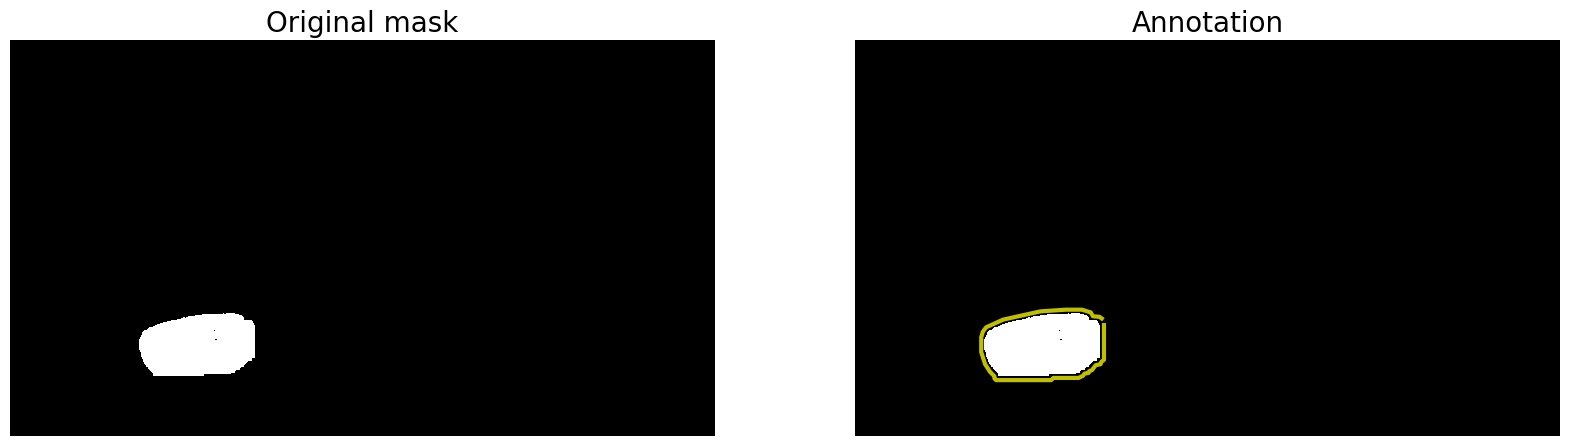

 Succesfully saved image:  food_oc_3_colour_mask_5_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  footware_no_3_colour_mask_1_mask.png


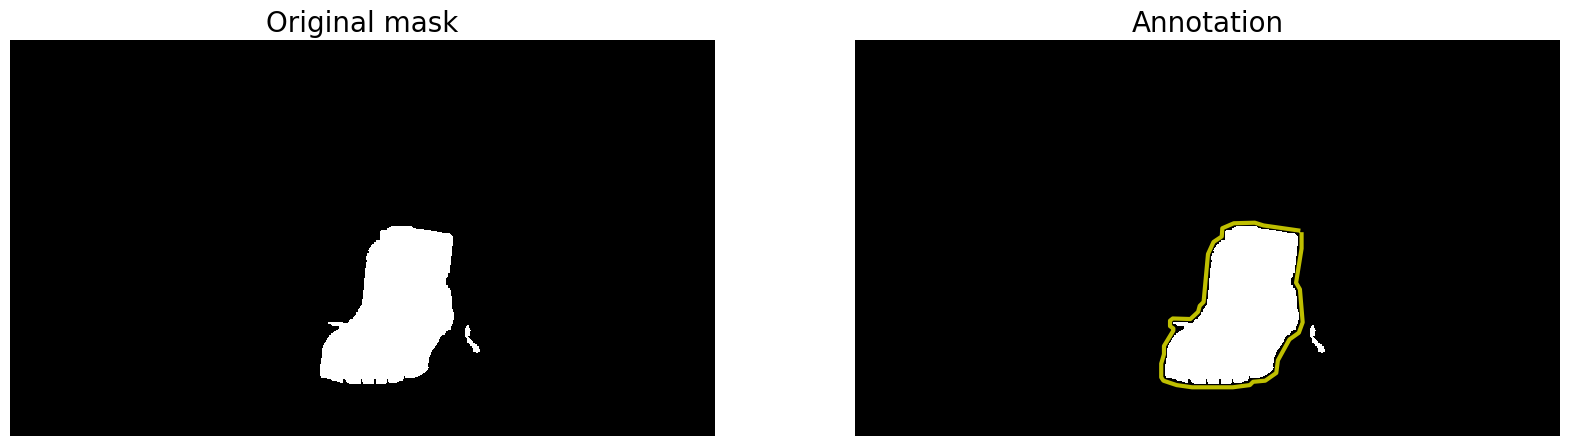

 Succesfully saved image:  footware_no_3_colour_mask_1_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  footware_no_3_colour_mask_2_mask.png


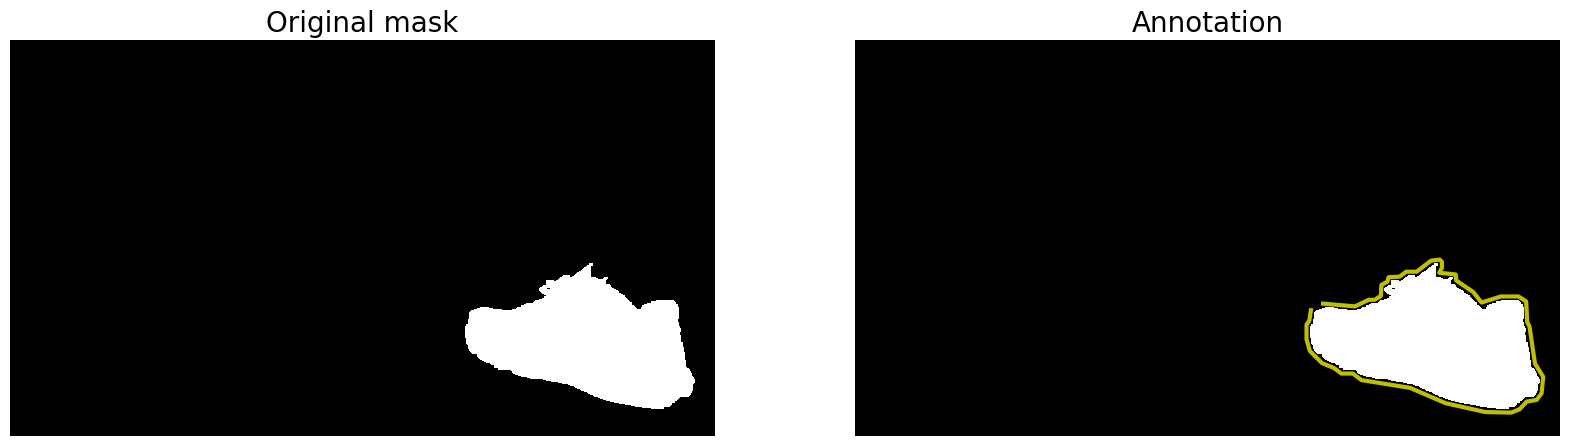

 Succesfully saved image:  footware_no_3_colour_mask_2_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  footware_no_3_colour_mask_3_mask.png


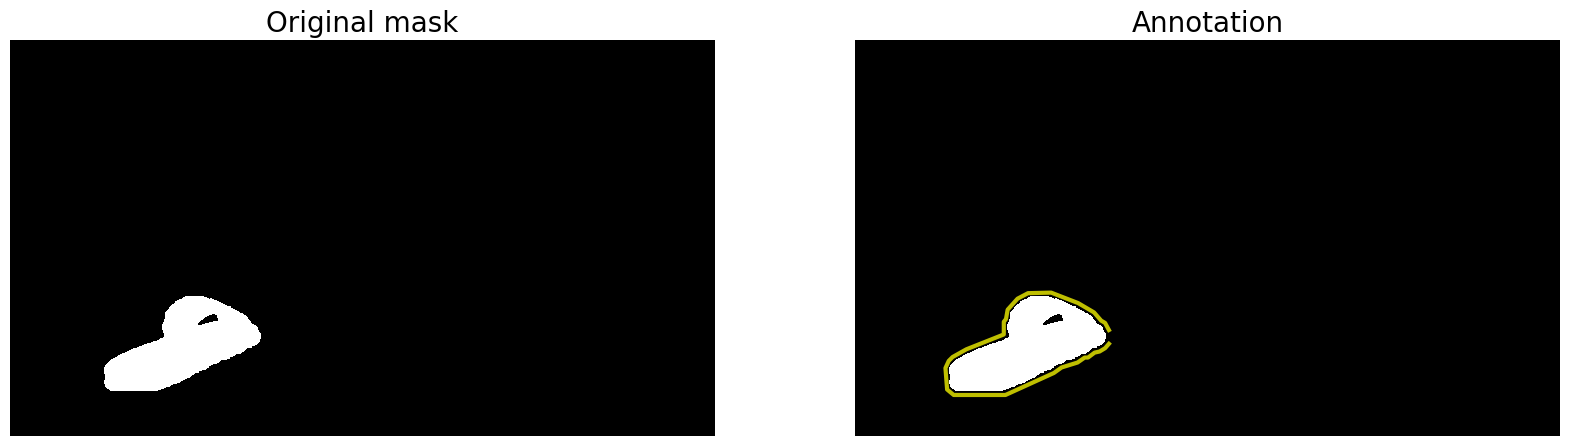

 Succesfully saved image:  footware_no_3_colour_mask_3_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  footwear_oc_3_colour_mask_0_mask.png


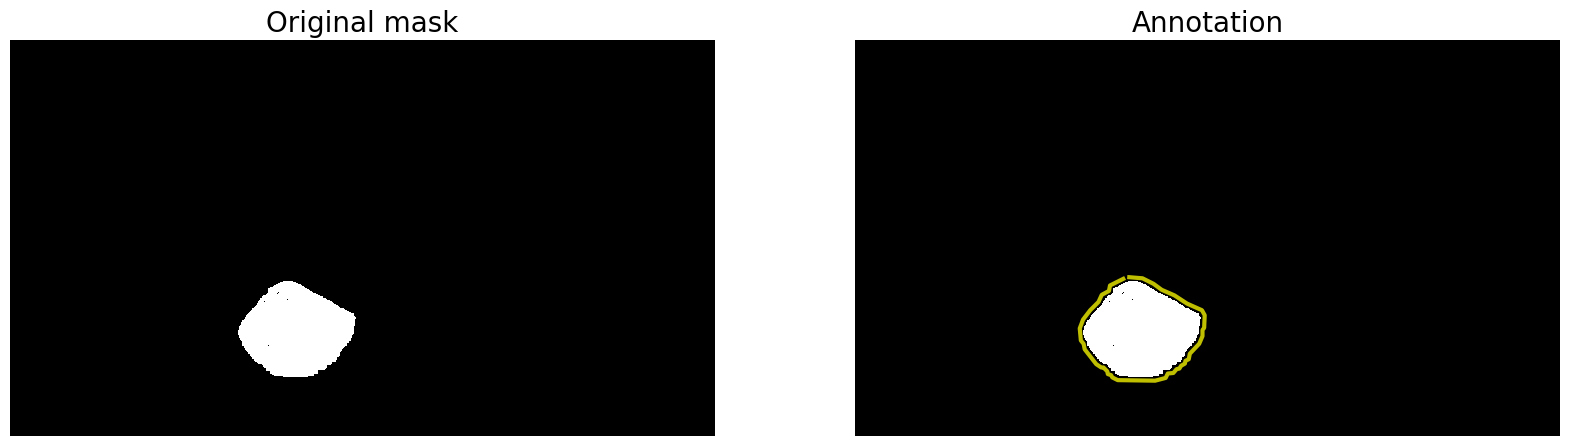

 Succesfully saved image:  footwear_oc_3_colour_mask_0_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  footwear_oc_3_colour_mask_4_mask.png


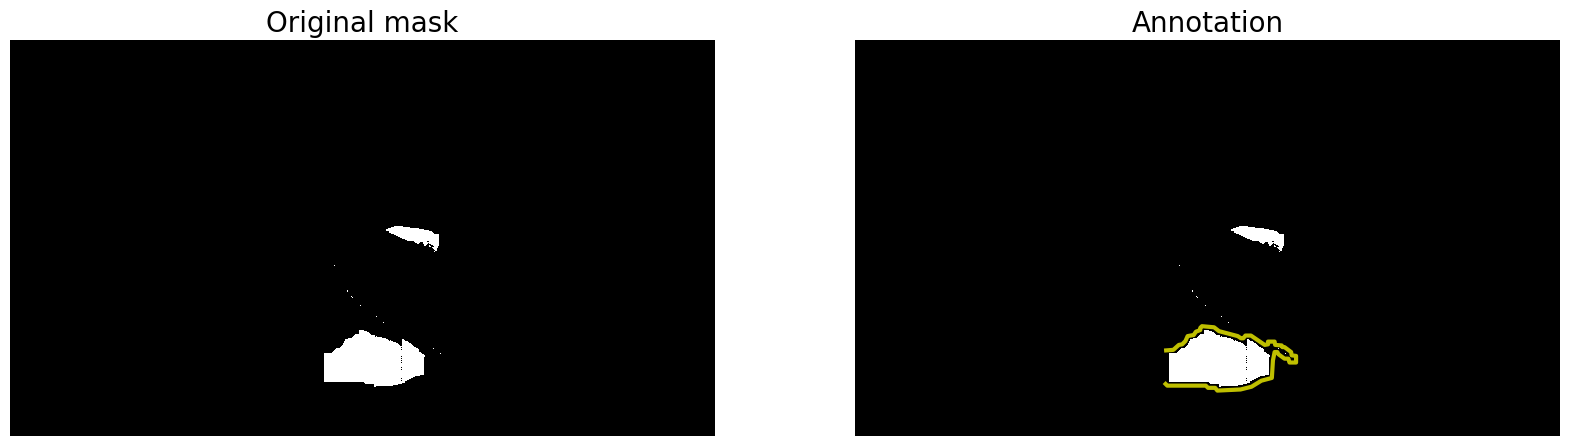

 Succesfully saved image:  footwear_oc_3_colour_mask_4_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  footwear_oc_3_colour_mask_5_mask.png


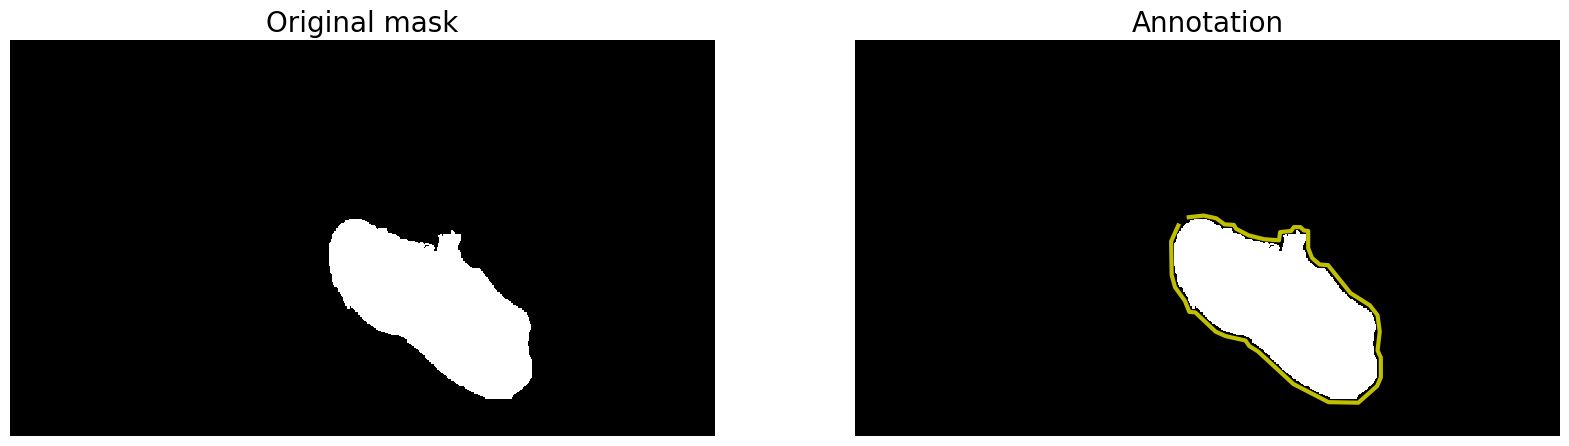

 Succesfully saved image:  footwear_oc_3_colour_mask_5_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  headgear_no_3_colour_mask_0_mask.png


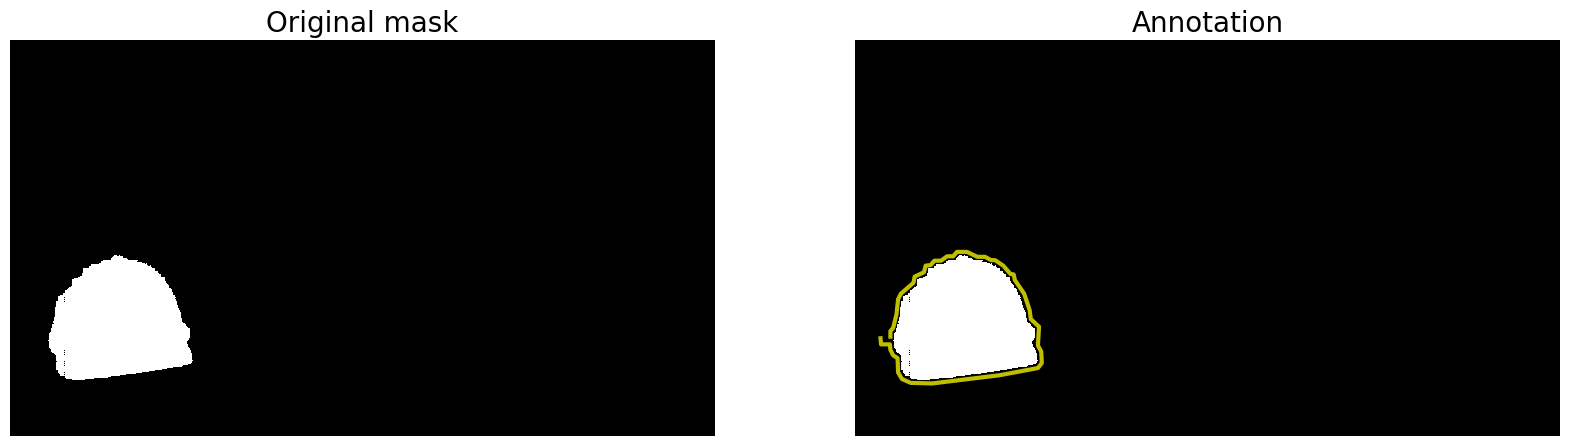

 Succesfully saved image:  headgear_no_3_colour_mask_0_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  headgear_no_3_colour_mask_1_mask.png


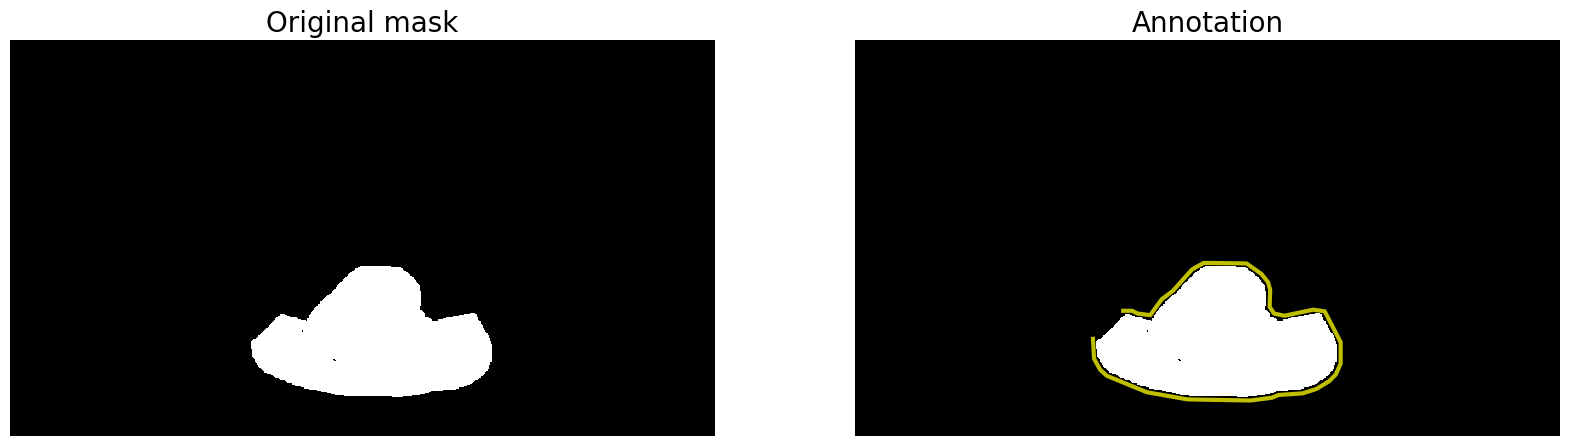

 Succesfully saved image:  headgear_no_3_colour_mask_1_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  headgear_no_3_colour_mask_3_mask.png


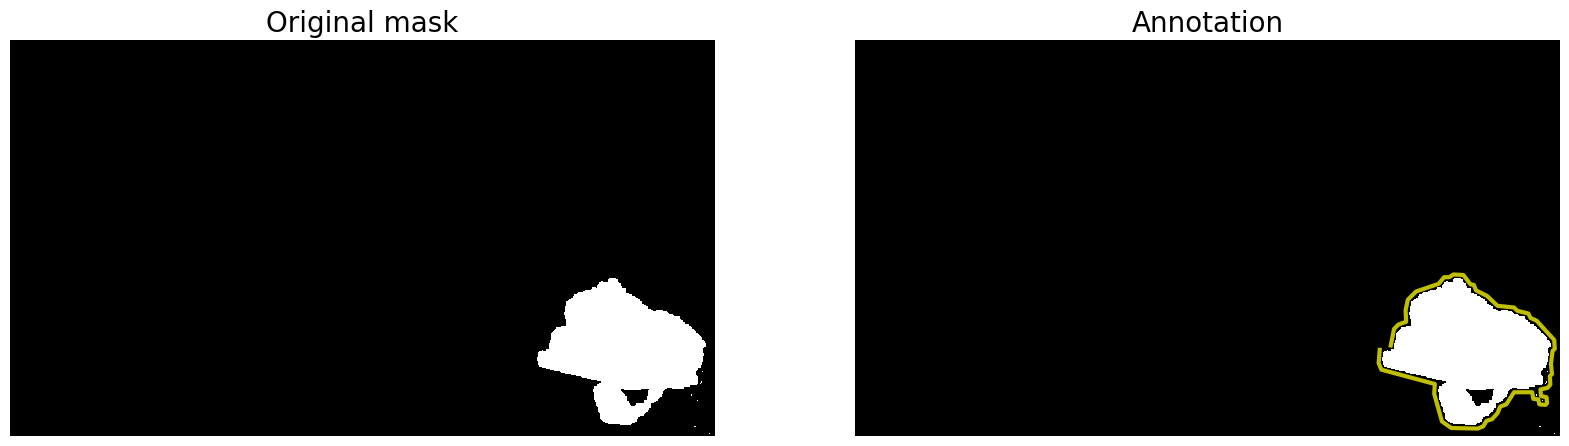

 Succesfully saved image:  headgear_no_3_colour_mask_3_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  headgear_oc_3_colour_mask_1_mask.png


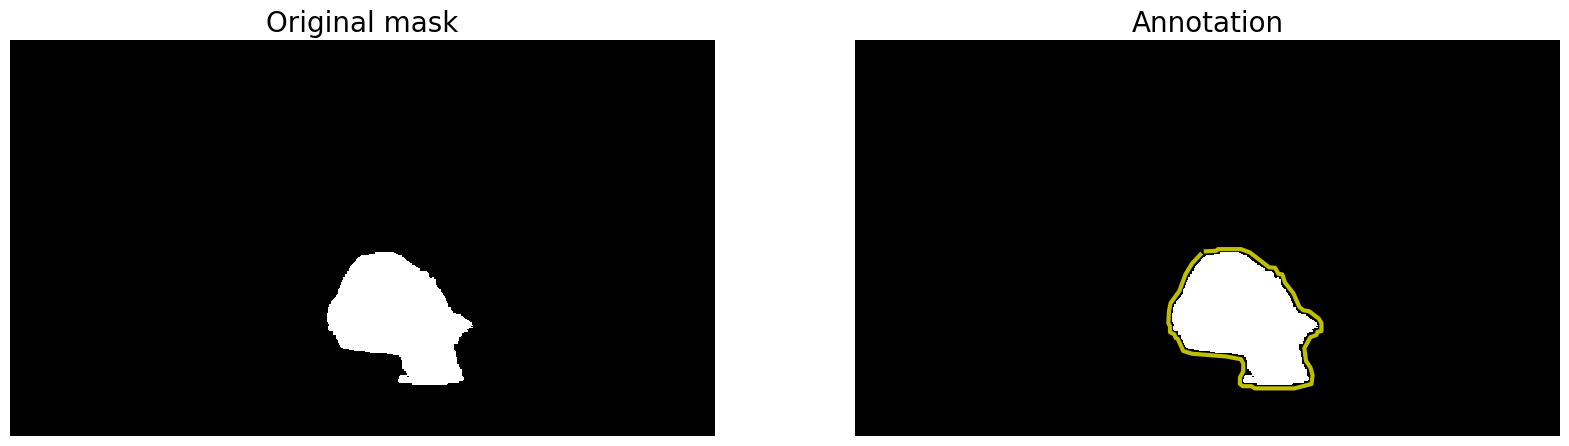

 Succesfully saved image:  headgear_oc_3_colour_mask_1_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  headgear_oc_3_colour_mask_2_mask.png


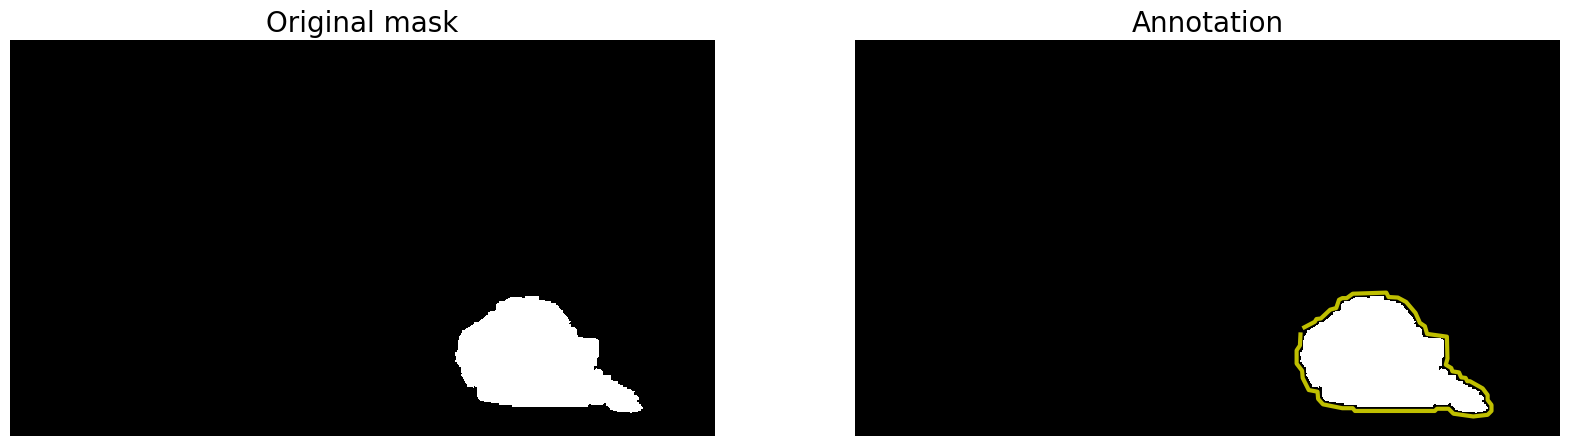

 Succesfully saved image:  headgear_oc_3_colour_mask_2_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  headgear_oc_3_colour_mask_3_mask.png


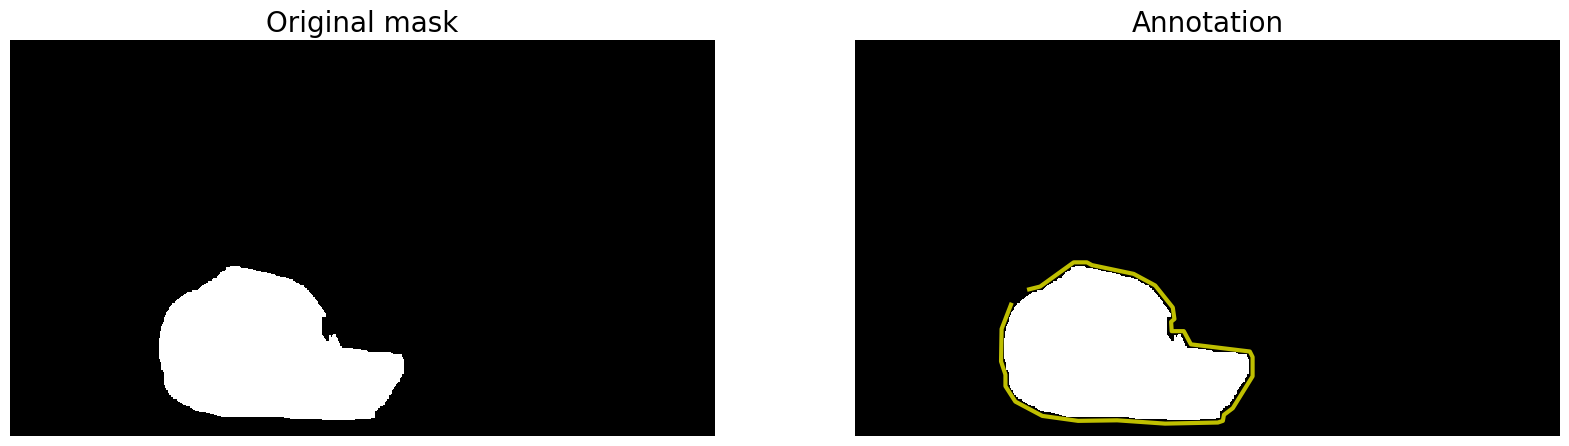

 Succesfully saved image:  headgear_oc_3_colour_mask_3_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  lpbooks_no_3_colour_mask_0_mask.png


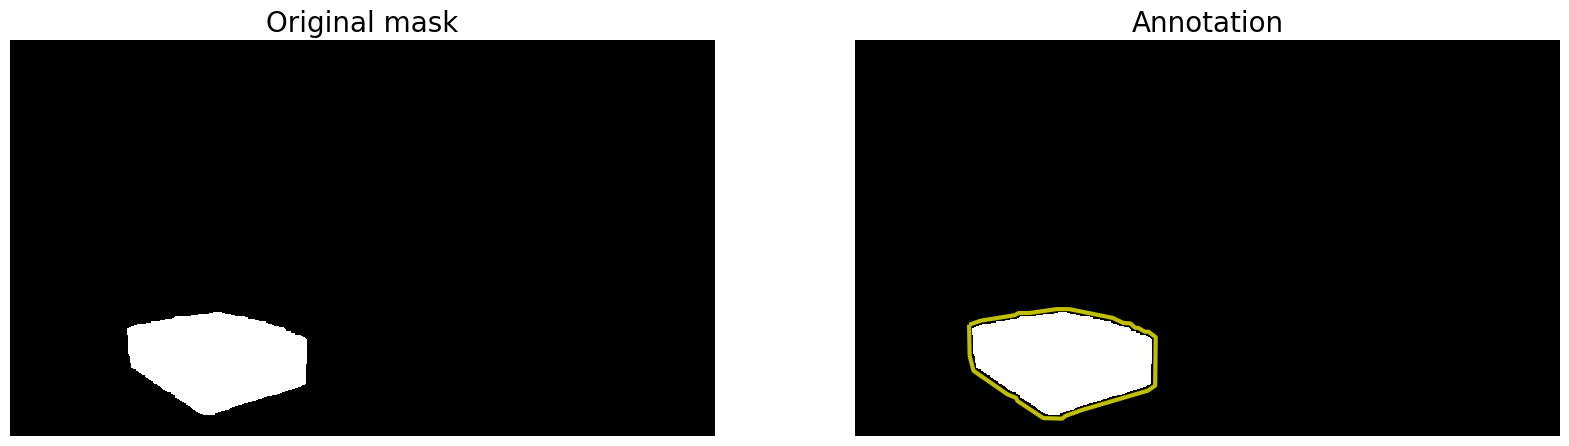

 Succesfully saved image:  lpbooks_no_3_colour_mask_0_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  lpbooks_no_3_colour_mask_1_mask.png


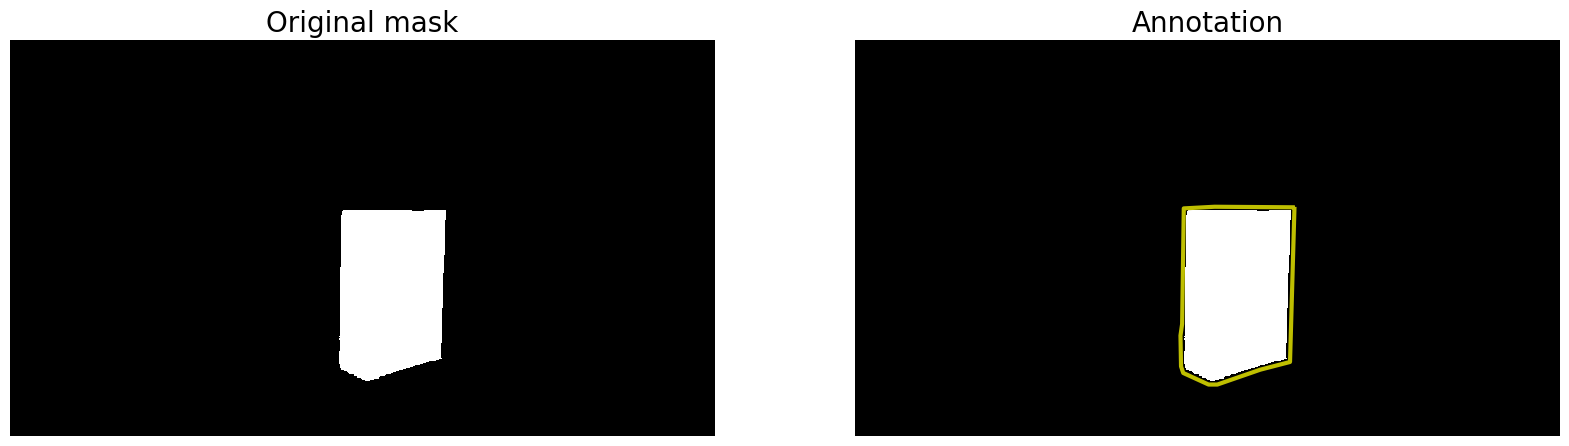

 Succesfully saved image:  lpbooks_no_3_colour_mask_1_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  lpbooks_no_3_colour_mask_2_mask.png


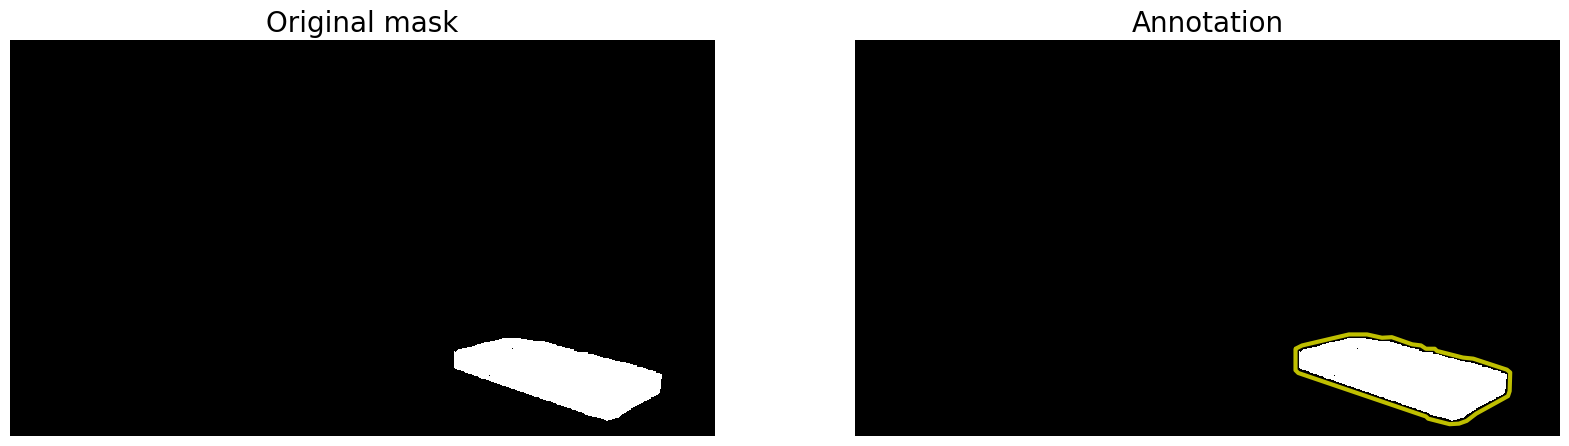

 Succesfully saved image:  lpbooks_no_3_colour_mask_2_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  lpbooks_oc_3_colour_mask_3_mask.png


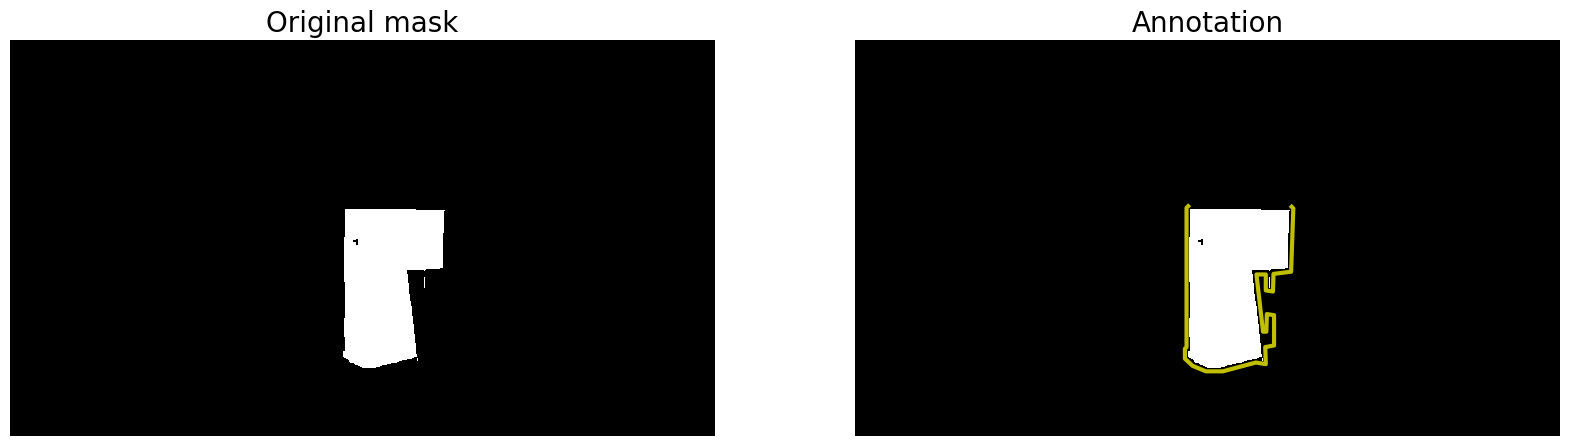

 Succesfully saved image:  lpbooks_oc_3_colour_mask_3_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  lpbooks_oc_3_colour_mask_4_mask.png


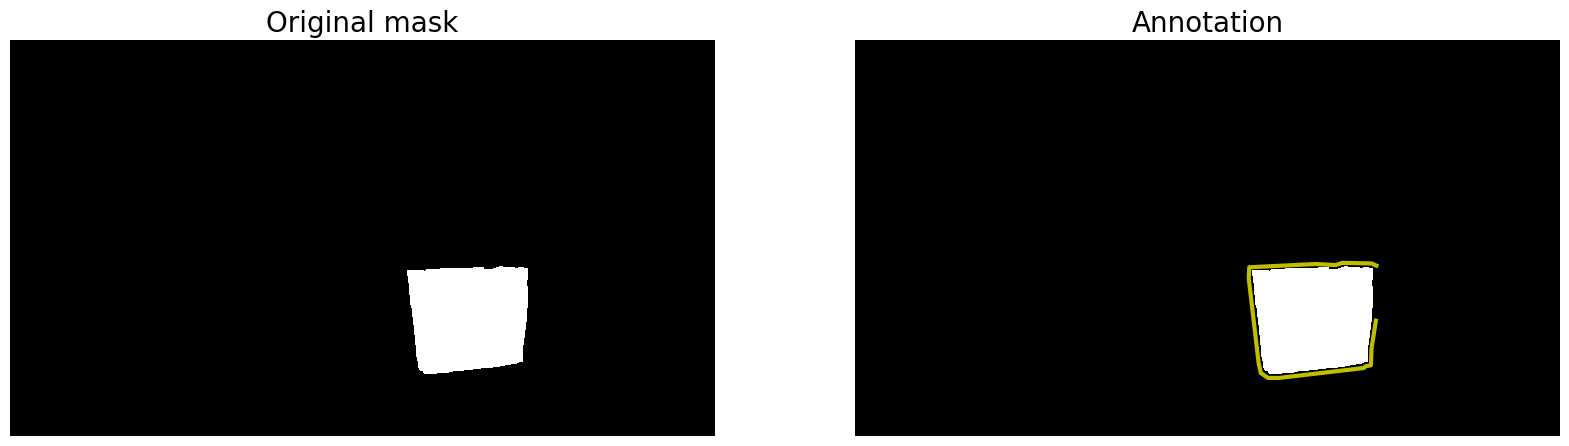

 Succesfully saved image:  lpbooks_oc_3_colour_mask_4_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  lpbooks_oc_3_colour_mask_5_mask.png


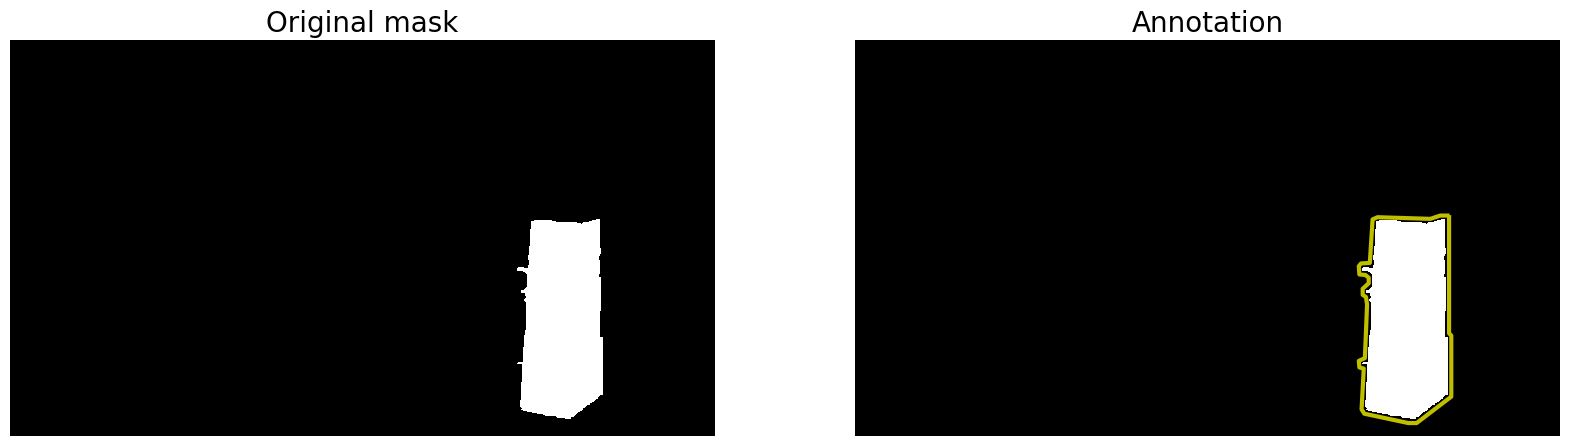

 Succesfully saved image:  lpbooks_oc_3_colour_mask_5_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  3_colour_mask_0_mask.png


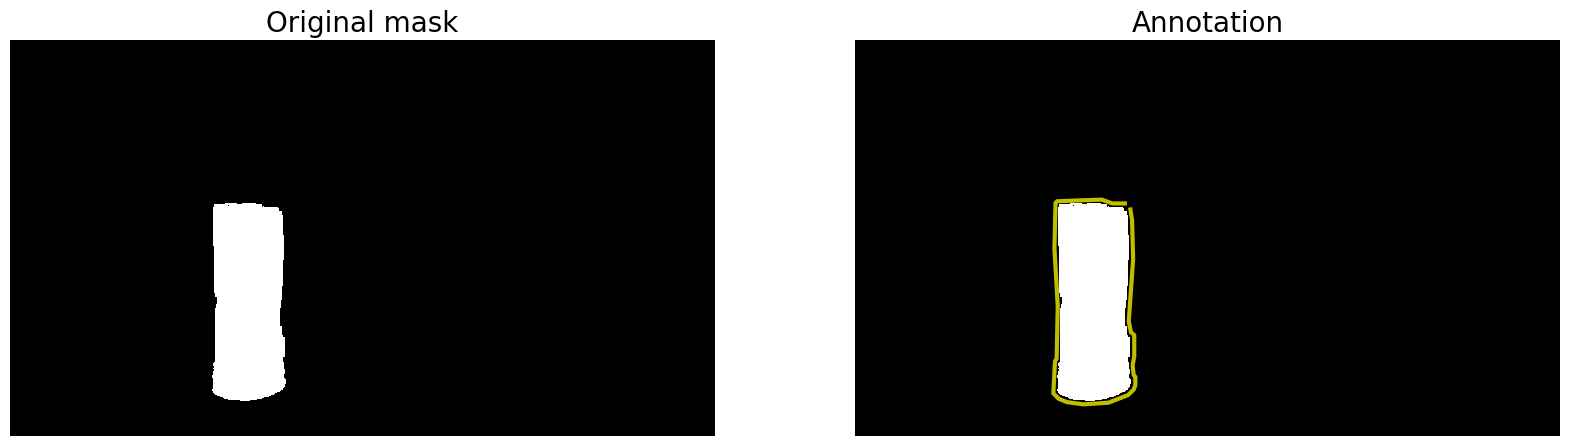

 Succesfully saved image:  3_colour_mask_0_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  3_colour_mask_1_mask_mask.png


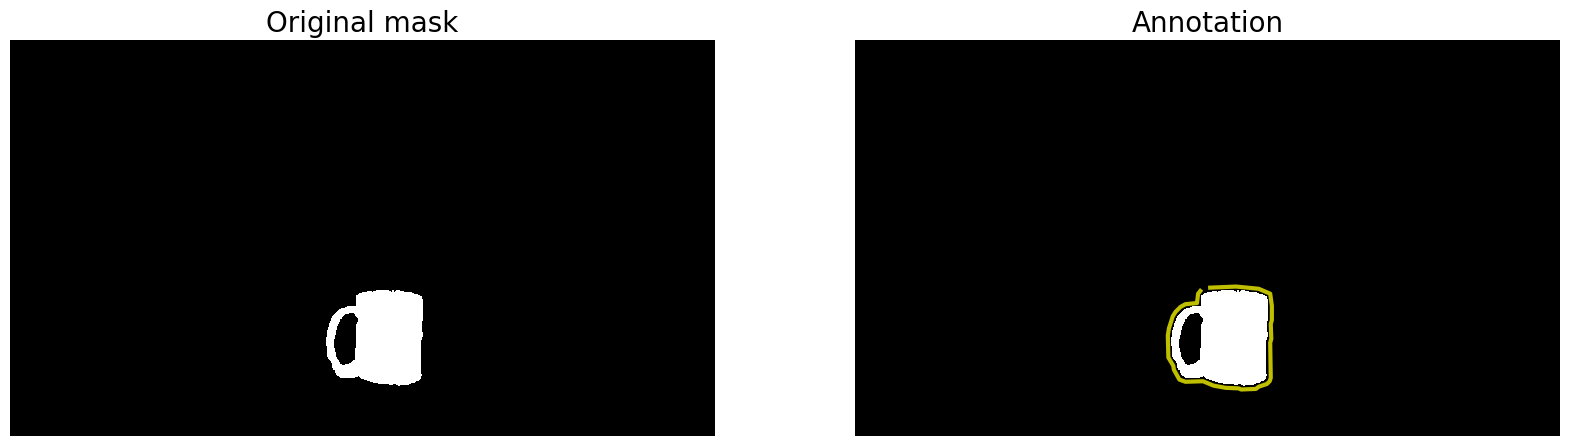

 Succesfully saved image:  3_colour_mask_1_mask_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  3_colour_mask_2_mask.png


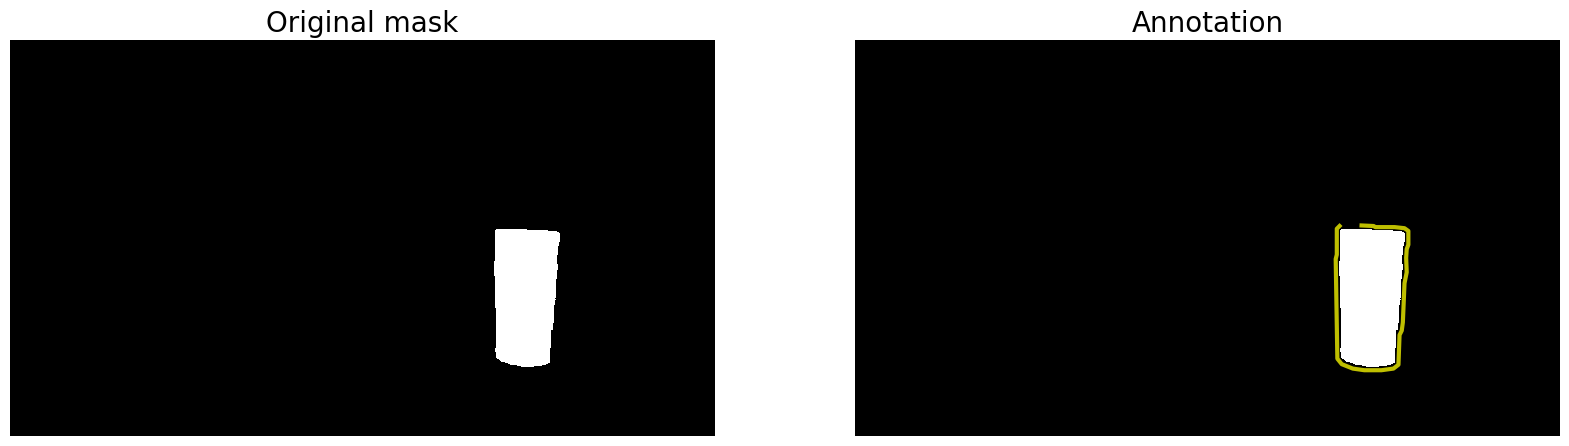

 Succesfully saved image:  3_colour_mask_2_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  mugs_oc_3_colour_mask_0_mask.png


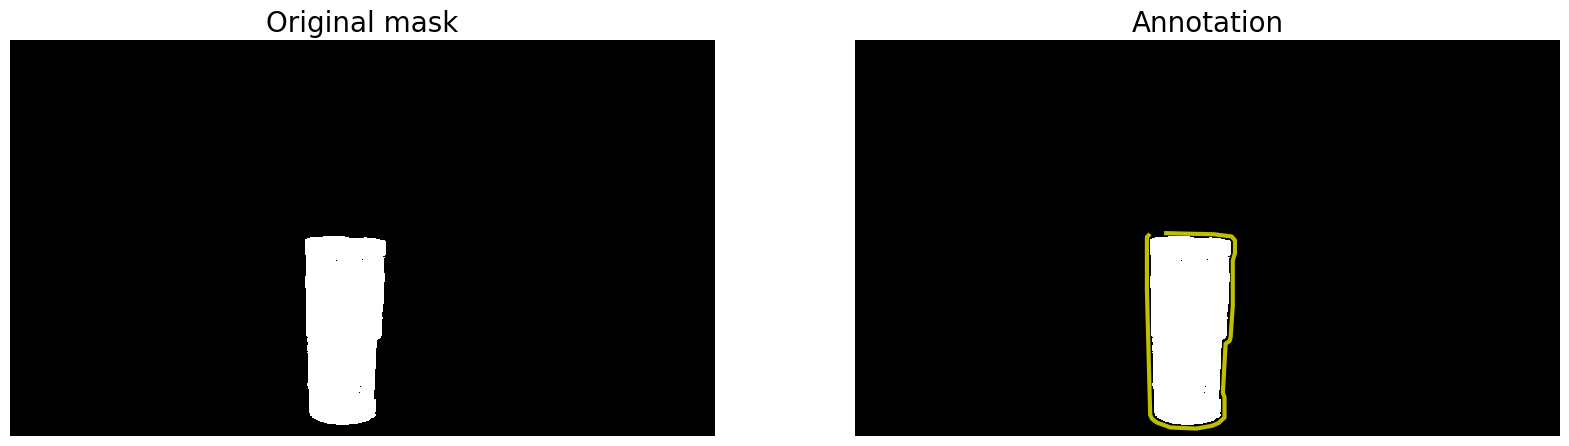

 Succesfully saved image:  mugs_oc_3_colour_mask_0_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  mugs_oc_3_colour_mask_1_mask.png


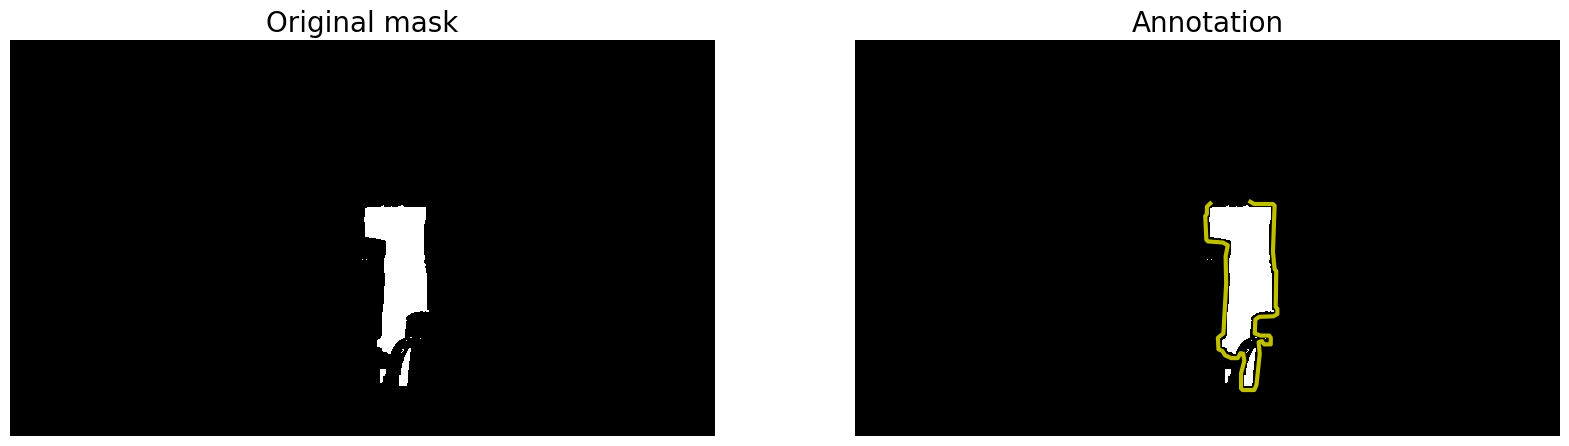

 Succesfully saved image:  mugs_oc_3_colour_mask_1_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  mugs_oc_3_colour_mask_2_mask.png


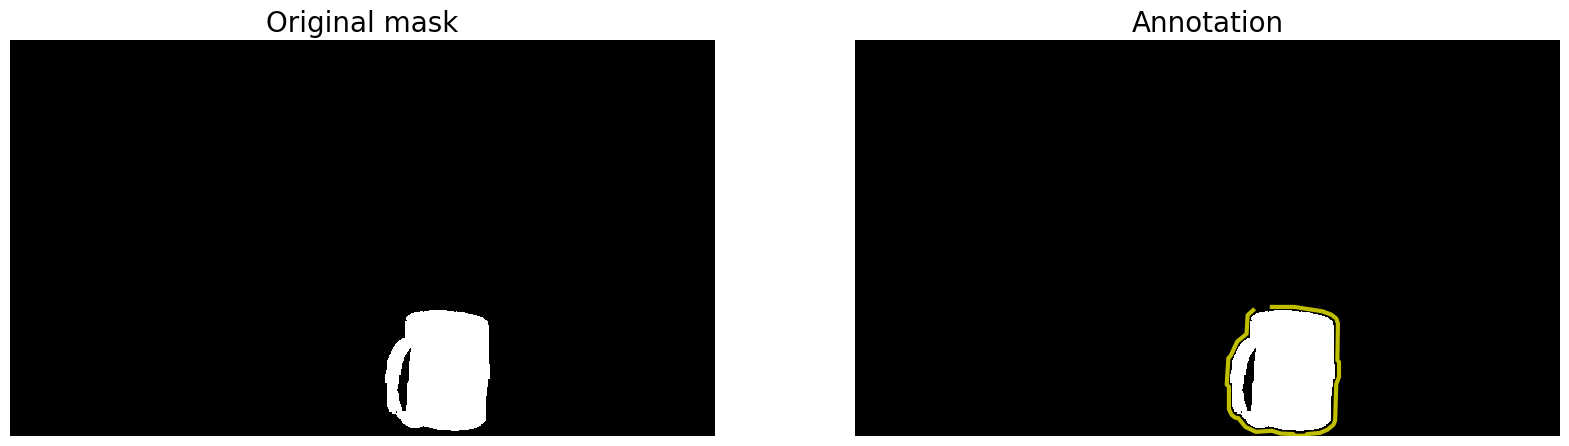

 Succesfully saved image:  mugs_oc_3_colour_mask_2_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  mugs_oc2_3_colour_mask_0_mask.png


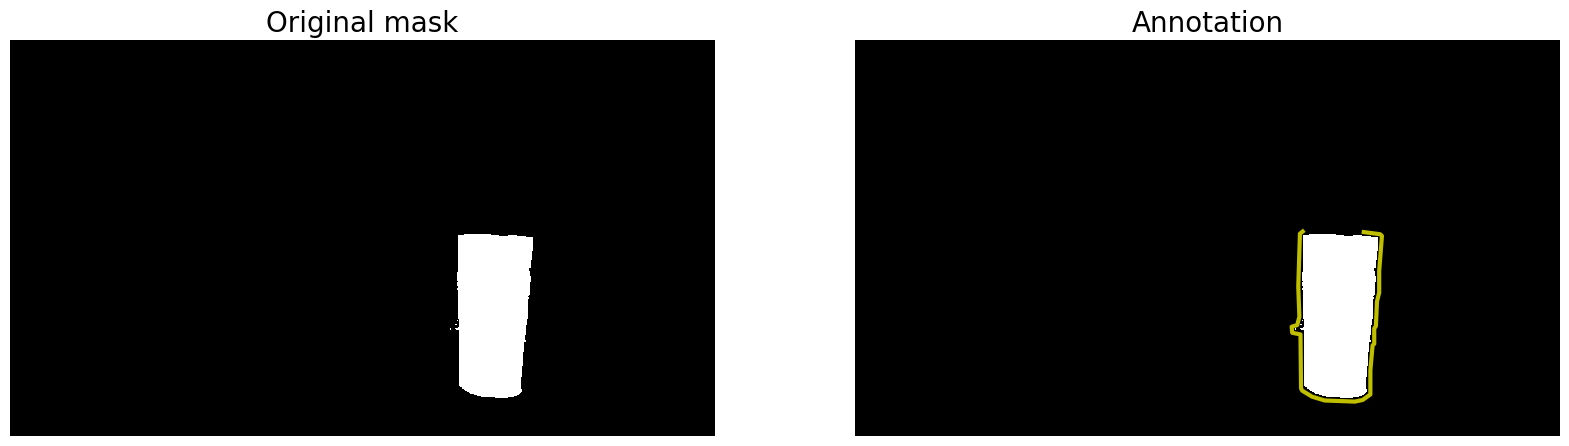

 Succesfully saved image:  mugs_oc2_3_colour_mask_0_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  mugs_oc2_3_colour_mask_1_mask.png


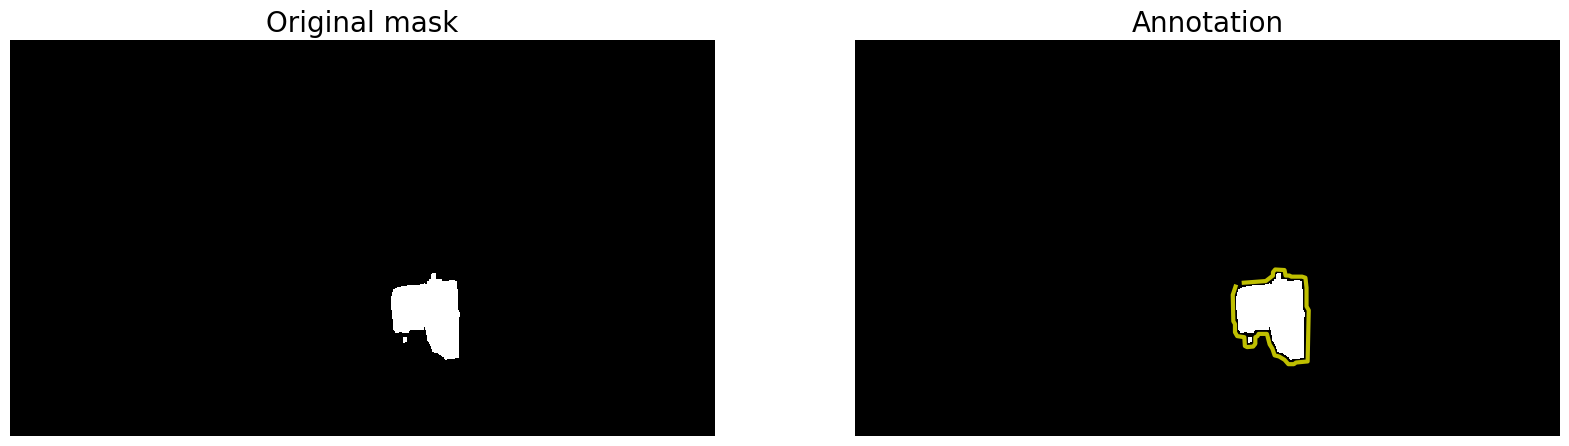

 Succesfully saved image:  mugs_oc2_3_colour_mask_1_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  mugs_oc2_3_colour_mask_2_mask.png


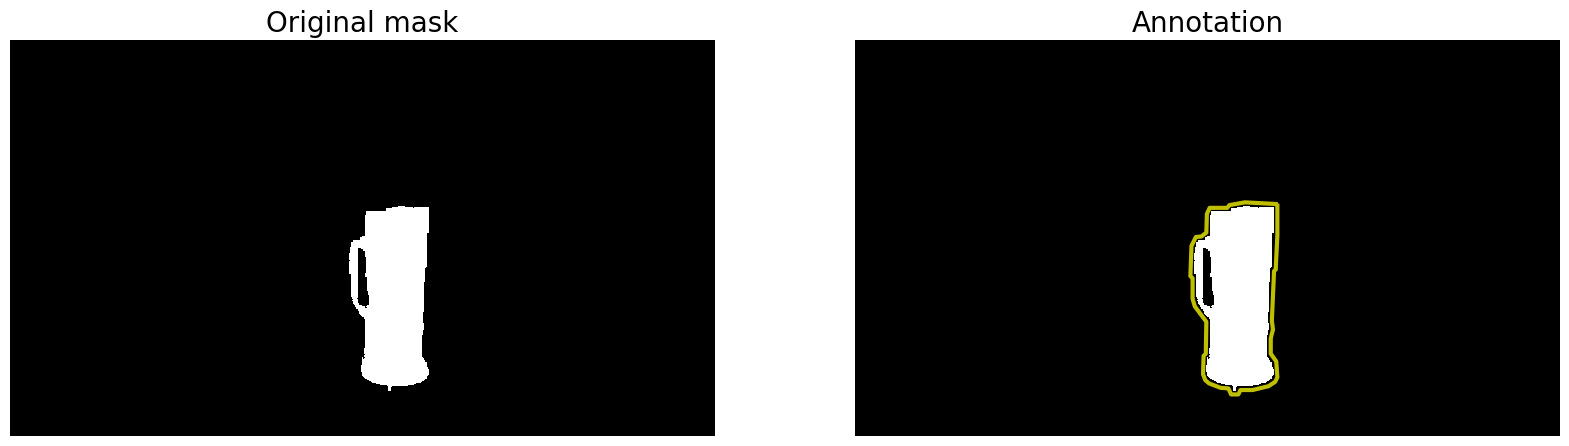

 Succesfully saved image:  mugs_oc2_3_colour_mask_2_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  reading_no_2_colour_mask_0_mask.png


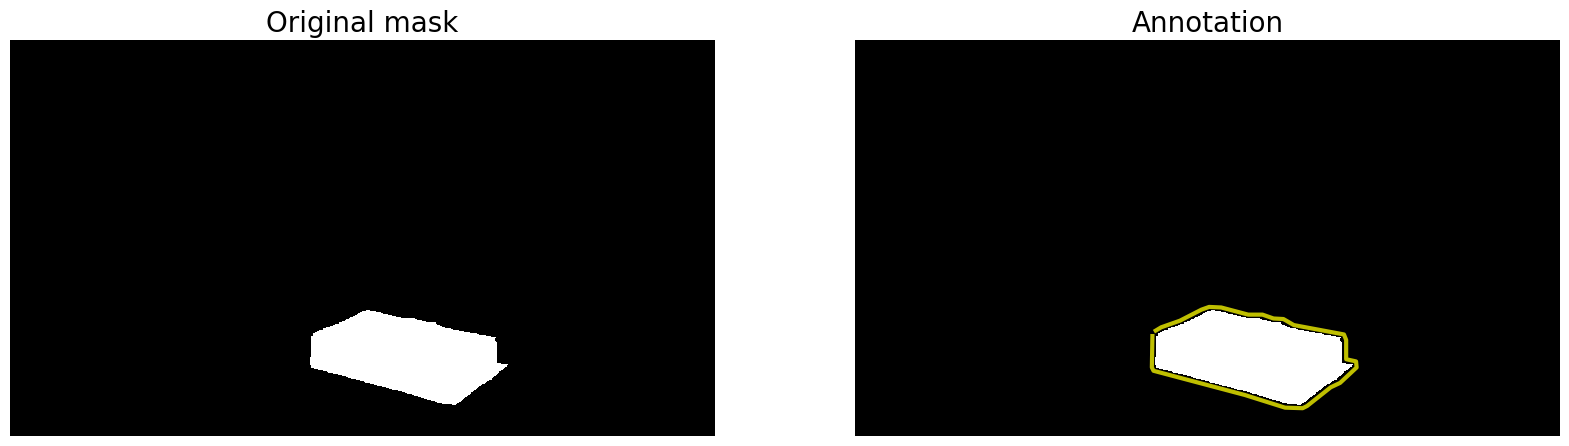

 Succesfully saved image:  reading_no_2_colour_mask_0_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  reading_no_2_colour_mask_1_mask.png


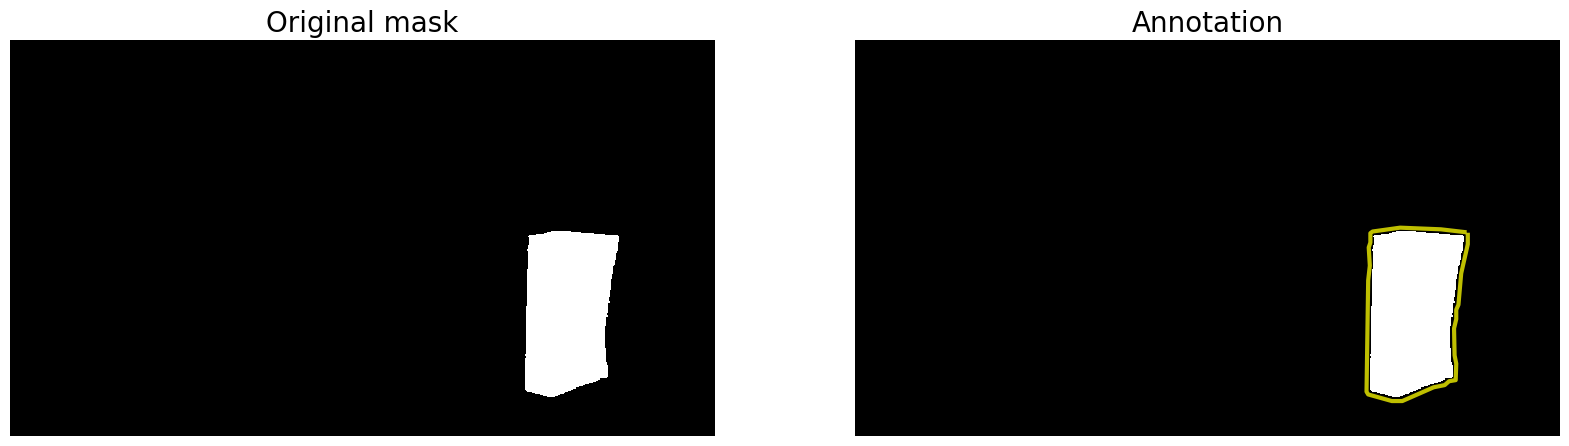

 Succesfully saved image:  reading_no_2_colour_mask_1_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  reading_oc_2_colour_mask_2_mask.png


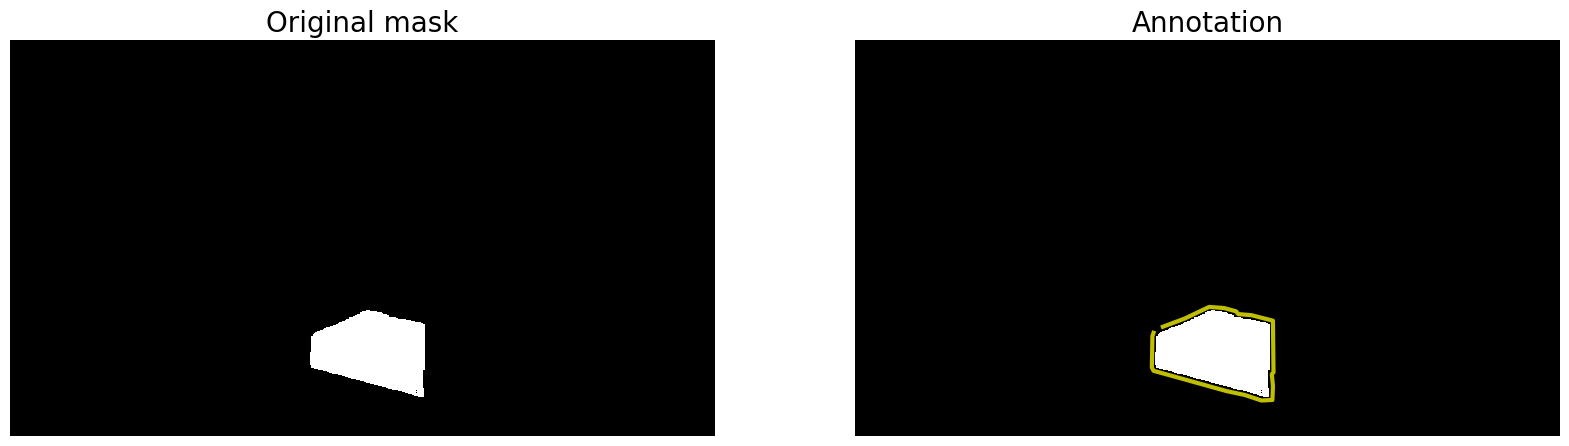

 Succesfully saved image:  reading_oc_2_colour_mask_2_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  reading_oc_2_colour_mask_3_mask.png


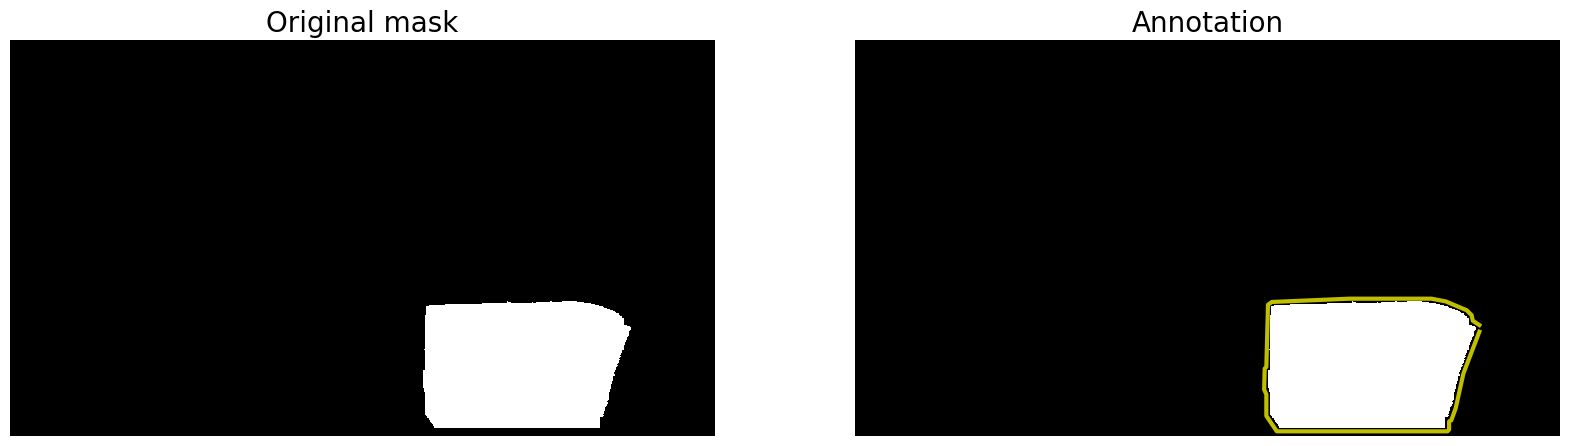

 Succesfully saved image:  reading_oc_2_colour_mask_3_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  shooters_no_3_colour_mask_1_mask.png


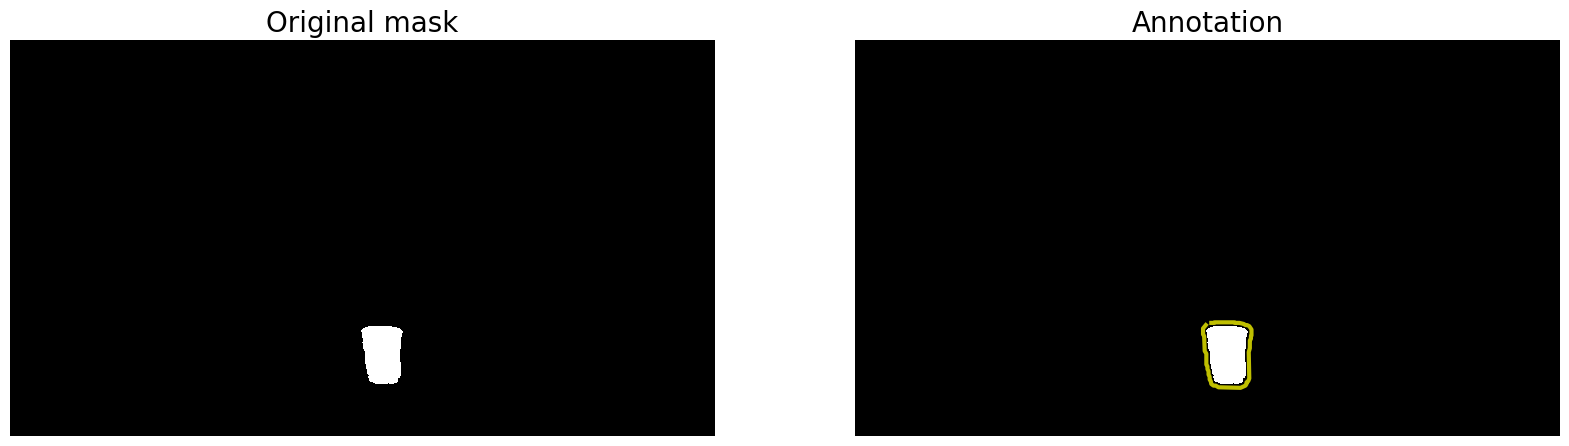

 Succesfully saved image:  shooters_no_3_colour_mask_1_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  shooters_no_3_colour_mask_2_mask.png


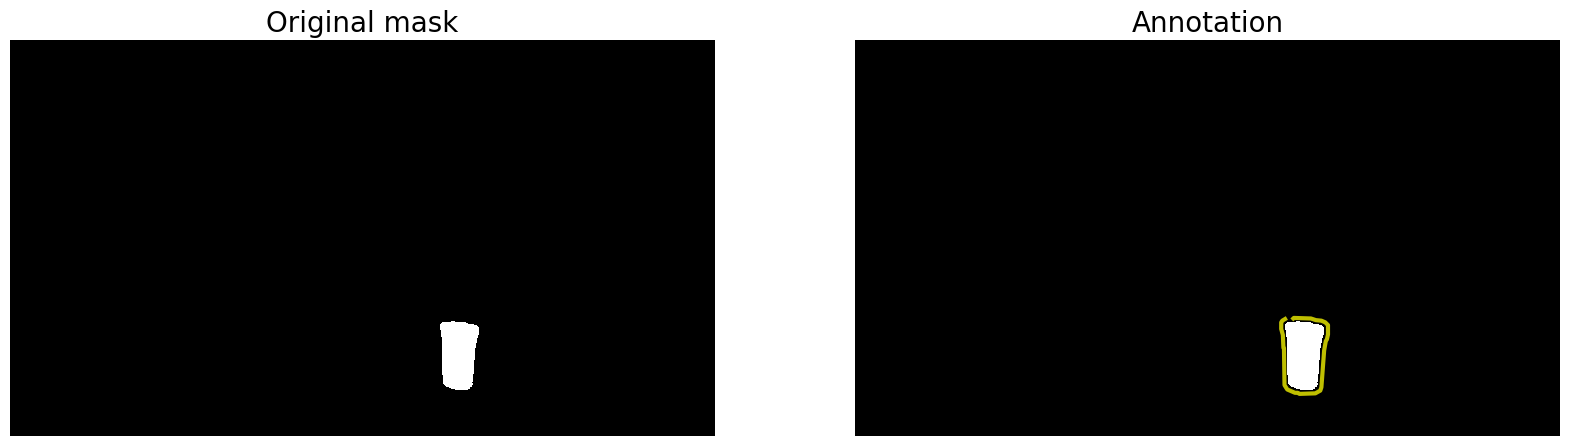

 Succesfully saved image:  shooters_no_3_colour_mask_2_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  shooters_no_3_colour_mask_3_mask.png


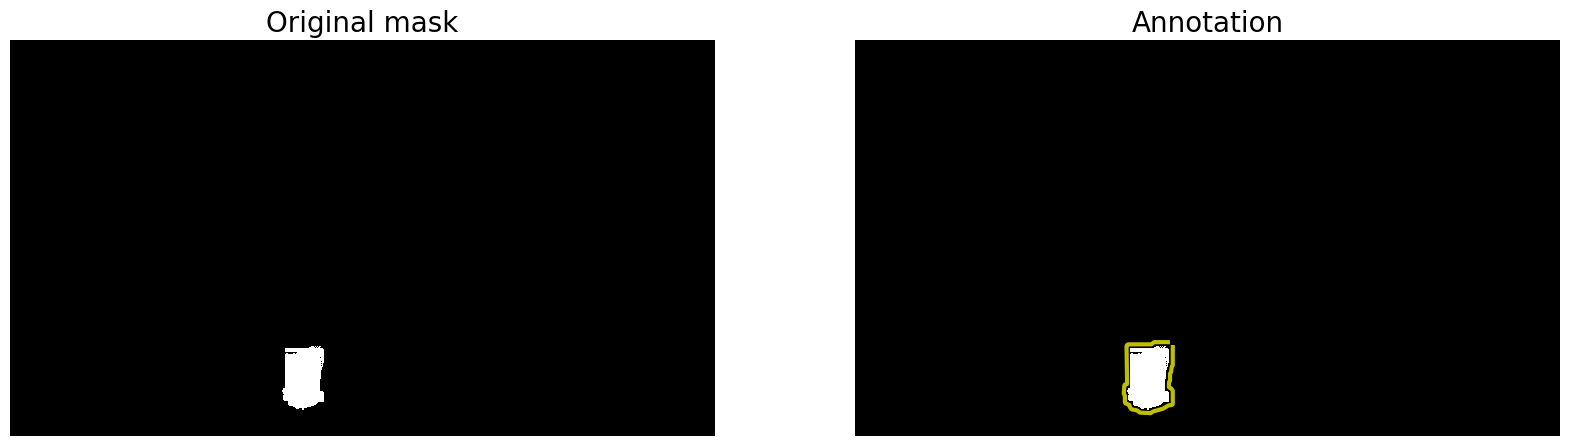

 Succesfully saved image:  shooters_no_3_colour_mask_3_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  shooters_oc_3_colour_mask_0_mask.png


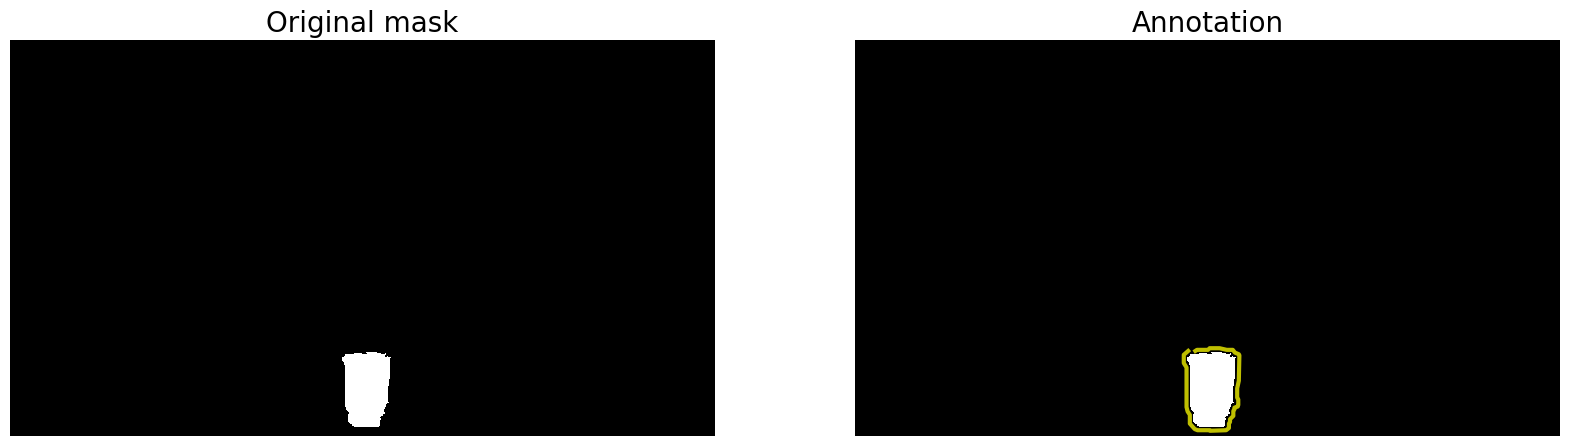

 Succesfully saved image:  shooters_oc_3_colour_mask_0_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  shooters_oc_3_colour_mask_1_mask.png


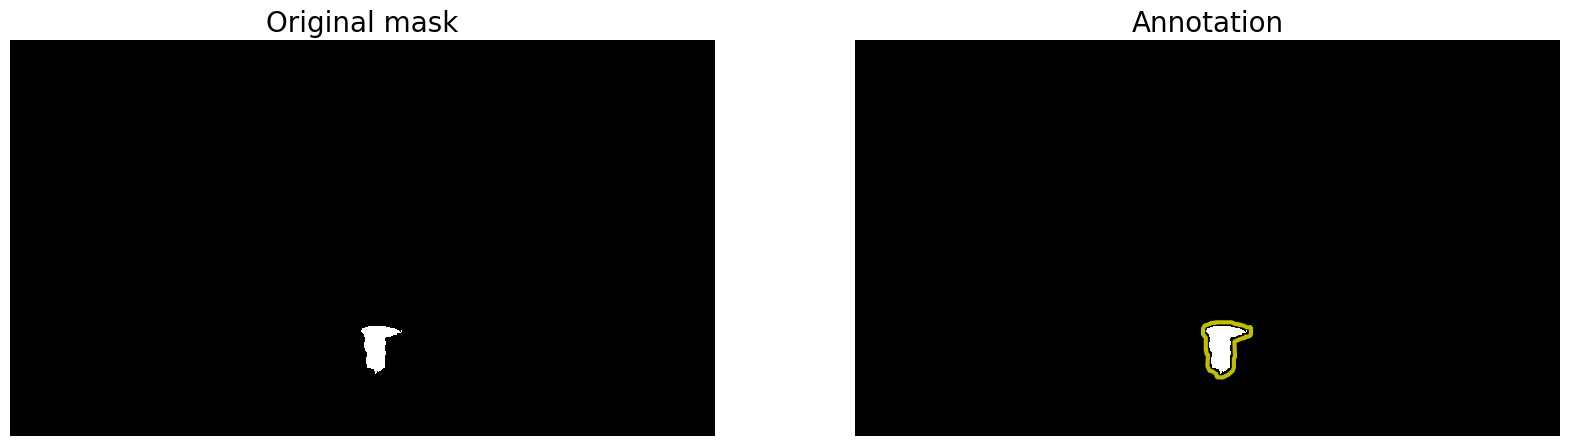

 Succesfully saved image:  shooters_oc_3_colour_mask_1_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  shooters_oc_3_colour_mask_2_mask.png


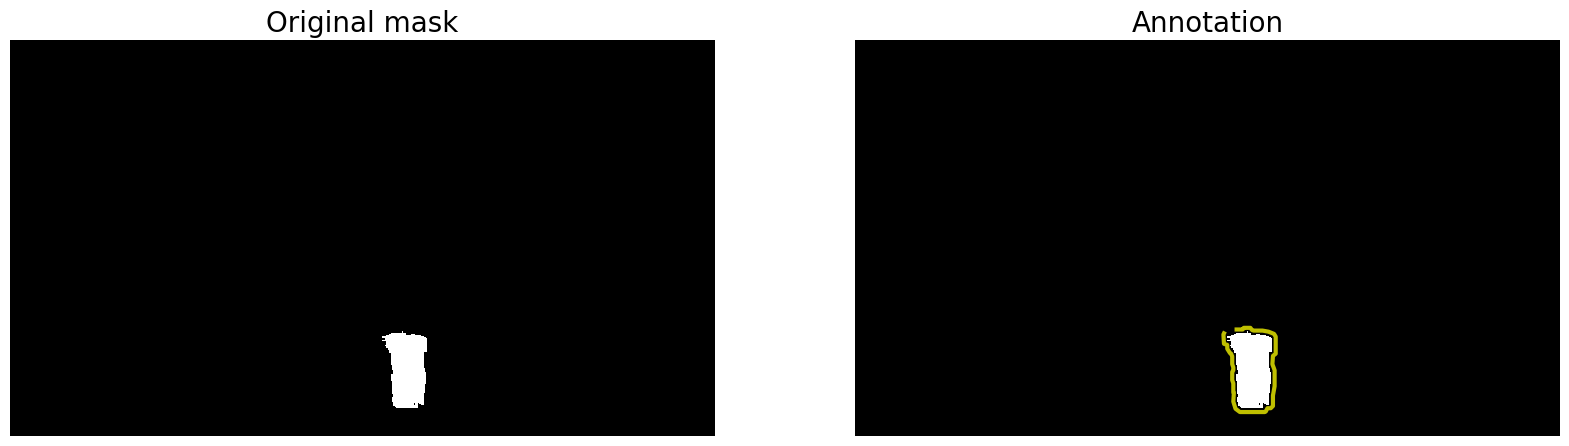

 Succesfully saved image:  shooters_oc_3_colour_mask_2_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  souvenirs_no_3_colour_mask_1_mask.png


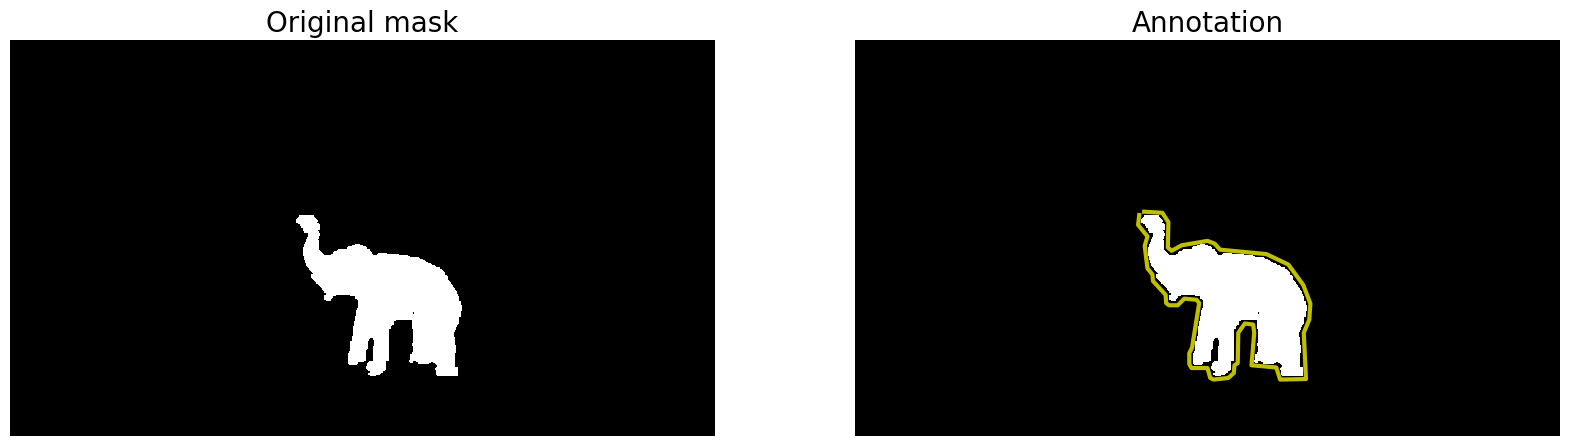

 Succesfully saved image:  souvenirs_no_3_colour_mask_1_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  souvenirs_no_3_colour_mask_2_mask.png


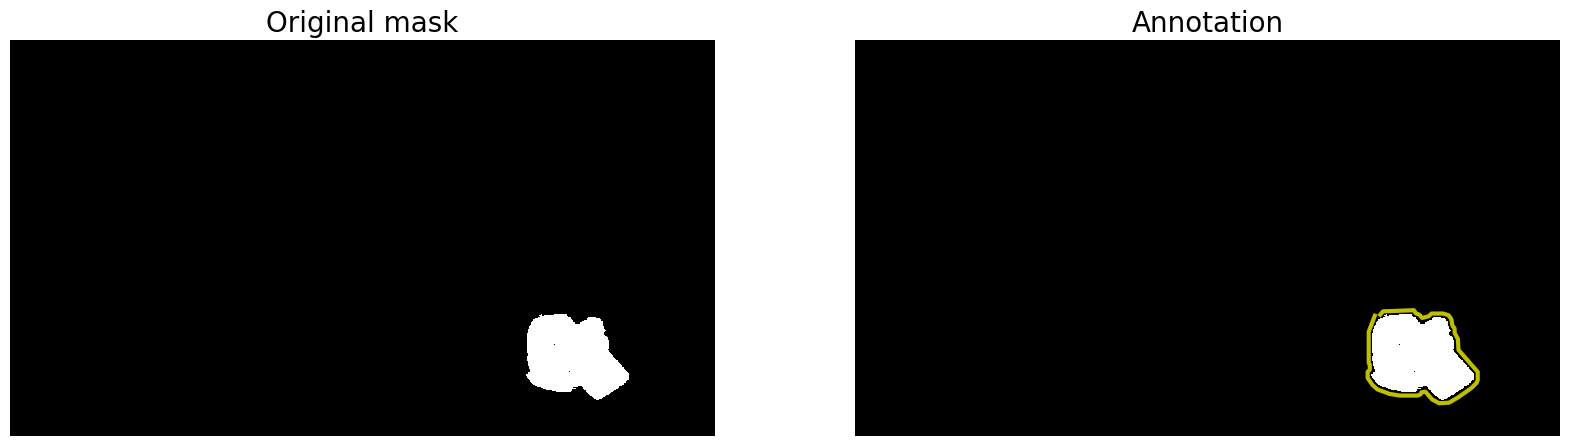

 Succesfully saved image:  souvenirs_no_3_colour_mask_2_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  souvenirs_no_3_colour_mask_3_mask.png


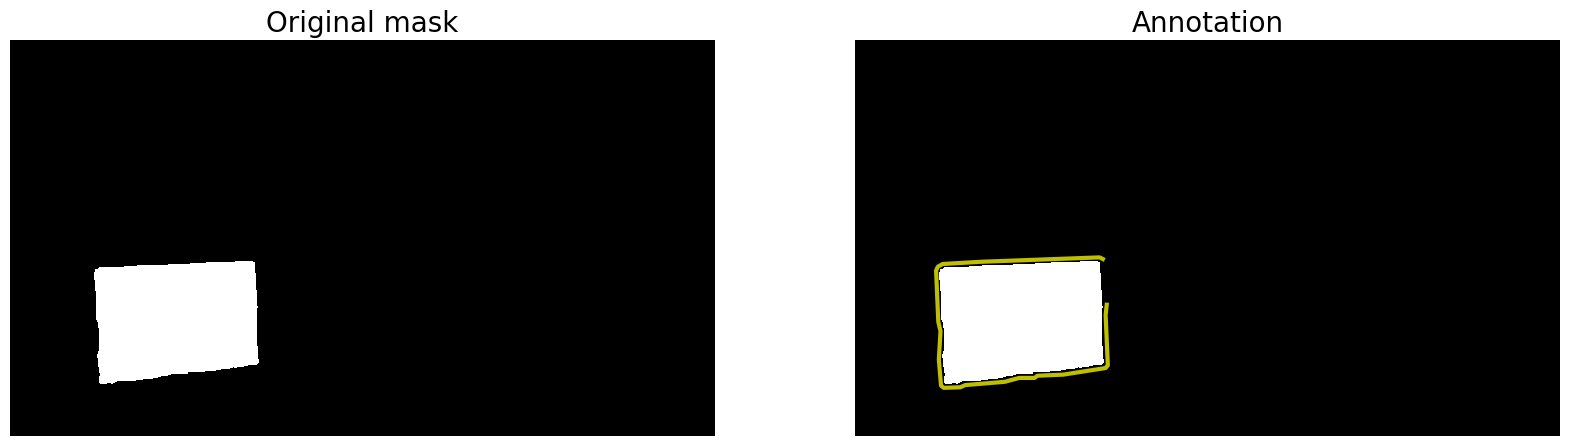

 Succesfully saved image:  souvenirs_no_3_colour_mask_3_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  souveniers_oc_3_colour_mask_0_mask.png


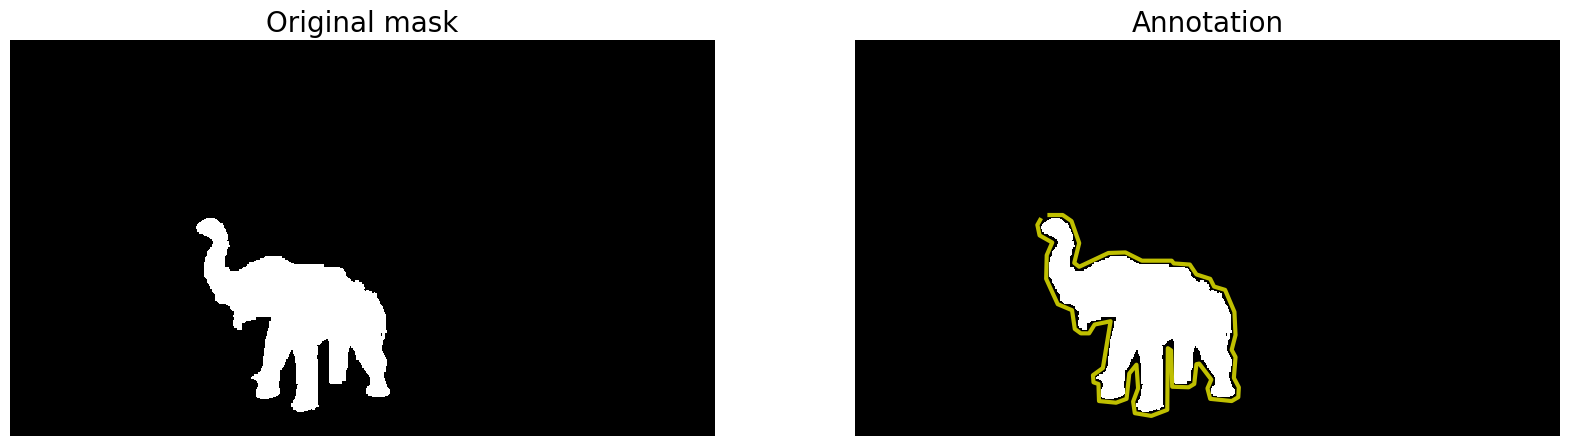

 Succesfully saved image:  souveniers_oc_3_colour_mask_0_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  souveniers_oc_3_colour_mask_1_mask.png


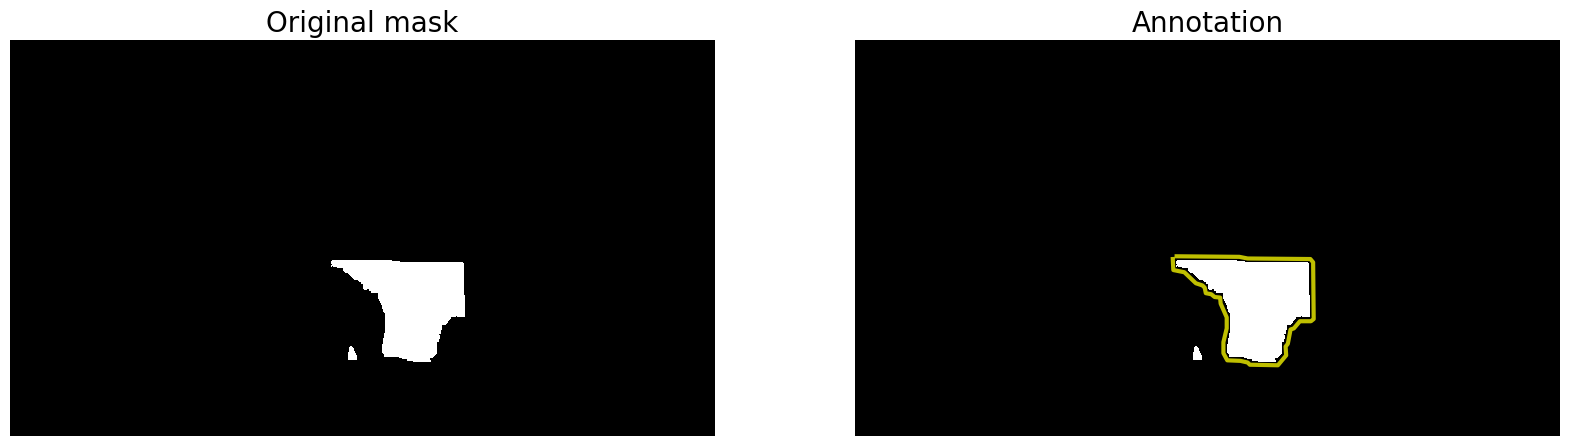

 Succesfully saved image:  souveniers_oc_3_colour_mask_1_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  souveniers_oc_3_colour_mask_2_mask.png


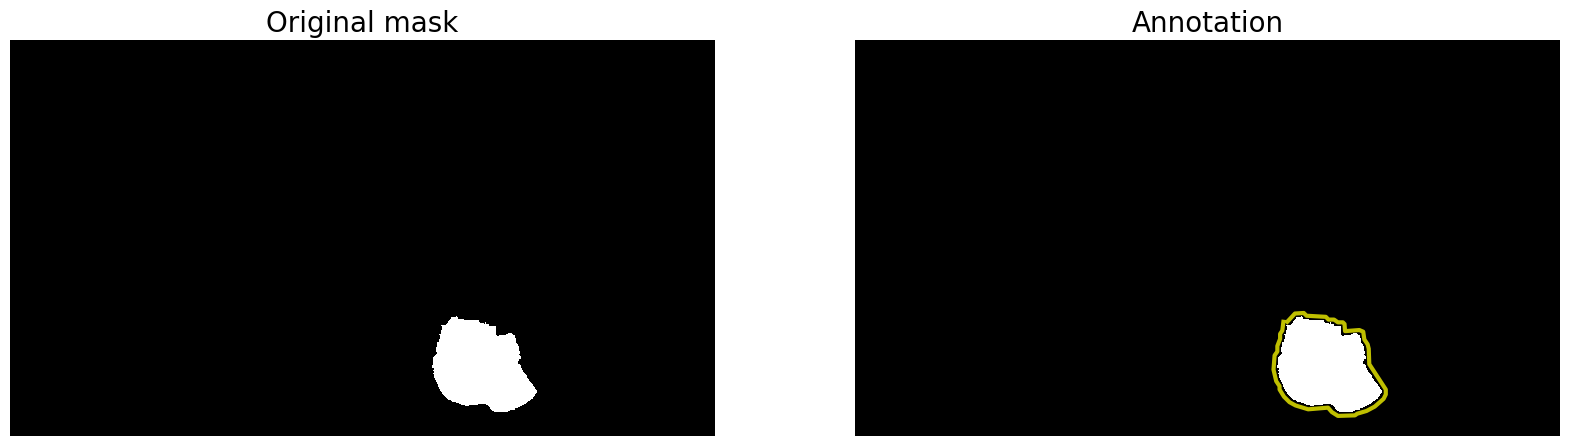

 Succesfully saved image:  souveniers_oc_3_colour_mask_2_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  statues_no_3_colour_mask_0_mask.png


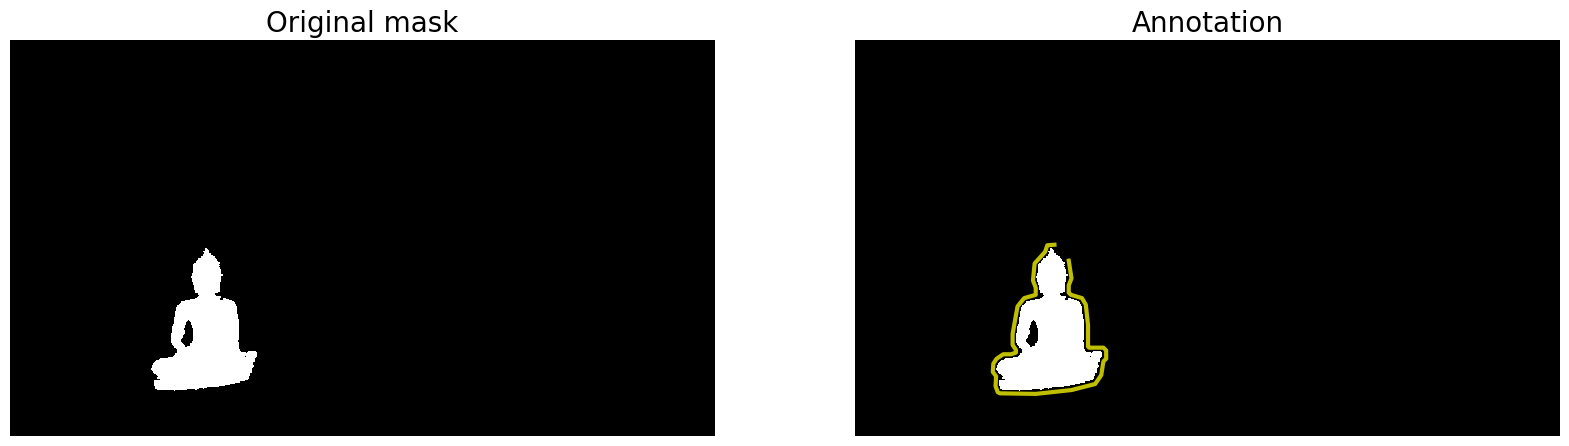

 Succesfully saved image:  statues_no_3_colour_mask_0_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  statues_no_3_colour_mask_1_mask.png


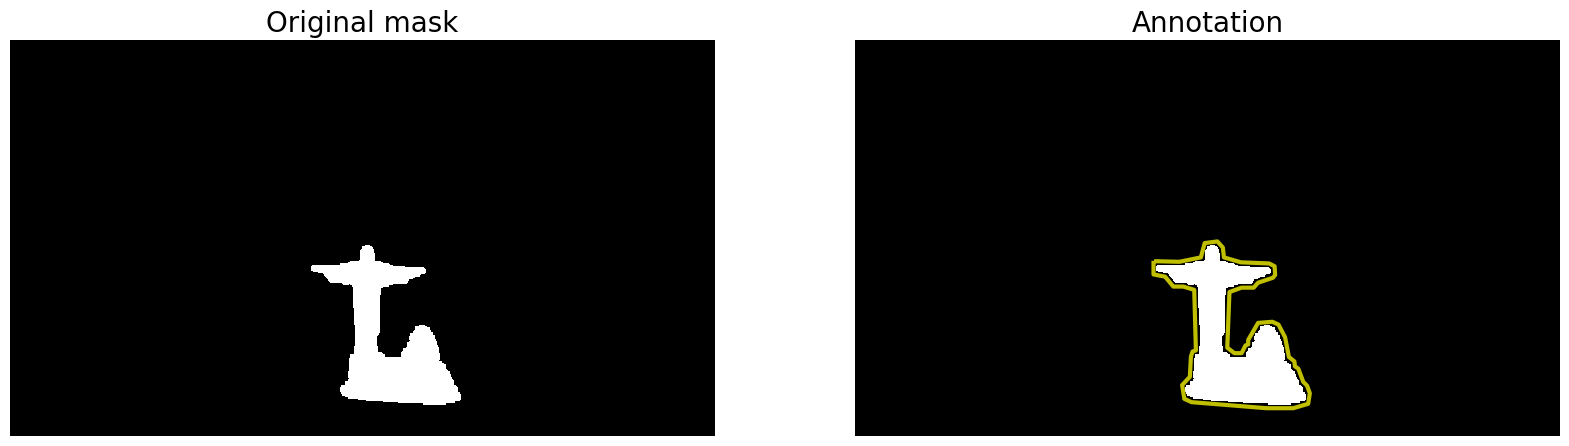

 Succesfully saved image:  statues_no_3_colour_mask_1_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  statues_no_3_colour_mask_2_mask.png


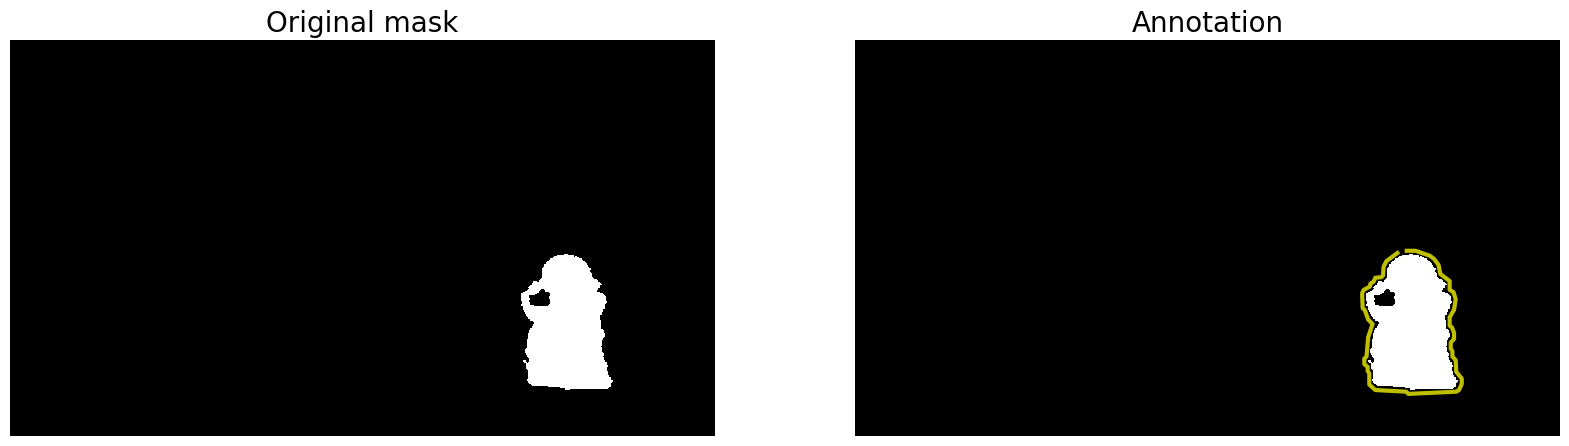

 Succesfully saved image:  statues_no_3_colour_mask_2_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  statues_oc_3_colour_mask_0_mask.png


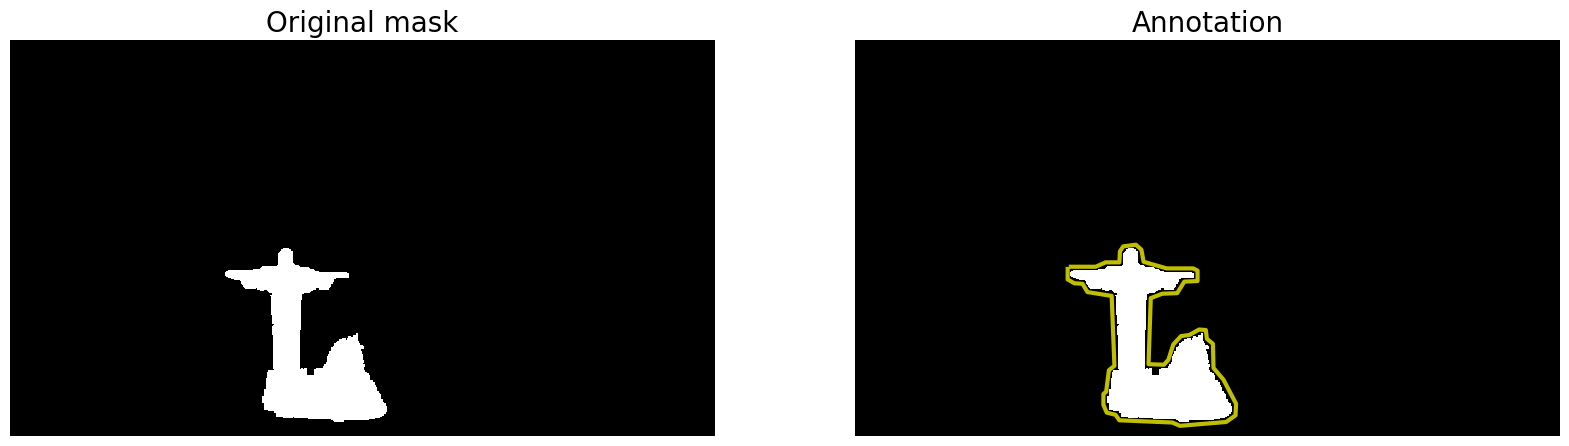

 Succesfully saved image:  statues_oc_3_colour_mask_0_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  statues_oc_3_colour_mask_4_mask.png


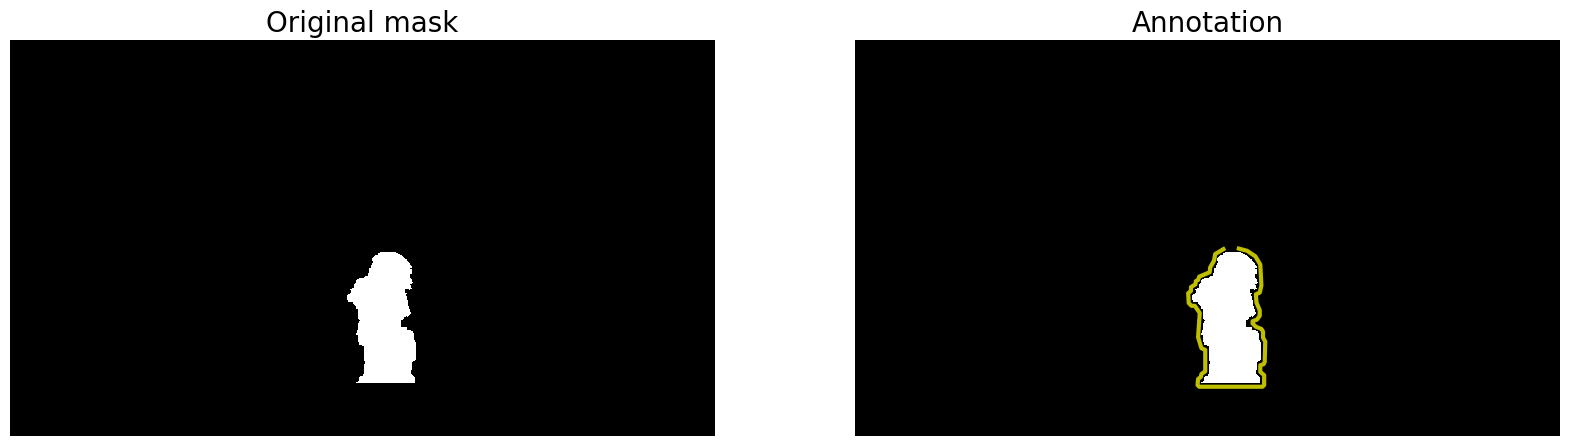

 Succesfully saved image:  statues_oc_3_colour_mask_4_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  statues_oc_3_colour_mask_5_mask.png


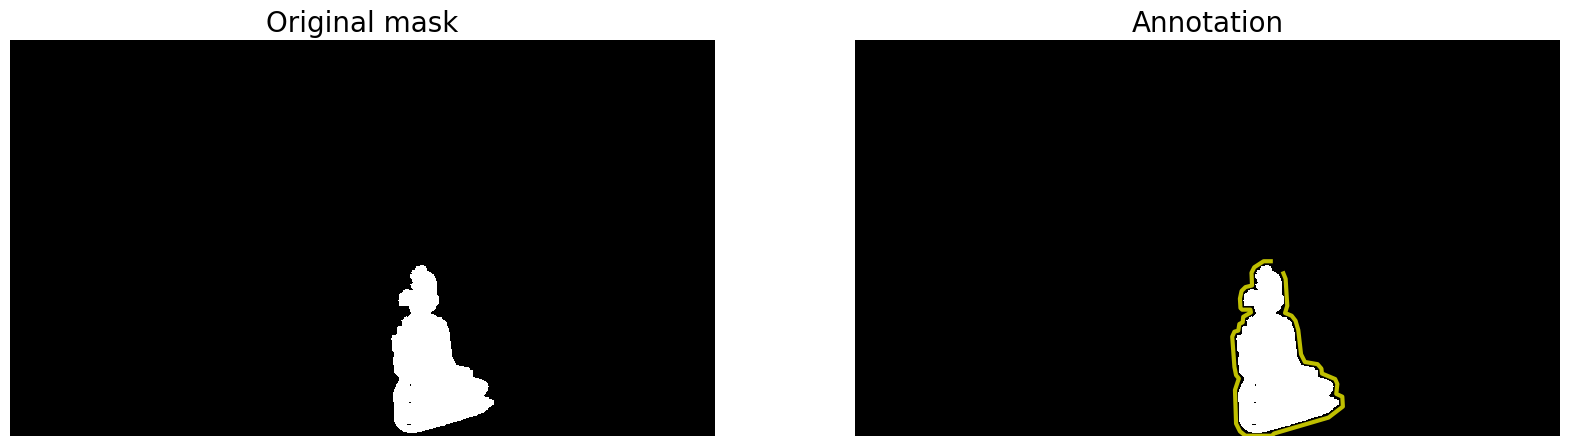

 Succesfully saved image:  statues_oc_3_colour_mask_5_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  tech_no_3_colour_mask_1_mask.png


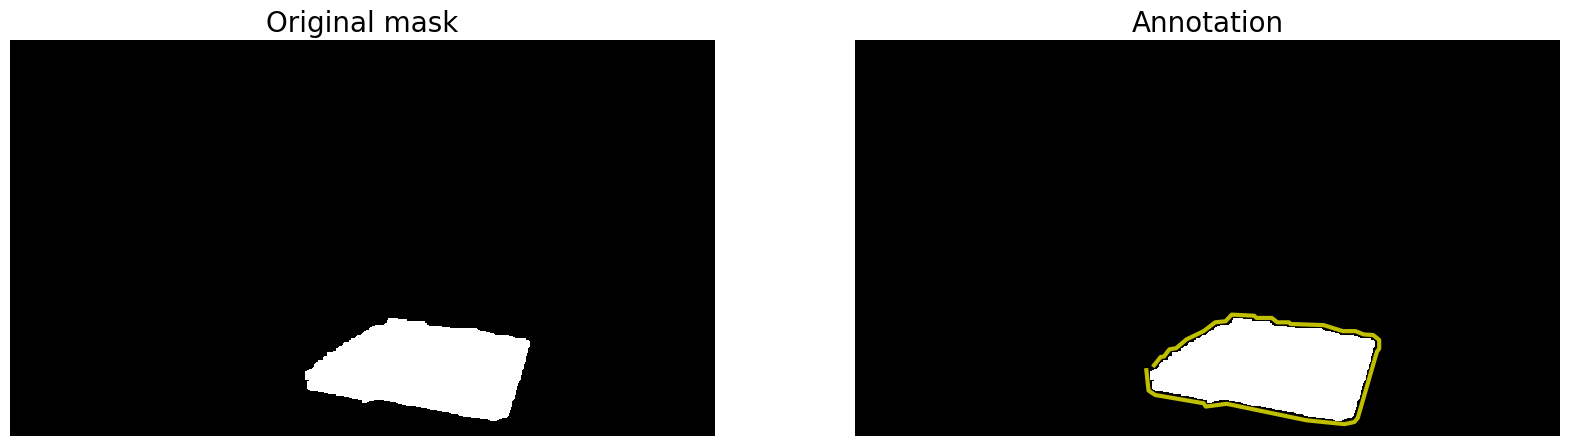

 Succesfully saved image:  tech_no_3_colour_mask_1_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  tech_no_3_colour_mask_2_mask.png


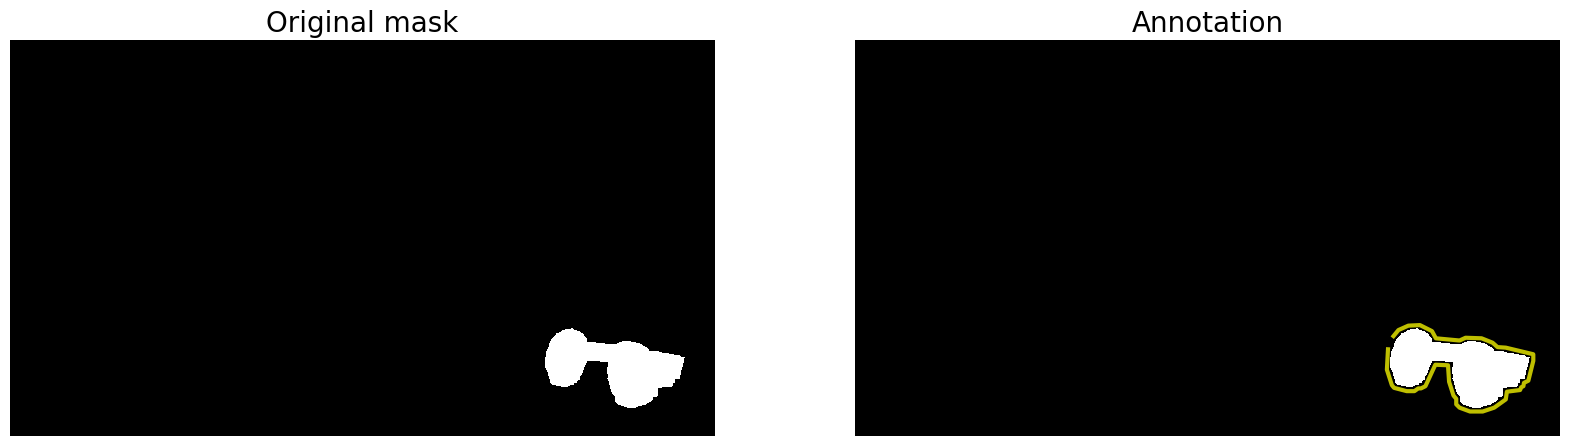

 Succesfully saved image:  tech_no_3_colour_mask_2_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  tech_no_3_colour_mask_3_mask.png


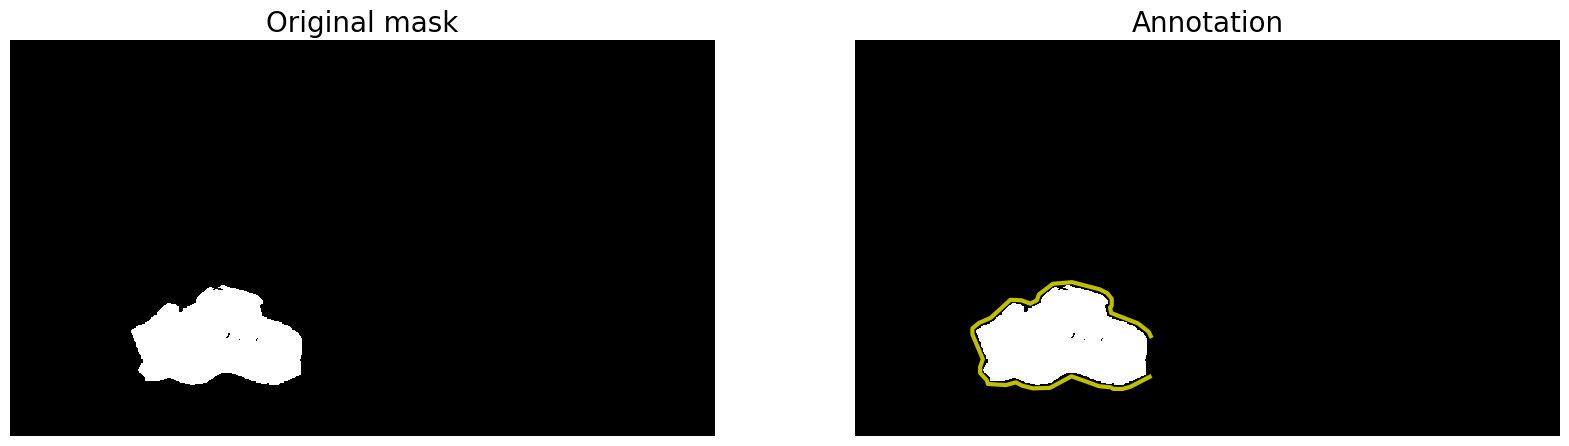

 Succesfully saved image:  tech_no_3_colour_mask_3_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  tech_oc_3_colour_mask_0_mask.png


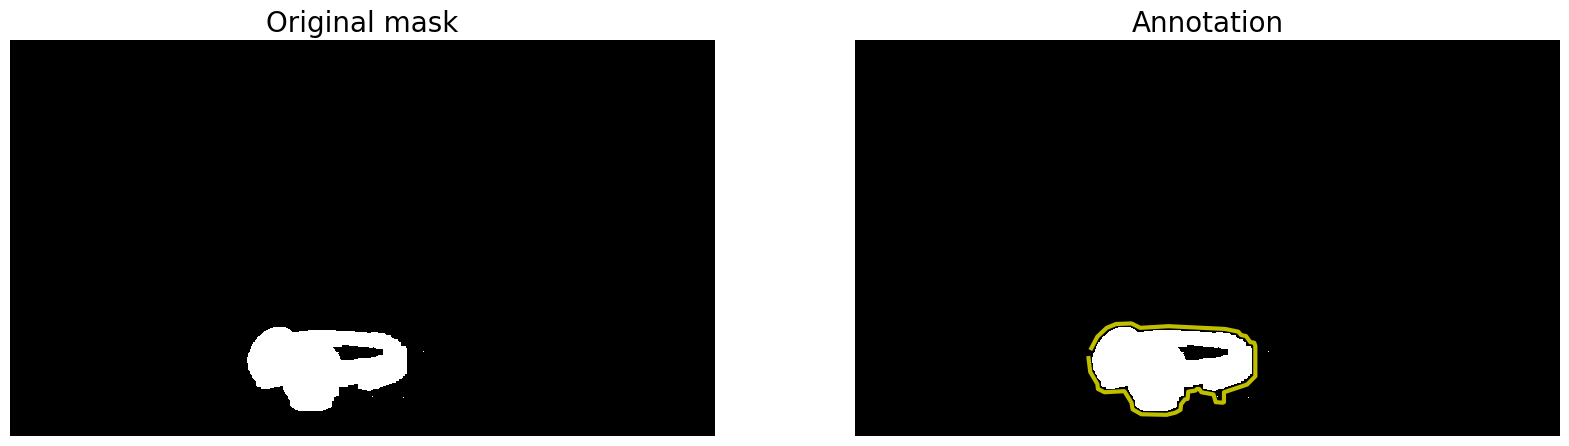

 Succesfully saved image:  tech_oc_3_colour_mask_0_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  tech_oc_3_colour_mask_1_mask.png


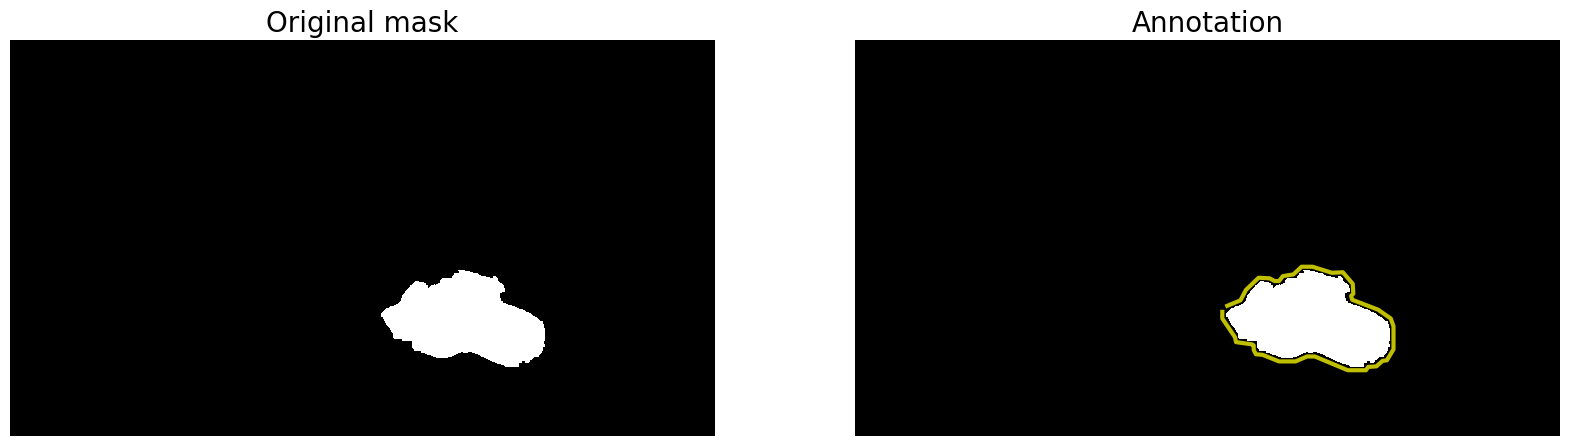

 Succesfully saved image:  tech_oc_3_colour_mask_1_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  tech_oc_3_colour_mask_2_mask.png


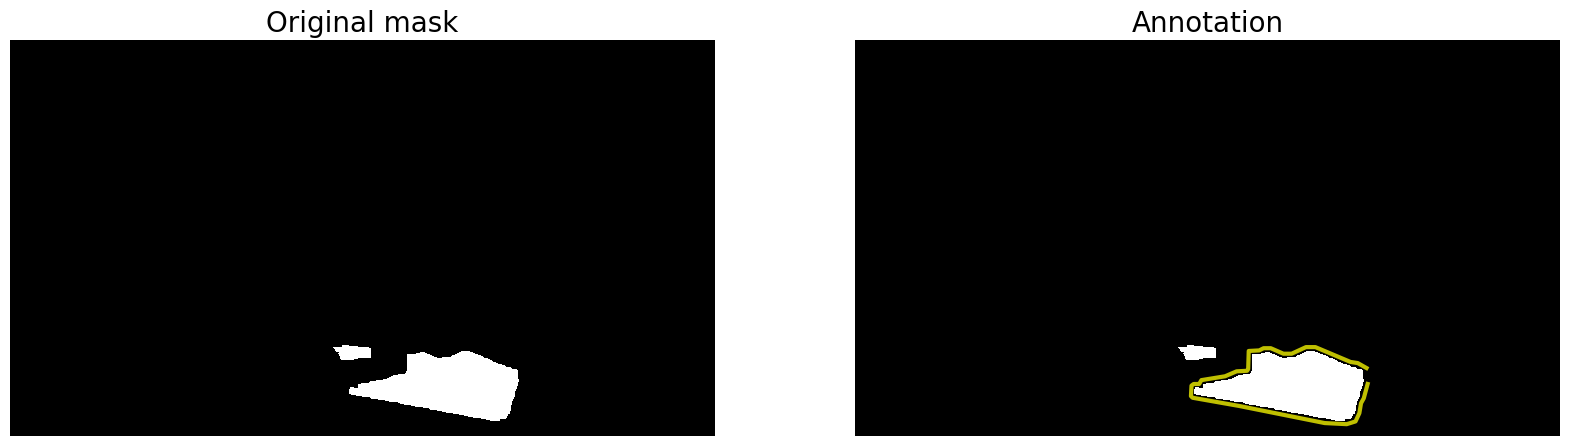

 Succesfully saved image:  tech_oc_3_colour_mask_2_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  vr_no_3_colour_mask_3_mask.png


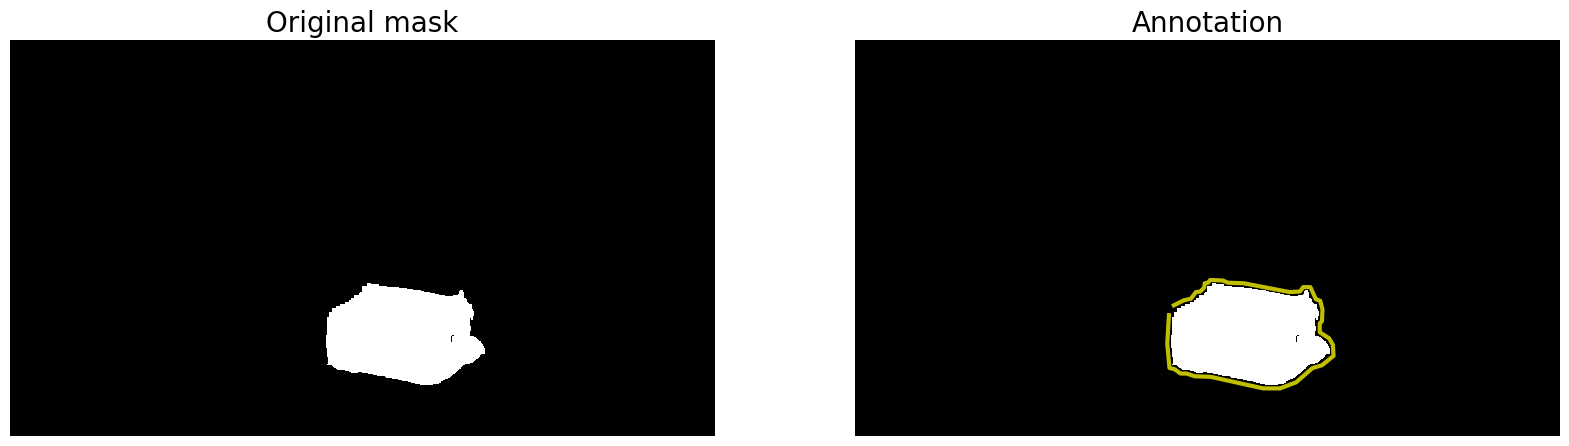

 Succesfully saved image:  vr_no_3_colour_mask_3_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  vr_no_3_colour_mask_4_mask.png


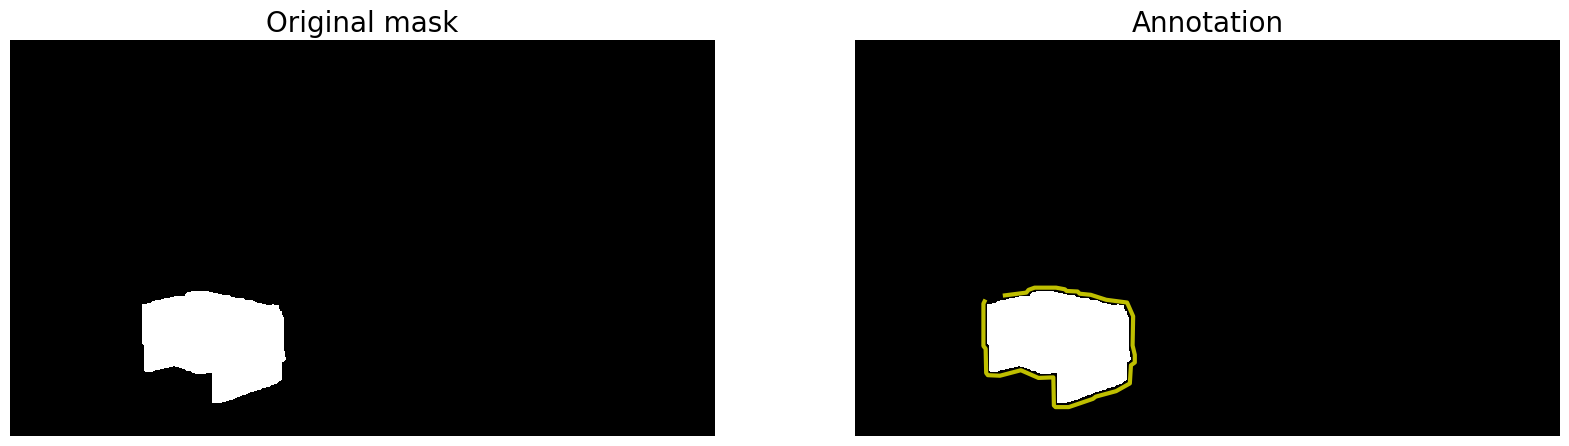

 Succesfully saved image:  vr_no_3_colour_mask_4_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  vr_no_3_colour_mask_5_mask.png


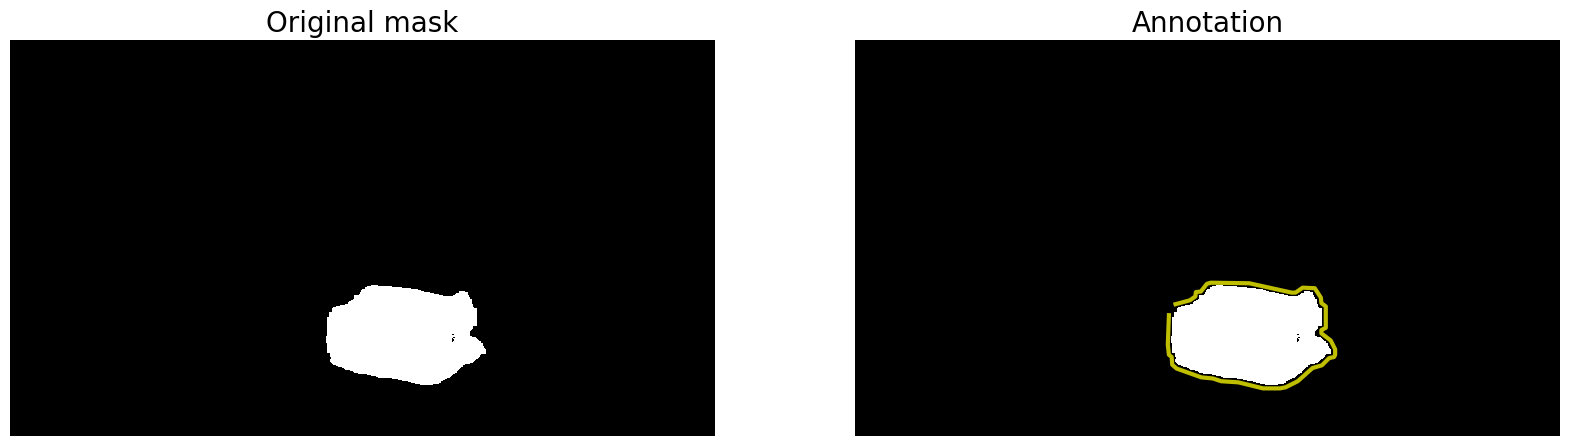

 Succesfully saved image:  vr_no_3_colour_mask_5_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  vr_oc_3_colour_mask_2_mask.png


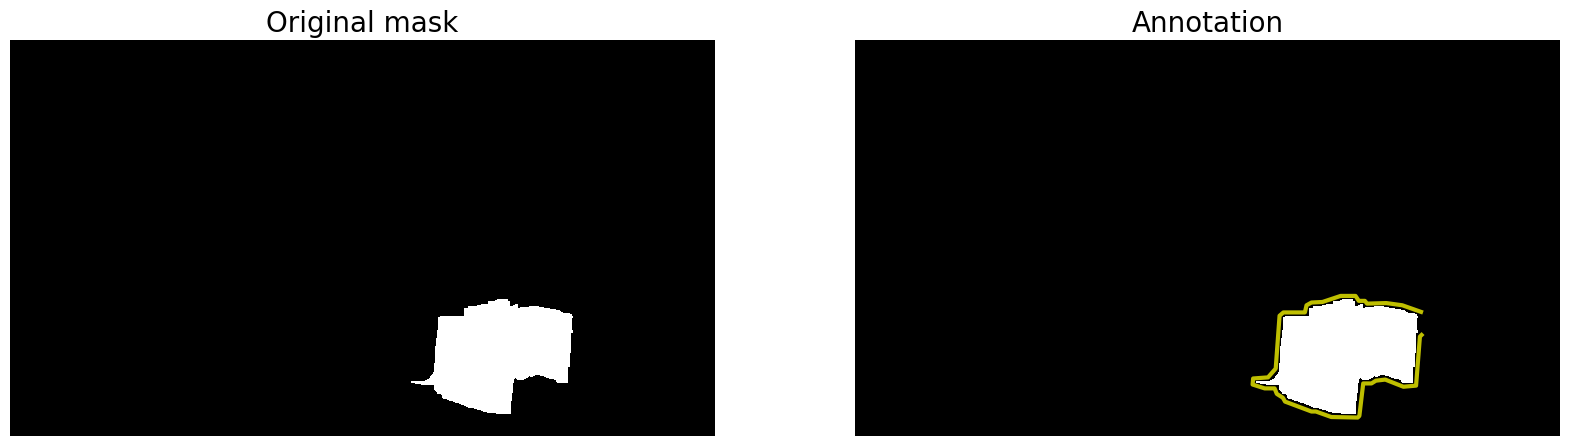

 Succesfully saved image:  vr_oc_3_colour_mask_2_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  vr_oc_3_colour_mask_3_mask.png


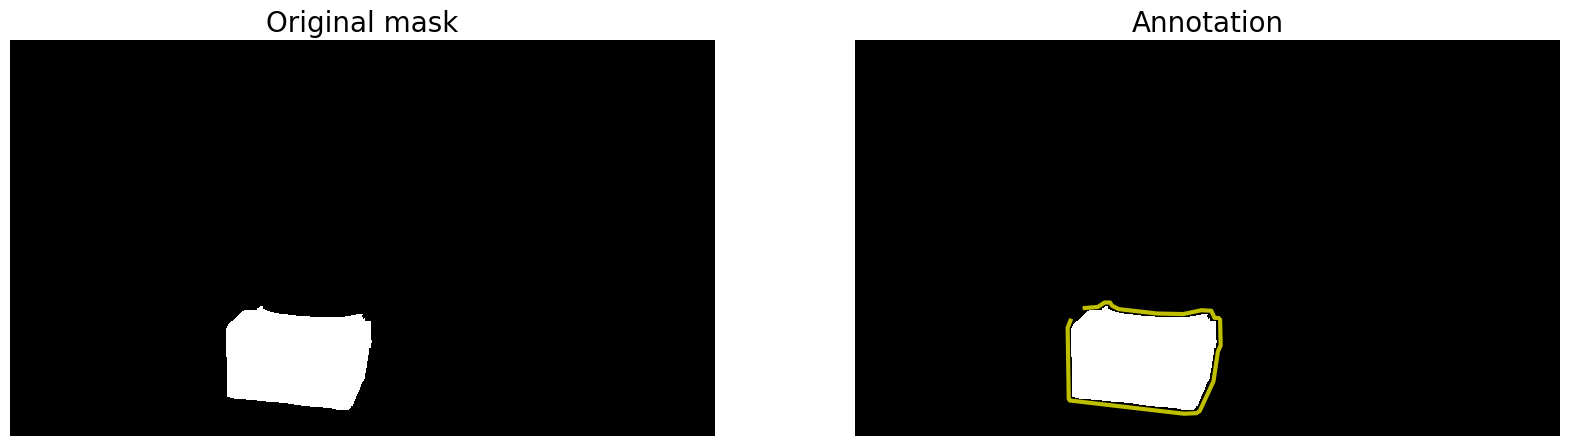

 Succesfully saved image:  vr_oc_3_colour_mask_3_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  vr_oc_3_colour_mask_4_mask.png


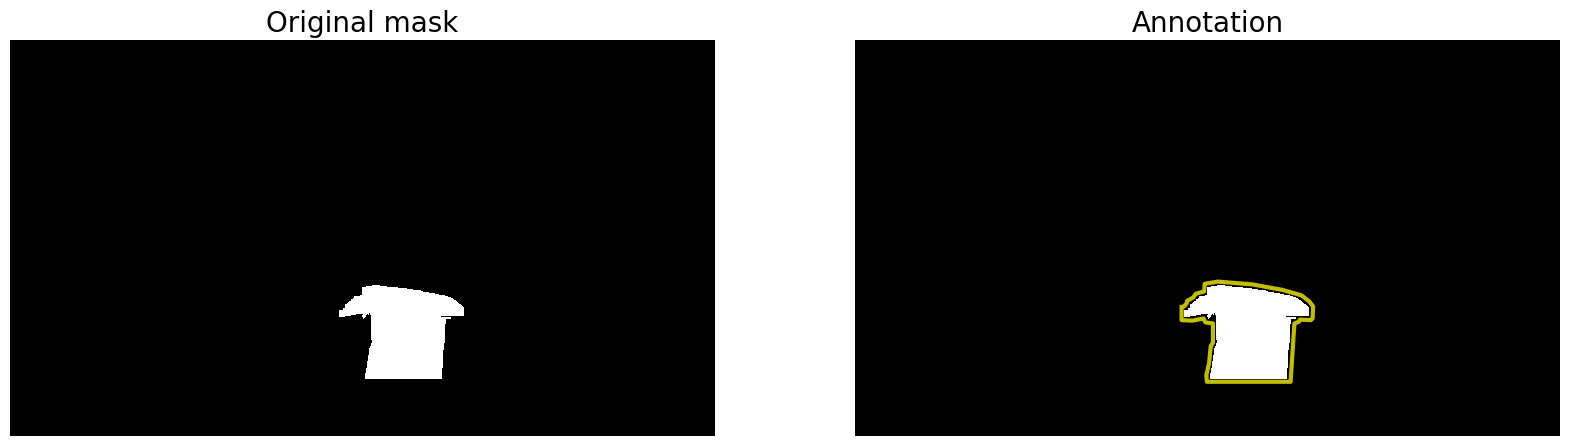

 Succesfully saved image:  vr_oc_3_colour_mask_4_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  wash_no_3_colour_mask_3_mask.png


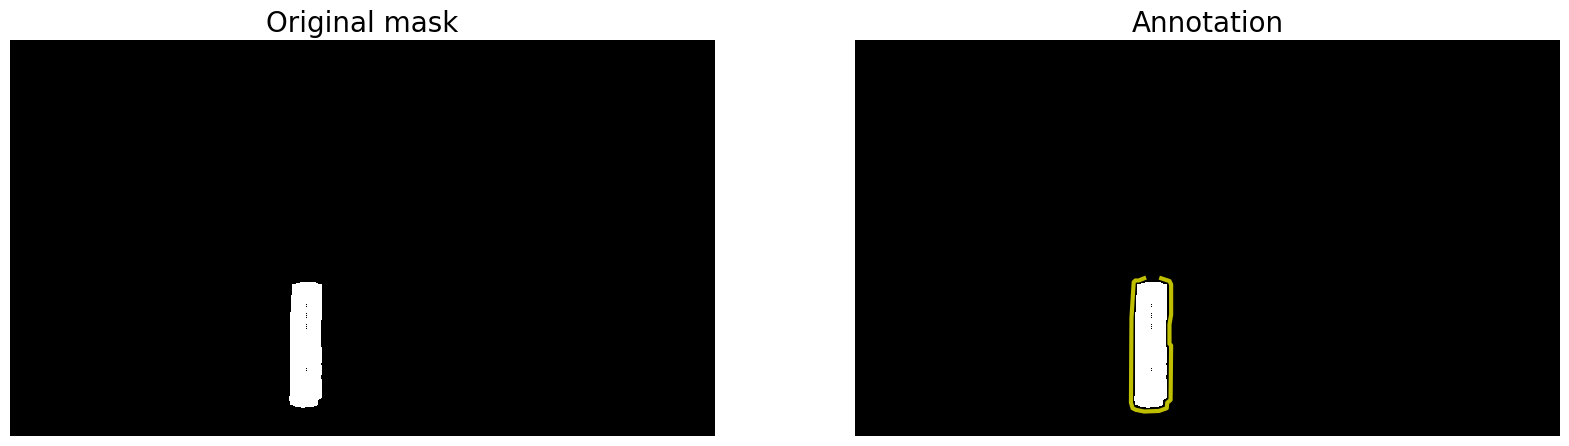

 Succesfully saved image:  wash_no_3_colour_mask_3_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  wash_no_3_colour_mask_4_mask.png


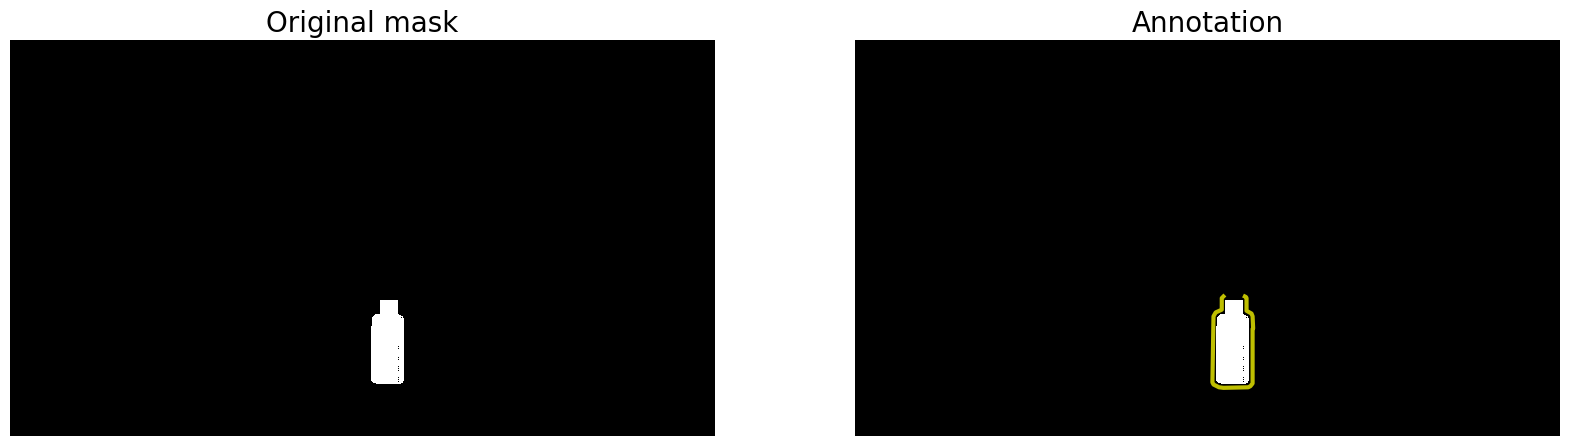

 Succesfully saved image:  wash_no_3_colour_mask_4_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  wash_no_3_colour_mask_5_mask.png


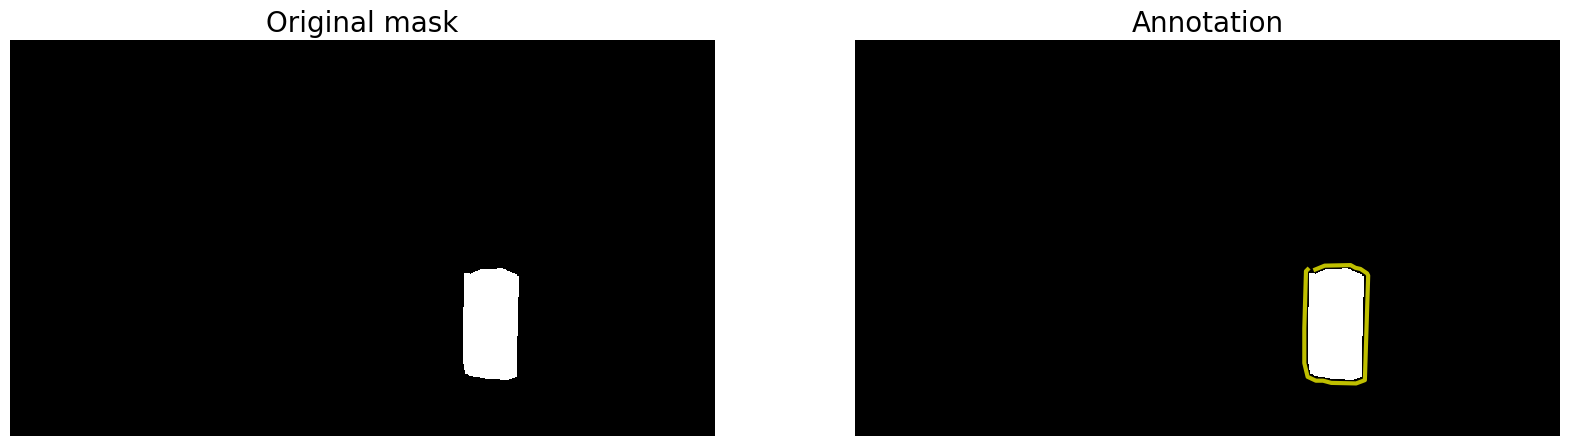

 Succesfully saved image:  wash_no_3_colour_mask_5_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  wash_oc_3_colour_mask_0_mask.png


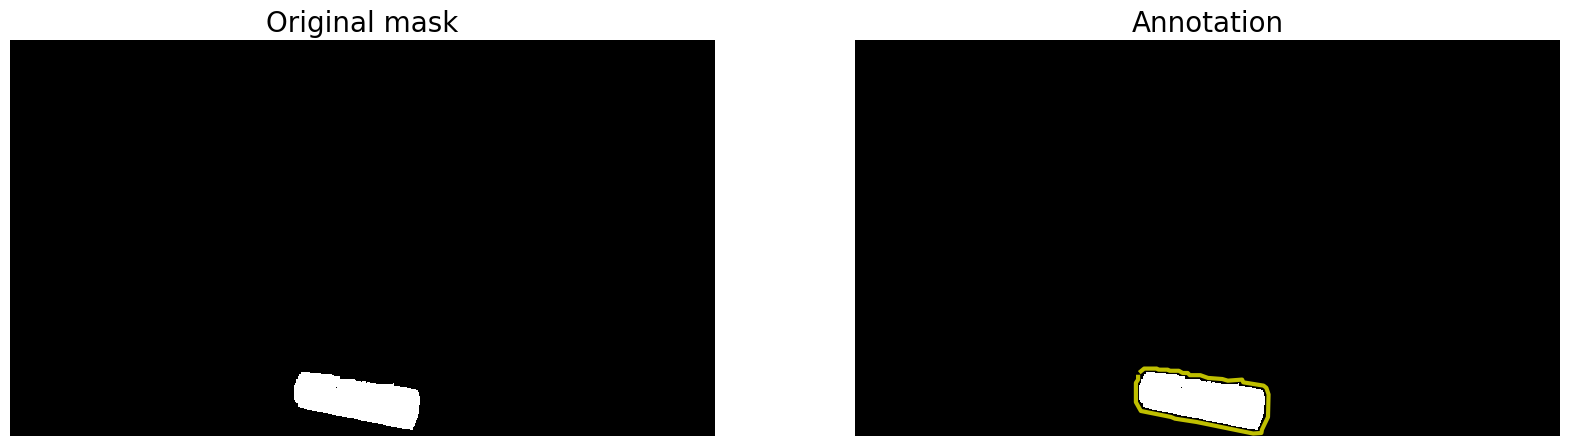

 Succesfully saved image:  wash_oc_3_colour_mask_0_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  wash_oc_3_colour_mask_1_mask.png


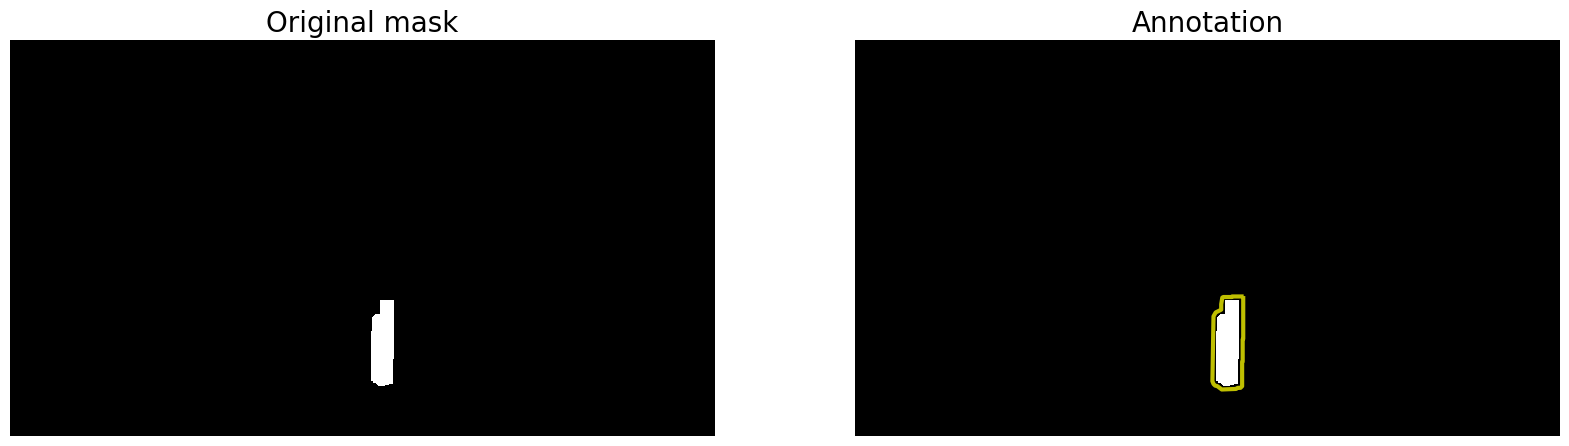

 Succesfully saved image:  wash_oc_3_colour_mask_1_mask.png 


------------------------------------------------------------------------------------------------------------------------

 Annotating image:  wash_oc_3_colour_mask_2_mask.png


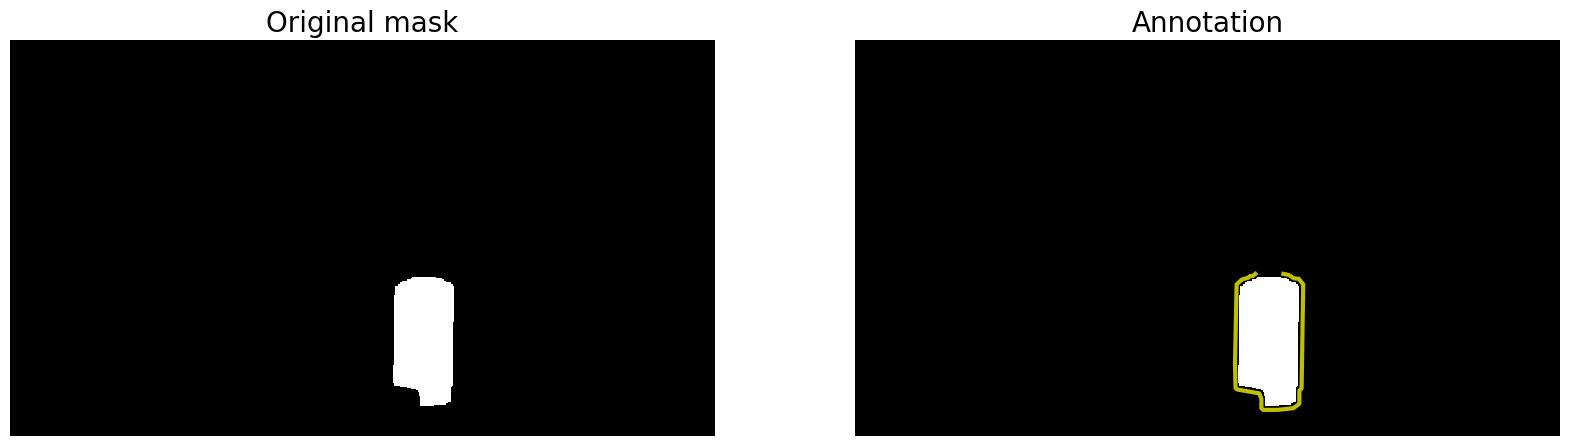

 Succesfully saved image:  wash_oc_3_colour_mask_2_mask.png 


------------------------------------------------------------------------------------------------------------------------


In [15]:
vgg_output_dir="VGG_annotations"
vgg_color='y'

image_id=0
for image_paths in os.listdir(part2_multiple_objects):
    mask_paths = os.path.join(part2_multiple_objects,image_paths, "masks")
    category=image_paths
    for mask_name in os.listdir(mask_paths):
        image = cv2.imread(os.path.join(mask_paths,mask_name))
        vgg.annotate((image_id,mask_name,image,project_name,category,vgg_output_dir), do_display=True, do_save=True, annotation_color=vgg_color)
        image_id+=1